<div class="alert alert-info">
<h1> TELECOM CHURN - CASE STUDY</h1>

<h2>Submitted by: Praveersinh Parmar & Ketaki Samanta</h2>
</div>

# <font color=LimeGreen>✍️ Problem Statement </font>

## <font color=SlateBlue>Business problem overview</font>

- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

 

- For many incumbent operators, *retaining high profitable customers is the number one business goal*.

 

- To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn**.

 

- In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## <font color=SlateBlue>Understanding and defining churn</font>


- There are two main models of payment in the telecom industry - 

  1. **Postpaid** (customers pay a monthly/annual bill after using the services) and 
  2. **Prepaid** (customers pay/recharge with a certain amount in advance and then use the services).

 

- In the ***postpaid model***, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

- However, in the ***prepaid model***, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

- Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘`churn`’ should be defined carefully.    
- Also, prepaid is the most common model in *India* and *Southeast Asia*, while postpaid is more common in *Europe* and *North America*.

 

- This project is based on the *Indian* and *Southeast Asian* market.

## <font color=SlateBlue>Definitions of churn</font>

- There are various ways to define churn, such as:

> **Revenue-based churn**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘`customers who have generated less than INR 4 per month in total/average/median revenue`’.
  - The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.




> **Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
  - A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the **usage-based definition** to define churn.

## <font color=SlateBlue>High-value churn</font>

- In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called **high-value customers**). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

- In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## <font color=SlateBlue>Understanding the business objective and the data</font>

- The dataset contains customer-level information for a span of **four consecutive months** - `June`, `July`, `August` and `September`. The months are encoded as `6`, `7`, `8` and `9`, respectively. 


- The business objective is `to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months`. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## <font color=SlateBlue>Understanding customer behaviour during churn</font>

- Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **three phases** of customer lifecycle :

   1. The ‘**good**’ phase: In this phase, the customer is happy with the service and behaves as usual.

   2. The ‘**action**’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

   3. The ‘**churn**’ phase: In this phase, the customer is said to have churned. You **define churn based on this phase**. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, **after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase**.



In this case, since you are working over a four-month window

- the *first two months* are the ‘**good**’ phase, 
- the *third month* is the ‘**action**’ phase, 
- while the *fourth month* is the ‘**churn**’ phase.

 

## <font color=SlateBlue>Data Preparation</font>

The following data preparation steps are crucial for this problem:

 

1. **Derive new features**

   - This is one of the most important part of data preparation since good features are often the differentiators between good and bad models. 
   - Use your business understanding to derive features you think could be important indicators of churn.

 

2. **Filter high-value customers**

   - As mentioned above, you need to predict churn only for the high-value customers. 
   - Define **high-value customers** as follows: Those who have recharged with an amount more than or equal to X, where X is the **70th percentile** of the average recharge amount in the first two months (the good phase).
   - After filtering the high-value customers, you should get **about 29.9k** rows.

 

3. **Tag churners and remove attributes of the churn phase**

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
  - Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
  
The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9


After tagging churners, **remove all the attributes corresponding to the churn phase** (all attributes having ‘ _9’, etc. in their names).

 

## <font color=SlateBlue>Modelling</font>

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

1. It will be used **to predict whether a high-value customer will churn or not, in near future (i.e. churn phase)**. By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used **to identify important variables that are strong predictors of churn**. These variables may also indicate why customers choose to switch to other networks.

 

- In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a **dimensionality reduction technique such as PCA** and then build a predictive model. **After PCA, you can use any classification model**.

 

- Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

 

You can take the following suggestive **steps to build the model**:

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

 

- The above model will only be able to achieve one of the two goals - **to predict customers who will churn**. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

 

- Therefore, **build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn**. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

 

- After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

 

- Finally, recommend strategies to manage customer churn based on your observations.


# <font color=lightcoral>🌊 Flow of this notebook</font>

The following are steps involved in problem solving:
1. **Data Understanding & Preparation**
    - Data Quality Checks
    - Data Cleaning
    - Filtering High Value Customers
    - Tagging Churned Customers
    - Feature Engineering
    - Exploratory Data Analysis (EDA)
    - Outlier Treatment
    
   
2. **Model Building and Evaluation # 1 : Interpretable Model**  
    (This model will identify important predictors of churn)

   - Dimensionality Reduction (using RFE)
   - Model Building
   - Hyperparameter Tuning
   - Model Evaluation
   - Identifying important churn predictors
   - Business recommendations
   

3. **Model Building and Evaluation # 2 : High Performance Models**  
    (These models will predict aacurately the customers who will churn)
    
   - Dimensionality Reduction (using PCA)
   - Three models: Logistic Regression, Random Forest and XGBoost
   - Model Building
   - Hyperparameter Tuning
   - Model Evaluation   
   
   
4. **Summarizing all the models created and selecting the best one**

In [1]:
## Suppress warnings

import warnings
warnings.filterwarnings("ignore")

## 📚 Importing Libraries

In [2]:
## Import requisite libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

import datetime as dt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.metrics import recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb

In [3]:
## Set limits for displaying rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# <font color=midnightblue>Step-1️:</font>  🤔 <font color=mediumvioletred>Data Understanding & Preparation</font>

In [4]:
## Import the telecom churn data set

telecom = pd.read_csv("telecom_churn_data.csv")

## See the first five rows of our dataframe

telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
## Read the Data Dictionary excel file

dict = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
dict

Acronyms      \
0   MOBILE_NUMBER   
1       CIRCLE_ID   
2             LOC   
3             STD   
4              IC   
5              OG   
6             T2T   
7         T2M       
8         T2O       
9         T2F       
10        T2C       
11       ARPU       
12        MOU       
13        AON       
14       ONNET      
15     OFFNET       
16           ROAM   
17         SPL      
18        ISD       
19       RECH       
20        NUM       
21        AMT       
22        MAX       
23       DATA       
24         3G       
25         AV       
26        VOL       
27         2G       
28        PCK       
29      NIGHT       
30    MONTHLY       
31      SACHET      
32        *.6       
33        *.7       
34        *.8       
35        *.9       
36        FB_USER   
37        VBC       

                                                                          Descriptions  
0                                                                Customer phone number  
1                                 Telecom circle area to which the customer belongs to  
2                                             Local calls - within same telecom circle  
3                                               STD calls - outside the calling circle  
4                                                                       Incoming calls  
5                                                                       Outgoing calls  
6                        Operator T to T, i.e. within same operator (mobile to mobile)  
7                                                  Operator T to other operator mobile  
8                                              Operator T to other operator fixed line  
9                                                       Operator T to fixed lines of T  
10                                                  Operator T to it’s own call center  
11                                                            Average revenue per user  
12                                                      Minutes of usage - voice calls  
13        Age on network - number of days the customer is using the operator T network  
14                                  All kind of calls within the same operator network  
15                                    All kind of calls outside the operator T network  
16                          Indicates that customer is in roaming zone during the call  
17                                                                       Special calls  
18                                                                           ISD calls  
19                                                                            Recharge  
20                                                                              Number  
21                                                            Amount in local currency  
22                                                                             Maximum  
23                                                                     Mobile internet  
24                                                                          3G network  
25                                                                             Average  
26                                                Mobile internet usage volume (in MB)  
27                                                                          2G network  
28                                              Prepaid service schemes called - PACKS  
29                                      Scheme to use during specific night hours only  
30                                 Service schemes with validity equivalent to a month  
31                                  Service schemes with validity smaller than a month  
32                                                           KPI for the month of June  
33                                                           KPI for the month of July  
34                                                         KPI for the

In [6]:
## Check the dimensions of telecom dataset
print(f"Number of Rows = {telecom.shape[0]} \nNumber of Columns = {telecom.shape[1]}")

Number of Rows = 99999 
Number of Columns = 226


### 📌  The `telecom` dataframe has 99999 rows and 226 columns

# <font color=steelblue>✅ Data Quality Checks</fonts>

In [7]:
## Check the column-wise info

telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [8]:
## See the statistical description of numerical columns

telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
90%     7.002174e+09      109.0             0.0             0.0   
95%     7.002291e+09      109.0             0.0             0.0   
99%     7.002387e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
90%               0.0    620.075400    617.252000    618.160400    601.537000   
95%               0.0    829.488200    828.357200    833.303300    805.107200   
99%               0.0   1410.792540   1428.685880   1455.539960   1402.445660   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
90%      344.102000    348.035000    345.030000    342.890000    477.325000   
95%      612.407500    624.835500    620.690000    617.232500    727.879000   
99%     1431.760500   1478.533300   1480.334000   1445.766400   1539.535800   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
90%      480.431000    486.310000    471.031000      11.810000       5.060000   
95%      744.225000    734.860000    720.120500      40.640000      23.140000   
99%     1549.379500   1530.398000   1521.328700     219.847000     154.483200   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.00

### 📌  There are few columns like `circle_id` that contain only one value. As there is no variation in data, these columns are of no use to us and we should drop them

In [9]:
## Drop columns having only one value in all rows
for col in telecom.columns:
    if telecom[col].nunique() == 1:
        telecom.drop(col,inplace=True,axis=1)

In [10]:
## Check the dimensions to see how many columns have been reduced
telecom.shape

(99999, 210)

### 📌 Here, we have removed 226 - 210 = 16 columns that were not useful to us for making predictions

In [11]:
## Checking data types of columns
telecom.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2t_mou_9            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            

### 📌 We need to convert eight date columns from 'object' to 'datetime' type

In [12]:
## List out the eight object columns
date_cols = list(telecom.select_dtypes(include='object').columns)
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [13]:
## Convert these eight columns to datetime format
for col in date_cols:
    telecom[col] = pd.to_datetime(telecom[col], infer_datetime_format=True)

In [14]:
## Check the converted data types
telecom.dtypes

mobile_number                        int64
arpu_6                             float64
arpu_7                             float64
arpu_8                             float64
arpu_9                             float64
onnet_mou_6                        float64
onnet_mou_7                        float64
onnet_mou_8                        float64
onnet_mou_9                        float64
offnet_mou_6                       float64
offnet_mou_7                       float64
offnet_mou_8                       float64
offnet_mou_9                       float64
roam_ic_mou_6                      float64
roam_ic_mou_7                      float64
roam_ic_mou_8                      float64
roam_ic_mou_9                      float64
roam_og_mou_6                      float64
roam_og_mou_7                      float64
roam_og_mou_8                      float64
roam_og_mou_9                      float64
loc_og_t2t_mou_6                   float64
loc_og_t2t_mou_7                   float64
loc_og_t2t_

# <font color=steelblue>🔎 Data Cleaning</fonts>

In [15]:
## Check percentage of missing values in descending order
nulls = round(100*(telecom.isna().sum())/(len(telecom.index)),2).sort_values(ascending=False)
nulls

night_pck_user_6            74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
night_pck_user_7            74.43
arpu_2g_7                   74.43
total_rech_data_7           74.43
arpu_3g_7                   74.43
max_rech_data_7             74.43
av_rech_amt_data_7          74.43
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
av_rech_amt_data_9          74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
count_rech_2g_9             74.08
night_pck_user

In [16]:
## Extract features having more than 70% null values
nulls = list(nulls[nulls >= 70].index)
nulls

['night_pck_user_6',
 'arpu_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'count_rech_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'arpu_3g_6',
 'night_pck_user_7',
 'arpu_2g_7',
 'total_rech_data_7',
 'arpu_3g_7',
 'max_rech_data_7',
 'av_rech_amt_data_7',
 'count_rech_3g_7',
 'date_of_last_rech_data_7',
 'count_rech_2g_7',
 'fb_user_7',
 'date_of_last_rech_data_9',
 'arpu_2g_9',
 'max_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'av_rech_amt_data_9',
 'total_rech_data_9',
 'arpu_3g_9',
 'count_rech_2g_9',
 'night_pck_user_9',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'fb_user_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'total_rech_data_8',
 'date_of_last_rech_data_8',
 'count_rech_3g_8',
 'arpu_3g_8',
 'count_rech_2g_8']

In [17]:
## Drop the features having more than 70% missing values as they would not be much useful in making predictions
telecom = telecom.drop(nulls, axis=1)

## Check dimensions again
telecom.shape

(99999, 170)

### 📌 So, now we have removed 210 - 170 = 40 columns that were having more than 70% missing values

In [18]:
## Check the percentage of null values again
nulls = round(100*(telecom.isna().sum())/(len(telecom.index)),2).sort_values(ascending=False)
nulls

loc_ic_t2f_mou_9       7.75
std_ic_t2f_mou_9       7.75
loc_og_t2m_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_ic_mou_9           7.75
std_ic_t2t_mou_9       7.75
loc_og_t2t_mou_9       7.75
loc_ic_mou_9           7.75
loc_og_mou_9           7.75
roam_og_mou_9          7.75
std_og_t2m_mou_9       7.75
std_og_t2t_mou_9       7.75
loc_ic_t2m_mou_9       7.75
roam_ic_mou_9          7.75
spl_ic_mou_9           7.75
loc_ic_t2t_mou_9       7.75
loc_og_t2f_mou_9       7.75
offnet_mou_9           7.75
std_og_t2f_mou_9       7.75
og_others_9            7.75
onnet_mou_9            7.75
isd_ic_mou_9           7.75
spl_og_mou_9           7.75
isd_og_mou_9           7.75
loc_og_t2c_mou_9       7.75
std_og_mou_9           7.75
ic_others_9            7.75
isd_ic_mou_8           5.38
std_og_t2m_mou_8       5.38
ic_others_8            5.38
std_ic_mou_8           5.38
loc_ic_mou_8           5.38
std_ic_t2f_mou_8       5.38
std_ic_t2m_mou_8       5.38
std_ic_t2t_mou_8       5.38
loc_ic_t2f_mou_8    

In [19]:
## Retain only the columns with non-zero missing values
nulls = nulls[nulls > 0]
nulls

loc_ic_t2f_mou_9       7.75
std_ic_t2f_mou_9       7.75
loc_og_t2m_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_ic_mou_9           7.75
std_ic_t2t_mou_9       7.75
loc_og_t2t_mou_9       7.75
loc_ic_mou_9           7.75
loc_og_mou_9           7.75
roam_og_mou_9          7.75
std_og_t2m_mou_9       7.75
std_og_t2t_mou_9       7.75
loc_ic_t2m_mou_9       7.75
roam_ic_mou_9          7.75
spl_ic_mou_9           7.75
loc_ic_t2t_mou_9       7.75
loc_og_t2f_mou_9       7.75
offnet_mou_9           7.75
std_og_t2f_mou_9       7.75
og_others_9            7.75
onnet_mou_9            7.75
isd_ic_mou_9           7.75
spl_og_mou_9           7.75
isd_og_mou_9           7.75
loc_og_t2c_mou_9       7.75
std_og_mou_9           7.75
ic_others_9            7.75
isd_ic_mou_8           5.38
std_og_t2m_mou_8       5.38
ic_others_8            5.38
std_ic_mou_8           5.38
loc_ic_mou_8           5.38
std_ic_t2f_mou_8       5.38
std_ic_t2m_mou_8       5.38
std_ic_t2t_mou_8       5.38
loc_ic_t2f_mou_8    

In [20]:
## Check the types of columns that have missing values
telecom[nulls.index].dtypes

loc_ic_t2f_mou_9              float64
std_ic_t2f_mou_9              float64
loc_og_t2m_mou_9              float64
std_ic_t2m_mou_9              float64
std_ic_mou_9                  float64
std_ic_t2t_mou_9              float64
loc_og_t2t_mou_9              float64
loc_ic_mou_9                  float64
loc_og_mou_9                  float64
roam_og_mou_9                 float64
std_og_t2m_mou_9              float64
std_og_t2t_mou_9              float64
loc_ic_t2m_mou_9              float64
roam_ic_mou_9                 float64
spl_ic_mou_9                  float64
loc_ic_t2t_mou_9              float64
loc_og_t2f_mou_9              float64
offnet_mou_9                  float64
std_og_t2f_mou_9              float64
og_others_9                   float64
onnet_mou_9                   float64
isd_ic_mou_9                  float64
spl_og_mou_9                  float64
isd_og_mou_9                  float64
loc_og_t2c_mou_9              float64
std_og_mou_9                  float64
ic_others_9 

### 📌 Except, the four datetime columns, we can replace the missing values of all other columns with their median values. We use mean here as there are outliers.

### 📌 For datetime columns, missing values are less than 5% of the data. 


In [21]:
## Drop the four datetime columns from nulls
nulls.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','date_of_last_rech_9'], inplace=True)

In [22]:
## Replace the missing values of the remaining columns with their median values
for col in nulls.index:
    telecom[col].fillna(telecom[col].median(), inplace=True)

In [23]:
## Check again for percentage of missing values
nulls = round(100*(telecom.isna().sum())/(len(telecom.index)),2).sort_values(ascending=False)
nulls

date_of_last_rech_9    4.76
date_of_last_rech_8    3.62
date_of_last_rech_7    1.77
date_of_last_rech_6    1.61
isd_og_mou_6           0.00
std_og_mou_9           0.00
std_og_mou_8           0.00
std_og_mou_7           0.00
std_og_mou_6           0.00
std_og_t2f_mou_9       0.00
std_og_t2f_mou_8       0.00
std_og_t2f_mou_7       0.00
sep_vbc_3g             0.00
isd_og_mou_8           0.00
std_og_t2f_mou_6       0.00
std_og_t2m_mou_9       0.00
std_og_t2m_mou_8       0.00
std_og_t2m_mou_7       0.00
std_og_t2m_mou_6       0.00
std_og_t2t_mou_9       0.00
std_og_t2t_mou_8       0.00
isd_og_mou_7           0.00
isd_og_mou_9           0.00
std_og_t2t_mou_6       0.00
spl_og_mou_6           0.00
loc_ic_t2m_mou_9       0.00
loc_ic_t2m_mou_8       0.00
loc_ic_t2m_mou_7       0.00
loc_ic_t2m_mou_6       0.00
loc_ic_t2t_mou_9       0.00
loc_ic_t2t_mou_8       0.00
loc_ic_t2t_mou_7       0.00
loc_ic_t2t_mou_6       0.00
total_og_mou_9         0.00
total_og_mou_8         0.00
total_og_mou_7      

### 📌 Now, we are only left with missing values in four date columns. We will impute them using method 'ffill' that will just replace it with the last observed value.

In [24]:
## Create a list of four date columns
date_cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

In [25]:
## Impute the missing values in these four columns using method 'ffill'
for col in date_cols:
    telecom[col].fillna(method='ffill', inplace=True)

In [26]:
## Check again for the missing values
telecom.isna().sum()

mobile_number          0
arpu_6                 0
arpu_7                 0
arpu_8                 0
arpu_9                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
onnet_mou_9            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
offnet_mou_9           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_ic_mou_9          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
roam_og_mou_9          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2t_mou_9       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2m_mou_9       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2f_mou_9       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_t2c_mou_9       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0


### 📌So, out dataset is cleaned now. 

# <font color=steelblue>💰 Filtering High Value Customers</fonts>

In [27]:
## Create new column for 'average recharge amount in first two months' (good phase)
telecom['avg_rech_good_phase'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2
telecom['avg_rech_good_phase'].head()

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: avg_rech_good_phase, dtype: float64

In [28]:
## Check the dimensions again (one columns must have increased)
telecom.shape

(99999, 171)

### 📌 Now, we extract those customers who have recharged with an amount more than or equal to 70th percentile of average recharge of first two months (i.e. good phase)

In [29]:
## Extracting 'High Value Customers'
telecom = telecom[telecom['avg_rech_good_phase'] >= telecom['avg_rech_good_phase'].quantile(0.7)]

In [30]:
## Checking the dimensions again
telecom.shape

(30011, 171)

### 📌 So, we have now kept only about 30k rows of data pertaining to `High Value Customers`

# <font color=steelblue>🏷️ Tagging Churned Customers</fonts>

In [31]:
## Now we create new column 'churn' where we tag customers who have not made any calls and 
## not used any mobile internet in 9th month

telecom['churn'] = np.where( (telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0 ) & \
                            (telecom['vol_2g_mb_9']==0) & (telecom['vol_3g_mb_9']==0) , 1, 0)
telecom.head()


mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
13     7002191713   492.846   205.671   593.260  322.732       501.76   
16     7000875565   430.975   299.869   187.894  206.490        50.51   
17     7000187447   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29        29.84        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91         87.29          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7            0.00          23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28             11.26   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28             39.12   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0.0   
17               0.0               0.0              0.00               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79         61.84              4.30   
8         378.09        288.18         63.04         60.71            116.56   
13        205.31         53.48        353.99    

### 📌 The purpose of all 9th months columns was to tag customers as 'churn' (1) or 'non-churn'(0). 
### 📌 Also, it is important to note that at the time of prediction (i.e. the action months), this churn data is not available to us for prediction. Thus, we now discard all data corresponding to this phase, i.e. we remove all columns ending with '_9'.

In [32]:
## Removing all columns ending with '_9'
for col in telecom.columns:
    if str(col).endswith('_9'):
        telecom.drop(col, axis=1, inplace=True)
telecom.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16          

In [33]:
## Check the dimensions again
telecom.shape 

(30011, 131)

### 📌 Now, we are left with 131 features.

In [34]:
## Check the imbalance in target variable 'churn'
telecom.churn.value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

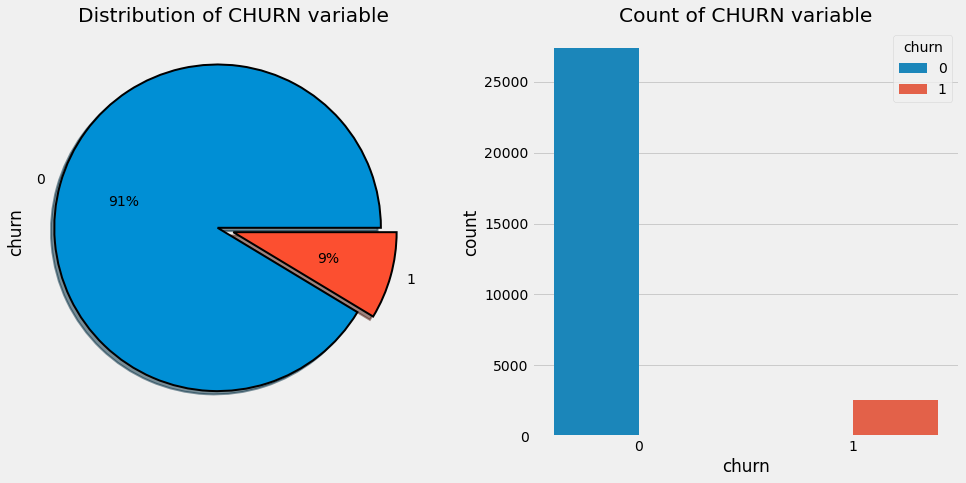

In [35]:
## View the histogram and pie-chart to see distribution of 'churn' variable
plt.figure(figsize=(15,7))

# Pie-chart
plt.subplot(121)
telecom["churn"].value_counts().plot.pie(autopct = "%1.0f%%", wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of CHURN variable")

# Histogram
plt.subplot(122)
sns.countplot(x='churn', data=telecom, hue='churn')
plt.title("Count of CHURN variable");


### 📌 So, our target variable is highly imbalanced.
### 📌 We will handle this imbalance while building models.

# <font color=steelblue>✨ Feature Engineering</fonts>

In [36]:
## View the remaining date columns
telecom.select_dtypes(include='datetime').head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
7           2014-06-27          2014-07-25          2014-08-26
8           2014-06-25          2014-07-31          2014-08-30
13          2014-06-20          2014-07-22          2014-08-30
16          2014-06-30          2014-07-31          2014-08-14
17          2014-06-30          2014-07-30          2014-08-25

### 📌 Now, we will create new features from these three date columns giving the number of days past since last recharge, for the months  6,7 and 8.

In [37]:
## Now we create new features for 'number of days since last recharge'

today = dt.date.today()
telecom['days_since_last_rech_6'] = (pd.to_datetime(today) - telecom['date_of_last_rech_6']).dt.days
telecom['days_since_last_rech_7'] = (pd.to_datetime(today) - telecom['date_of_last_rech_7']).dt.days
telecom['days_since_last_rech_8'] = (pd.to_datetime(today) - telecom['date_of_last_rech_8']).dt.days

## View the newly formed columns
telecom.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16          

In [38]:
## Now, we can drop the three original datetime columns
telecom.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)
telecom.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16          

In [39]:
## Check the dimensions
telecom.shape

(30011, 131)

### 📌 We created 3 new columns and removed 3 columns, so number of columns is the same: 131

# <font color=steelblue>🧐 Exploratory Data Analysis (EDA)</fonts>

In [40]:
## Extract numerical columns, i.e. all columns except mobile number column
df_num = telecom.drop(['mobile_number'], axis=1)
df_num.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

# 🕐 Univariate Analysis

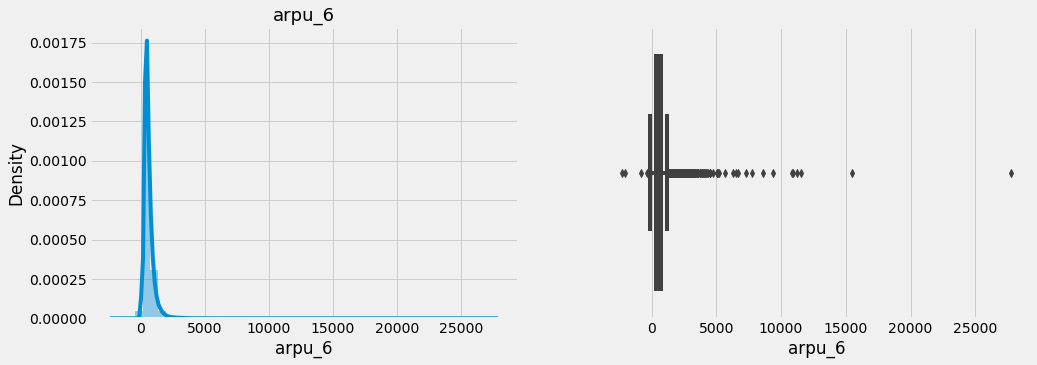

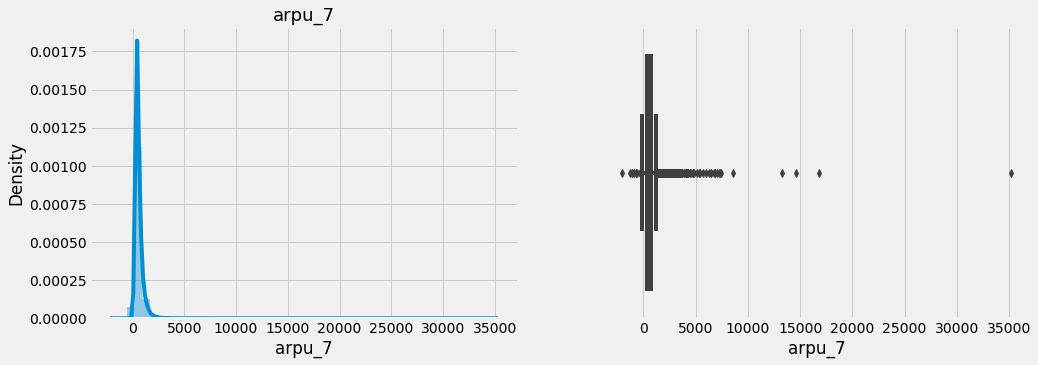

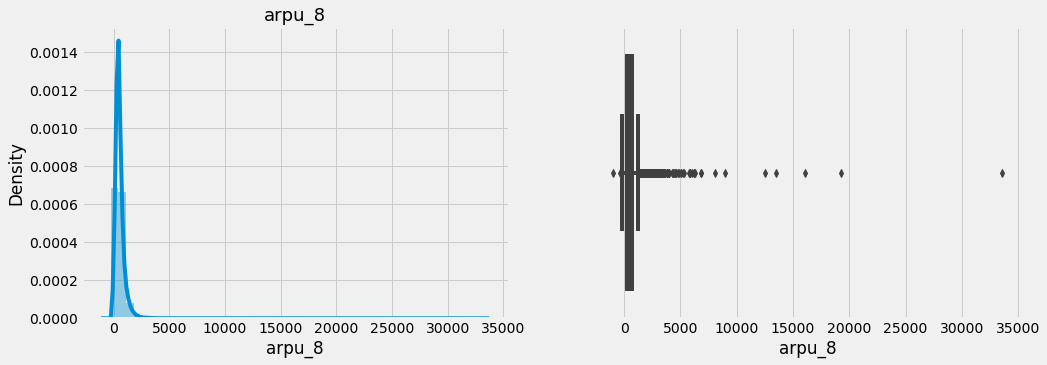

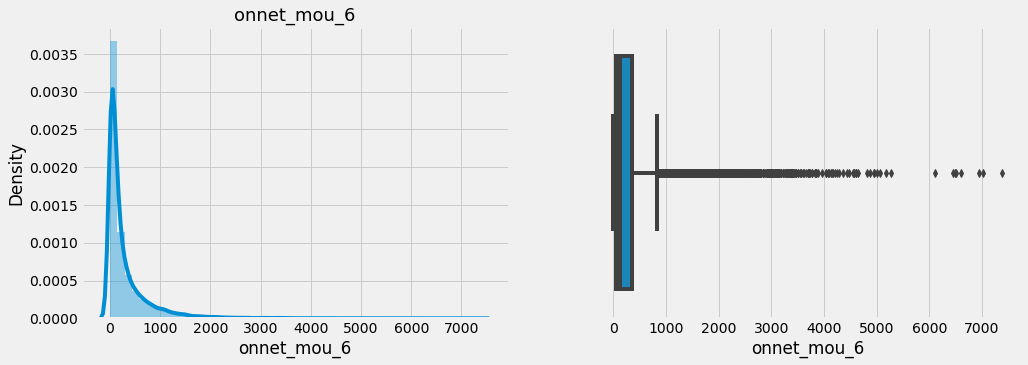

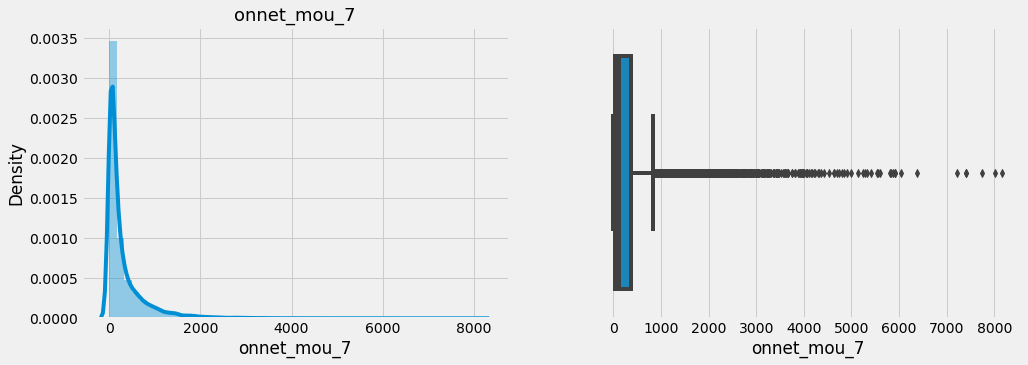

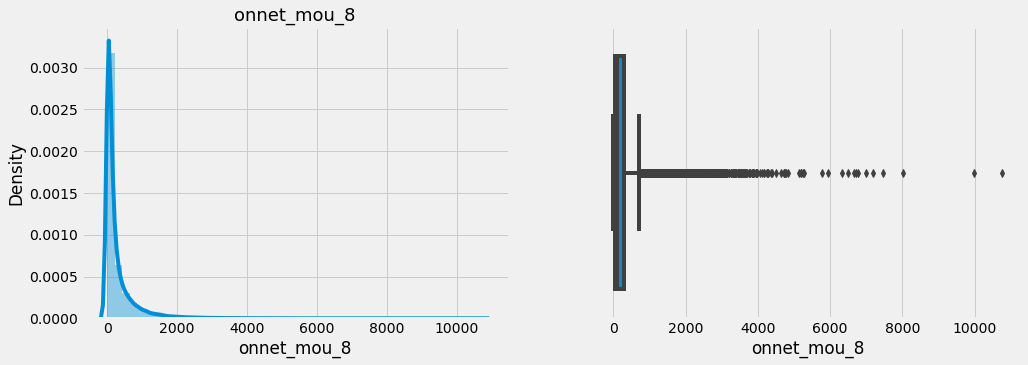

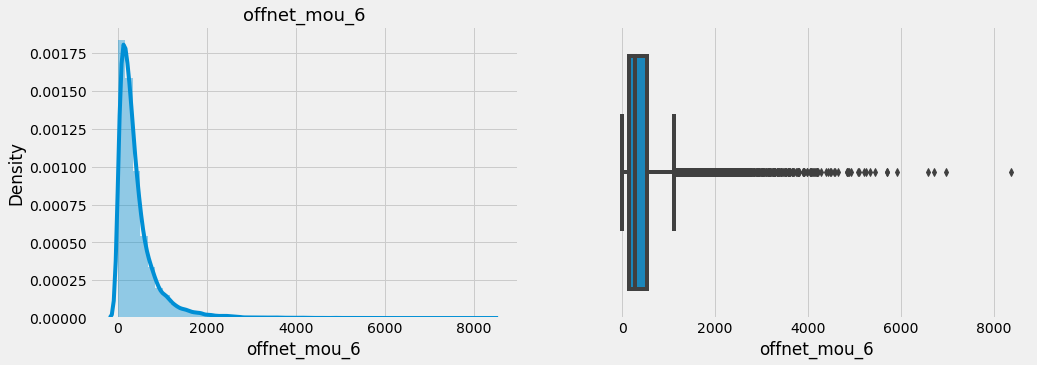

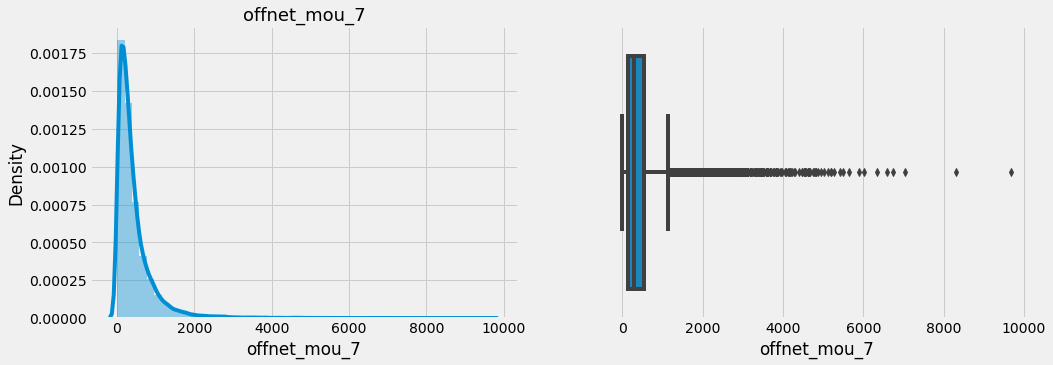

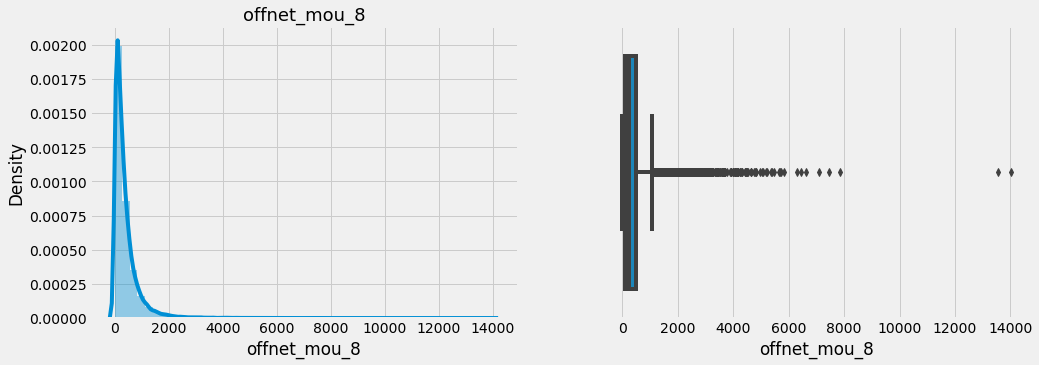

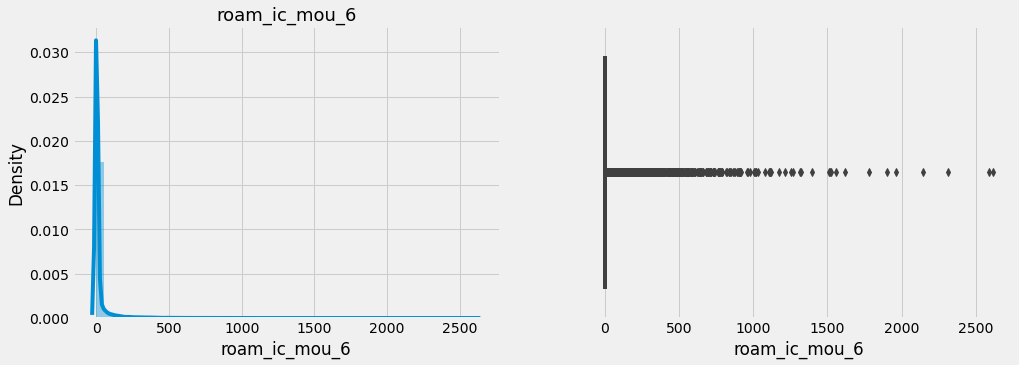

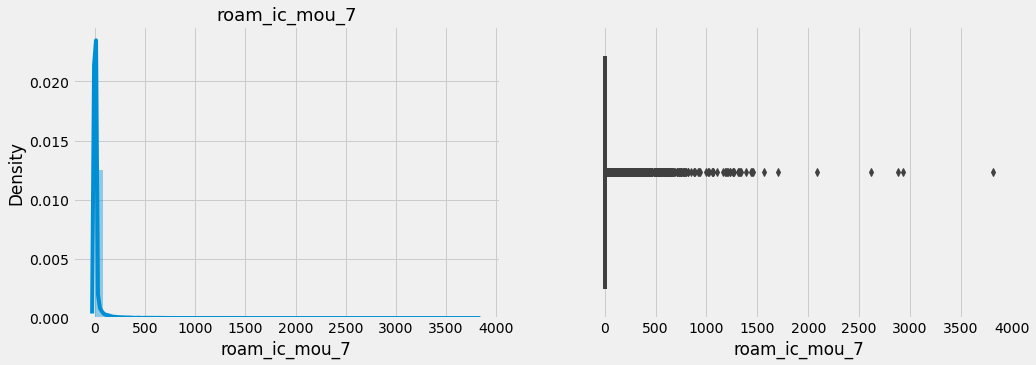

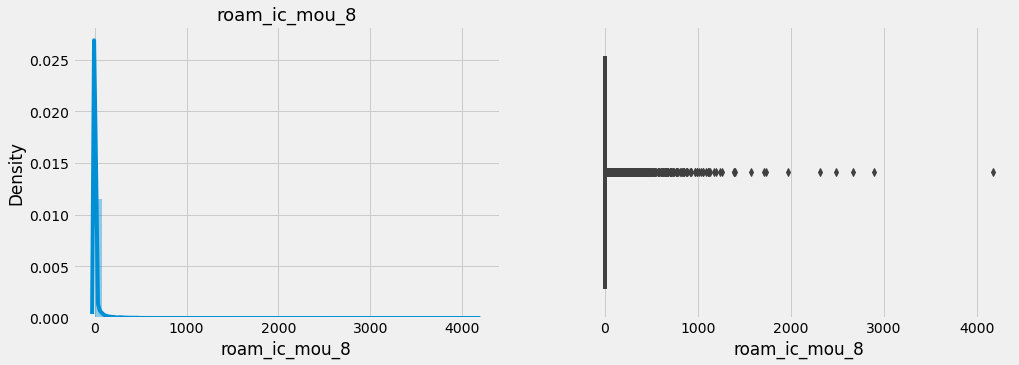

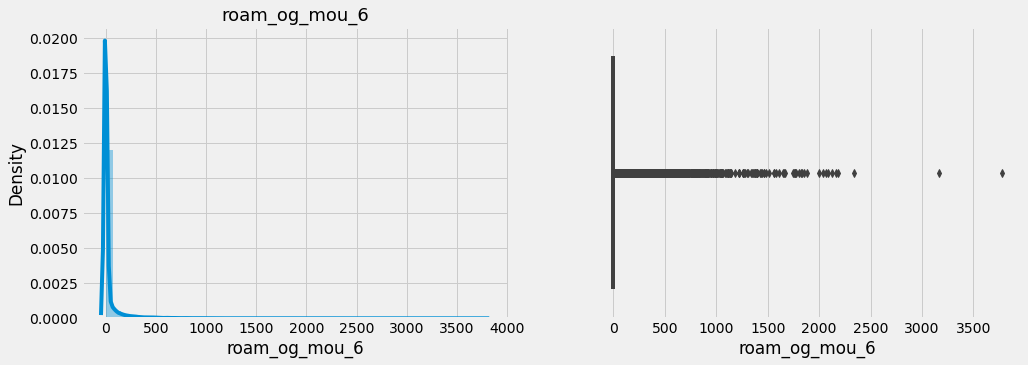

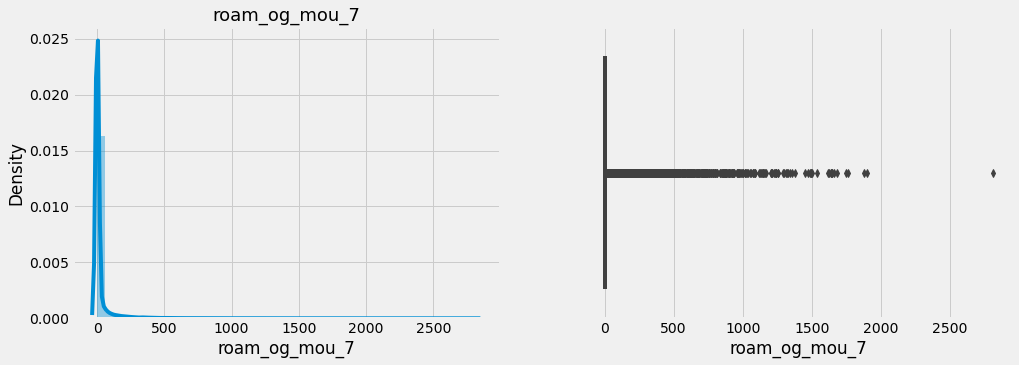

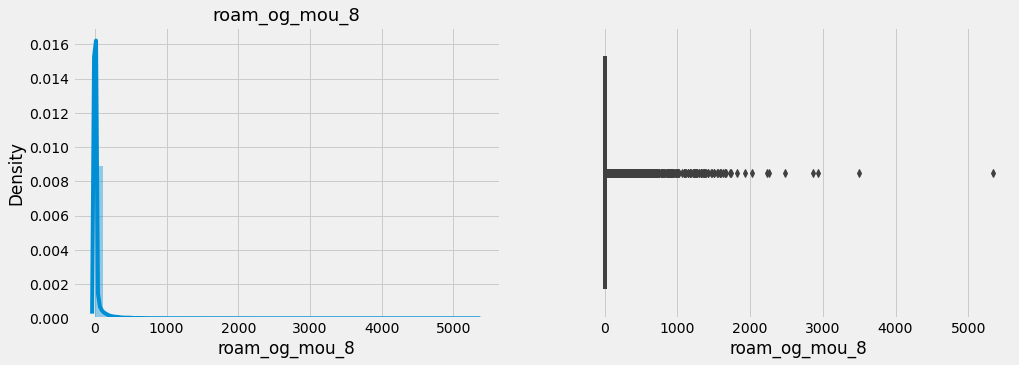

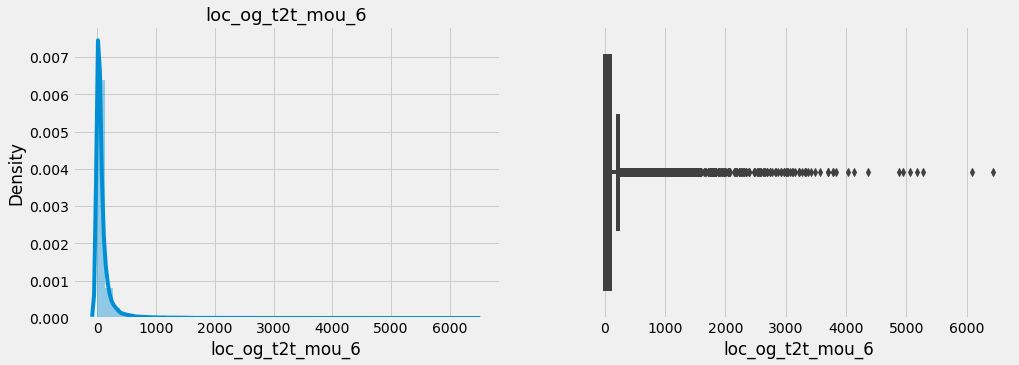

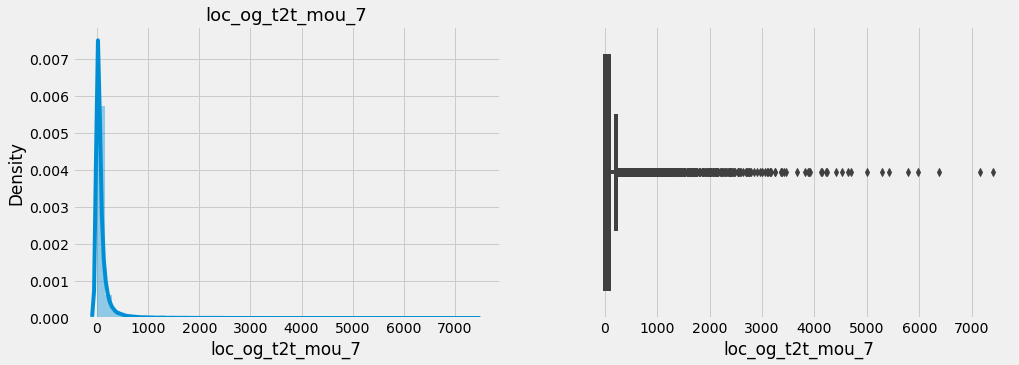

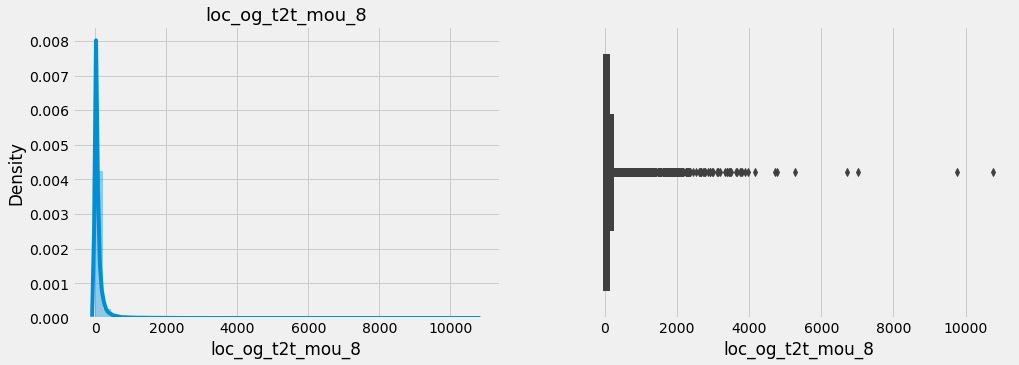

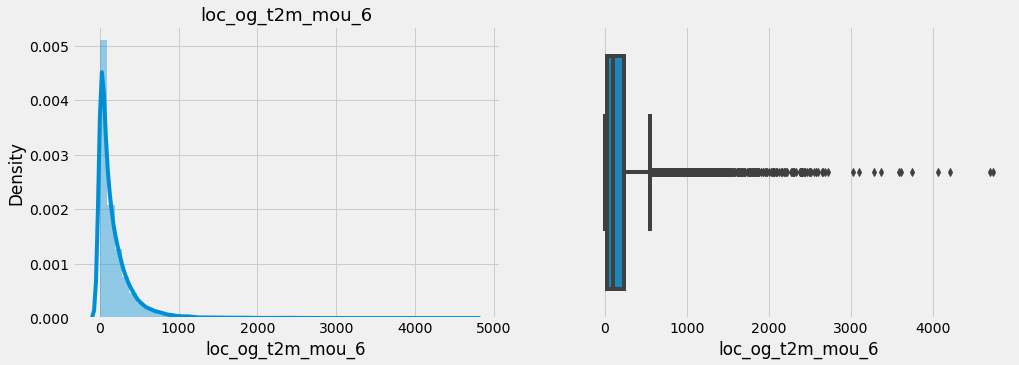

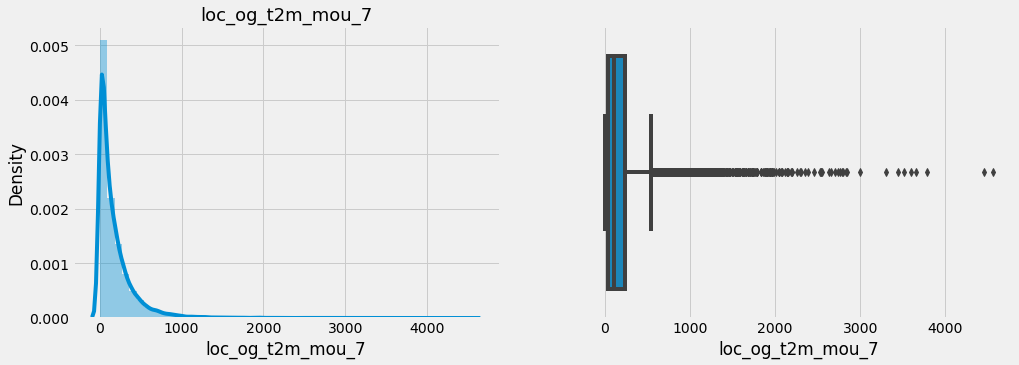

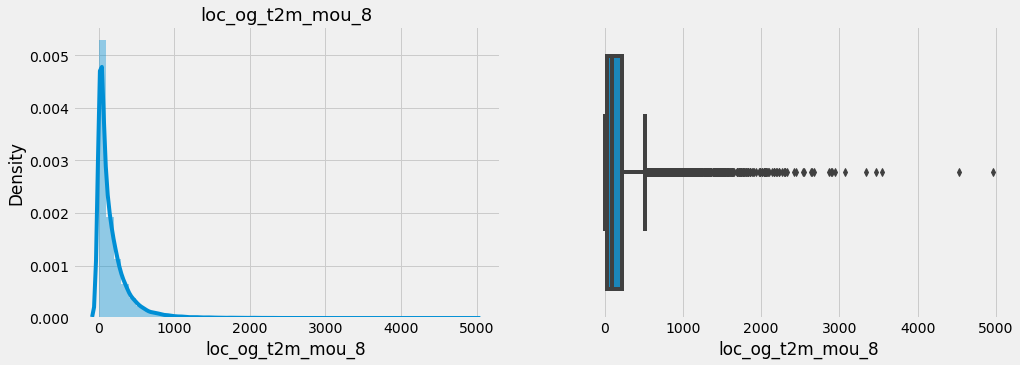

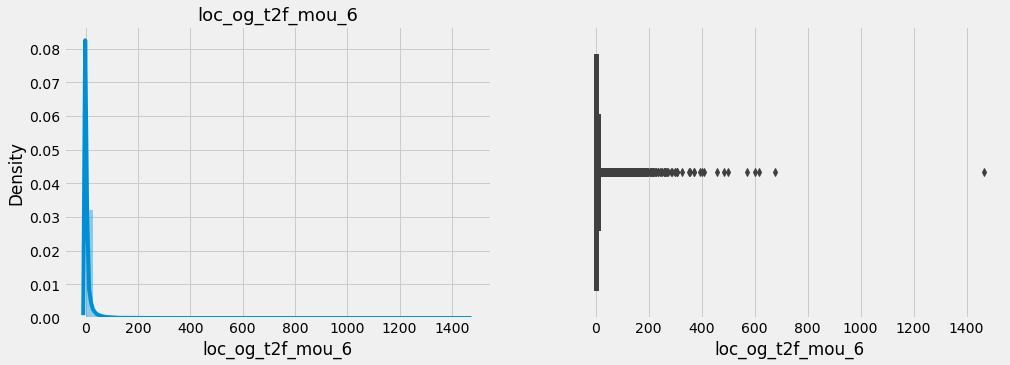

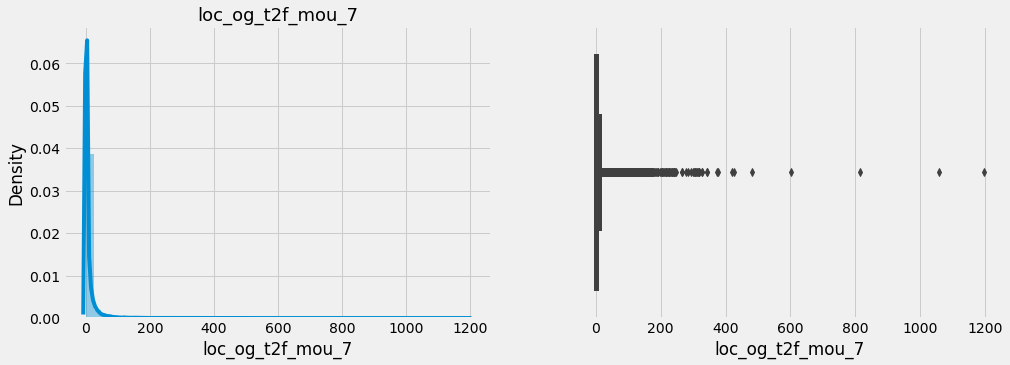

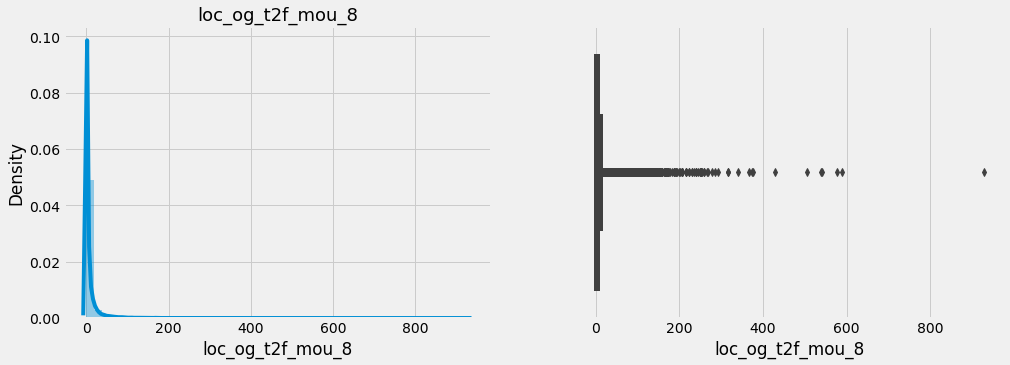

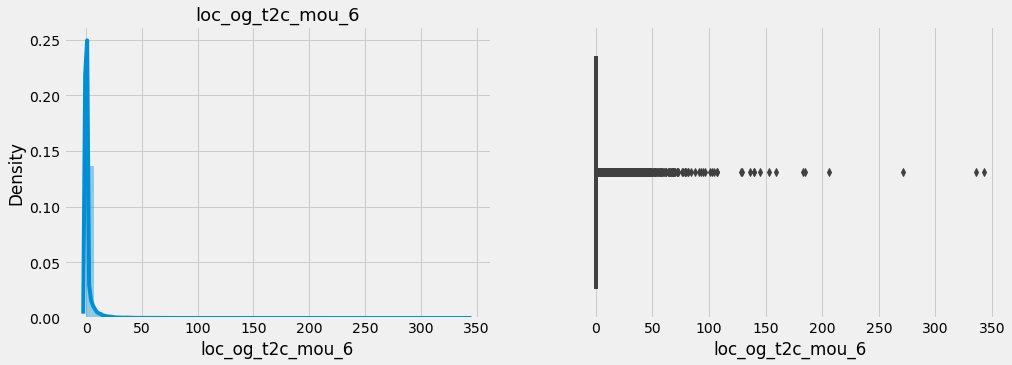

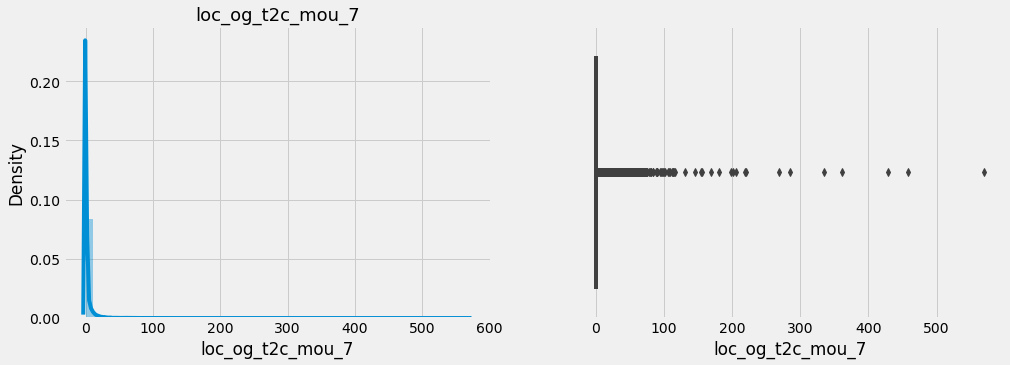

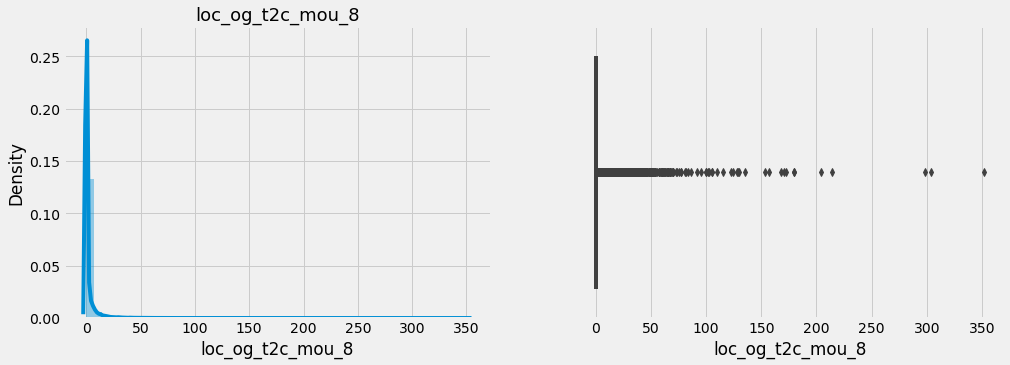

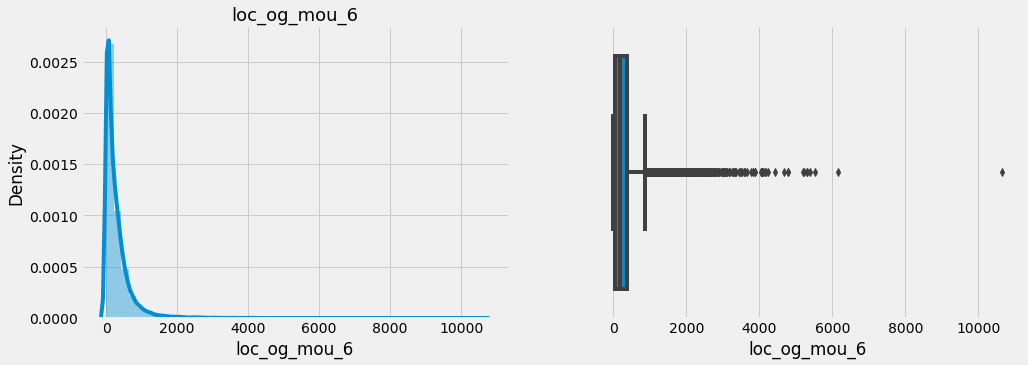

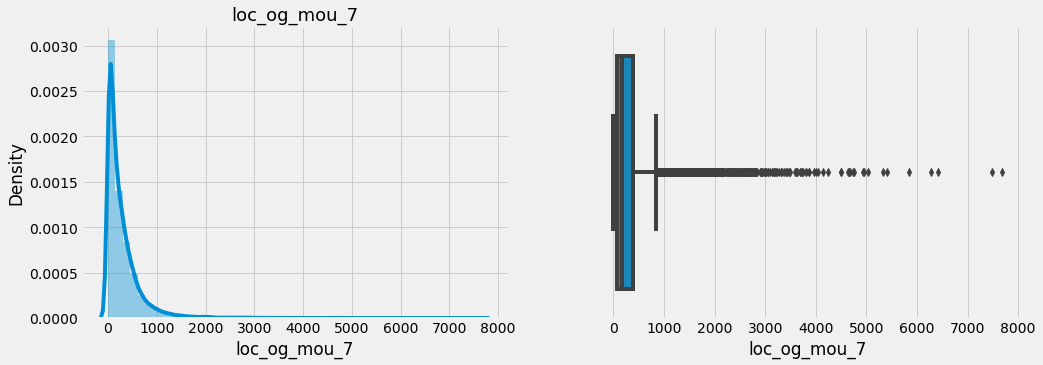

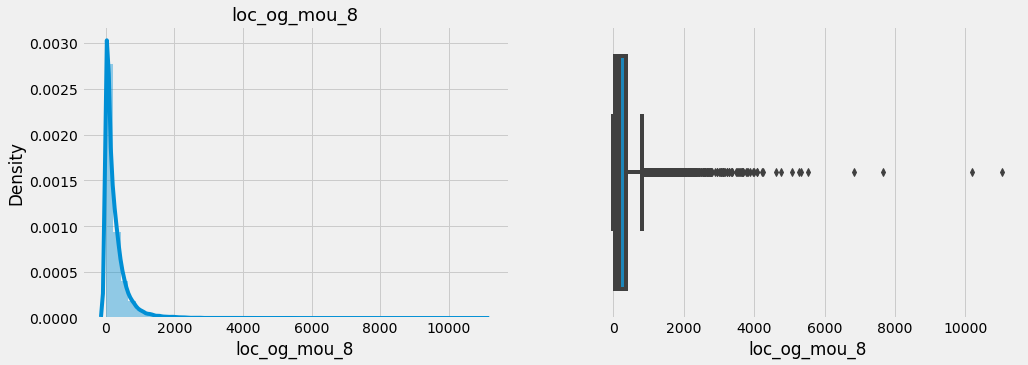

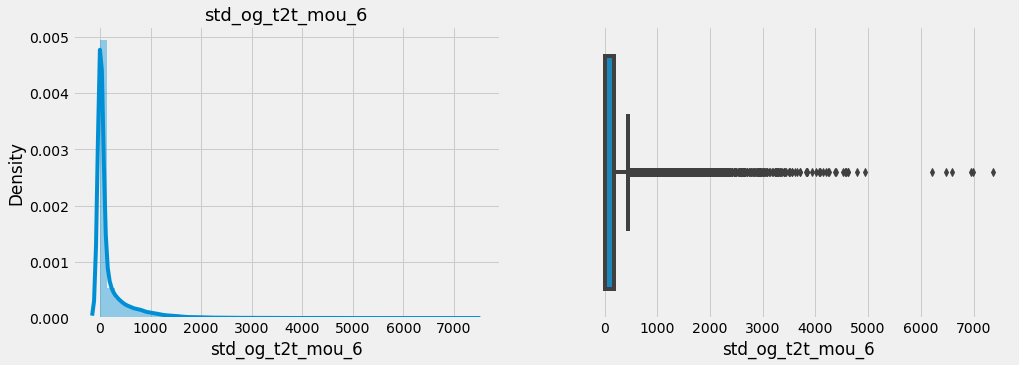

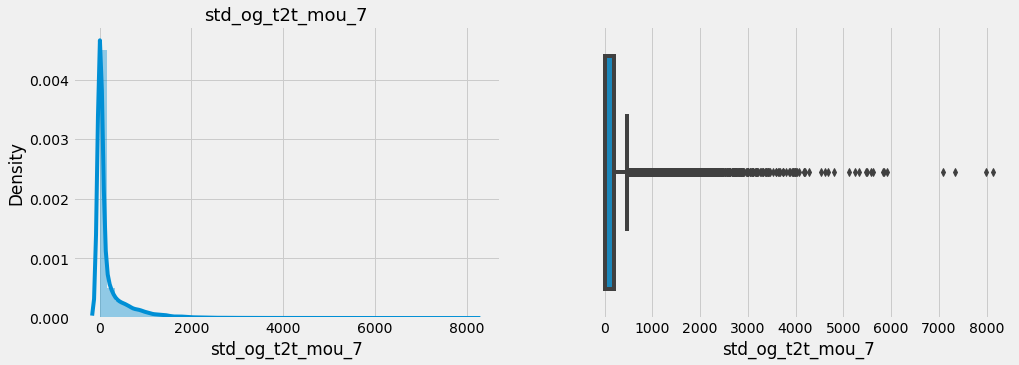

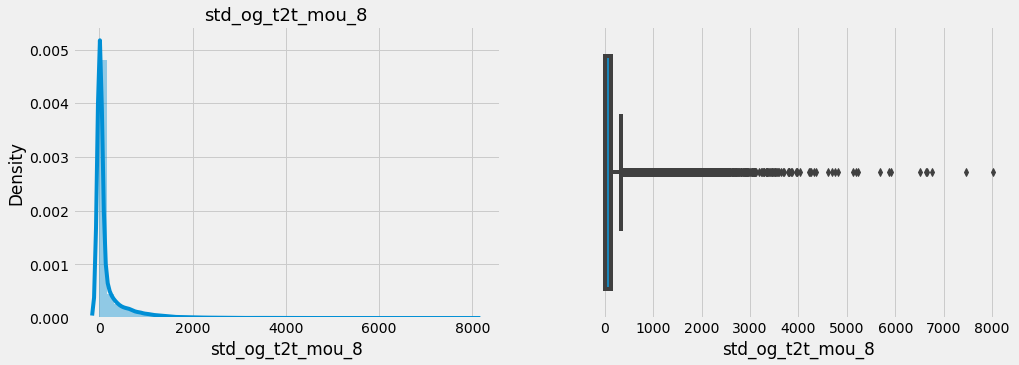

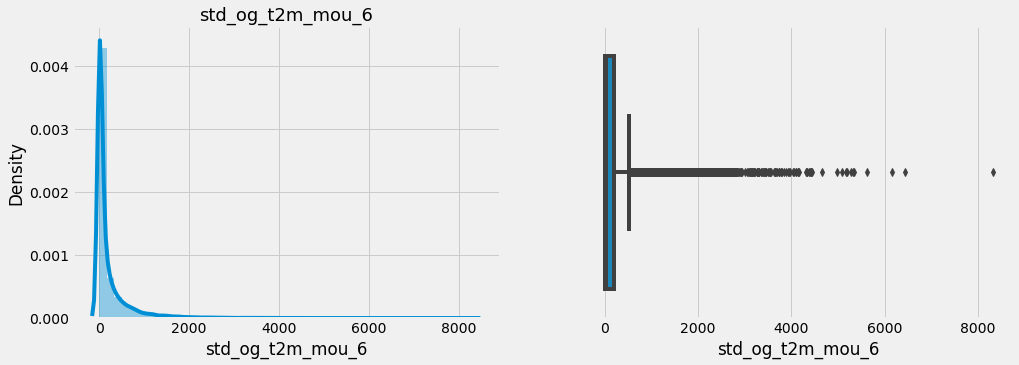

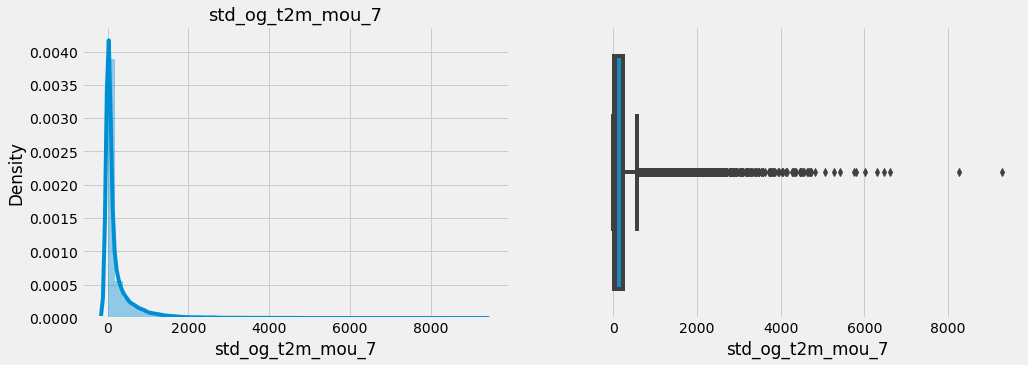

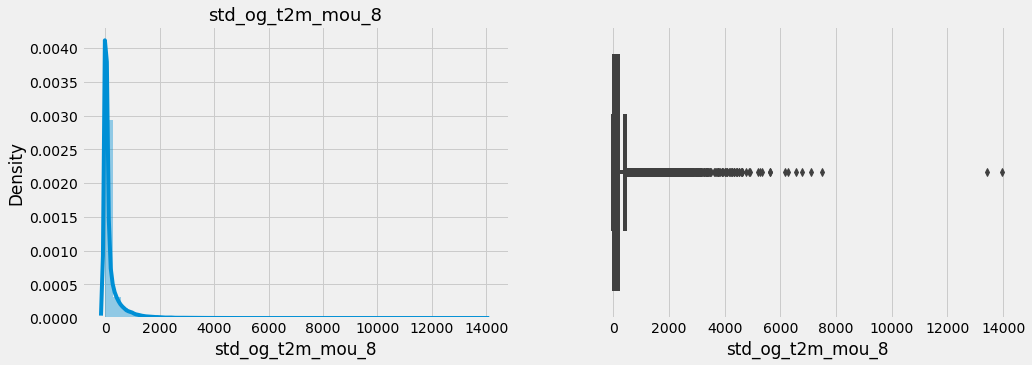

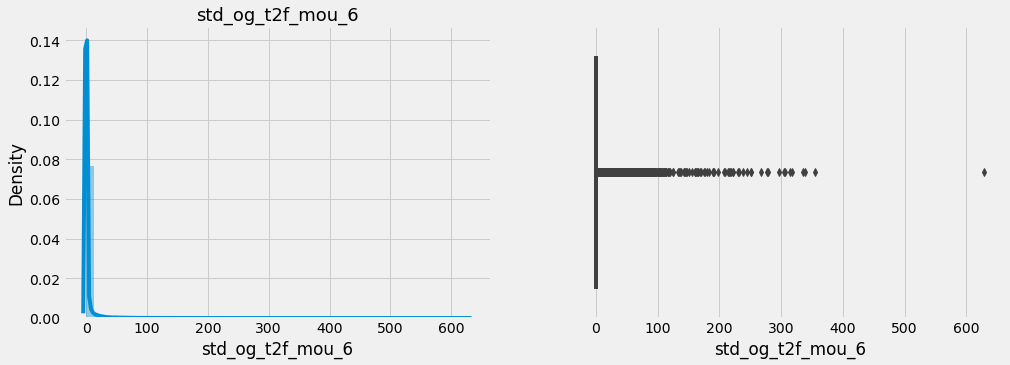

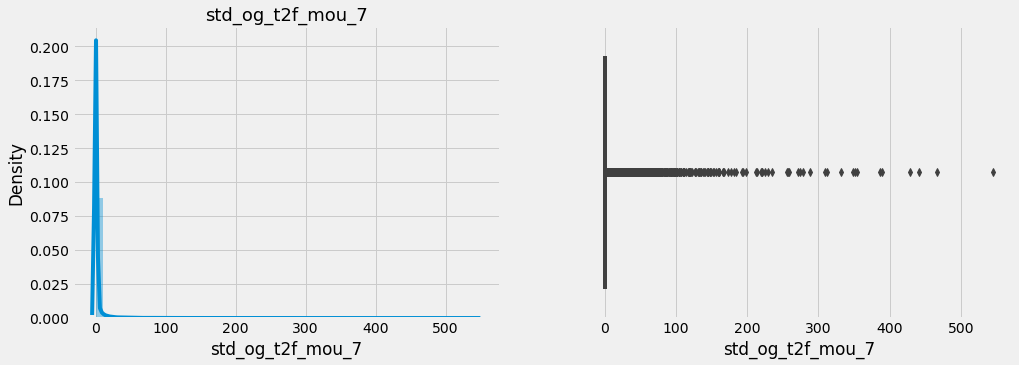

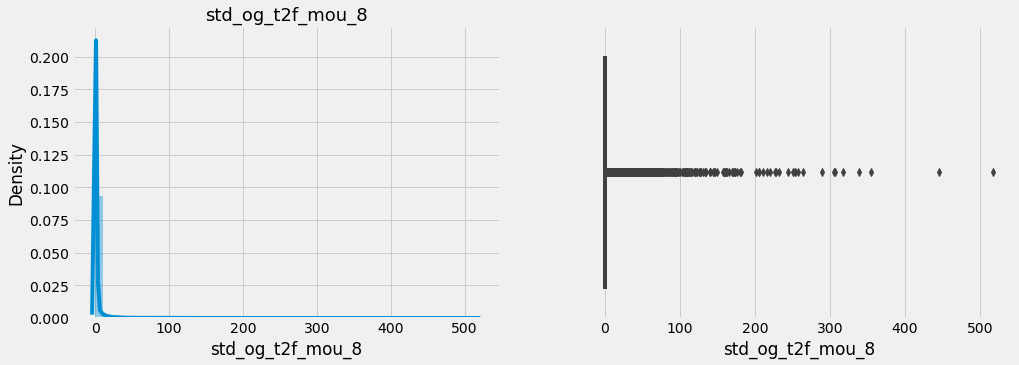

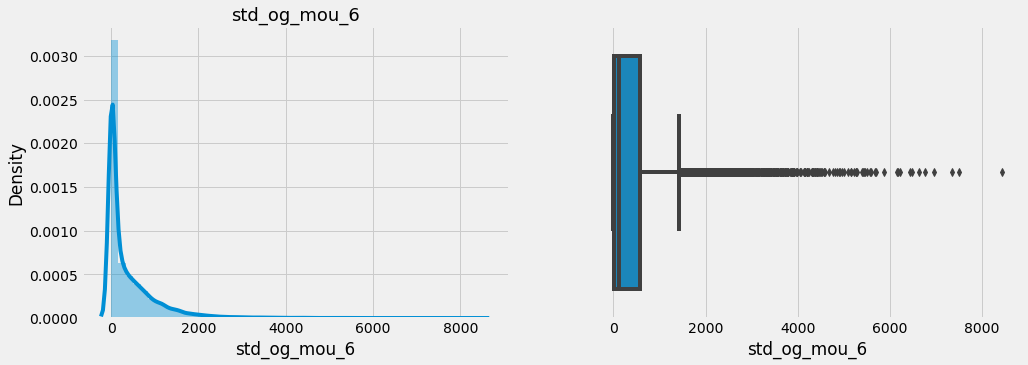

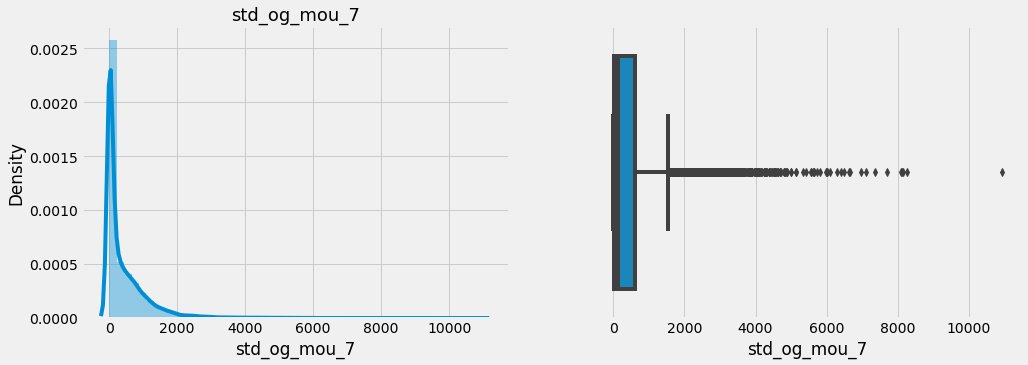

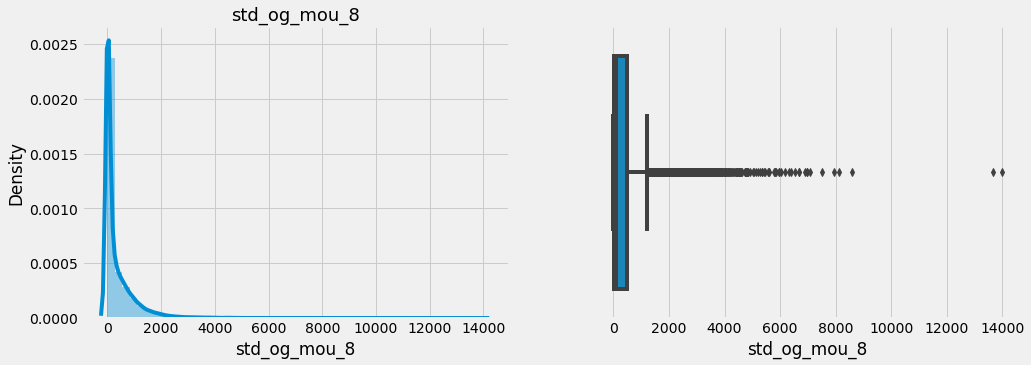

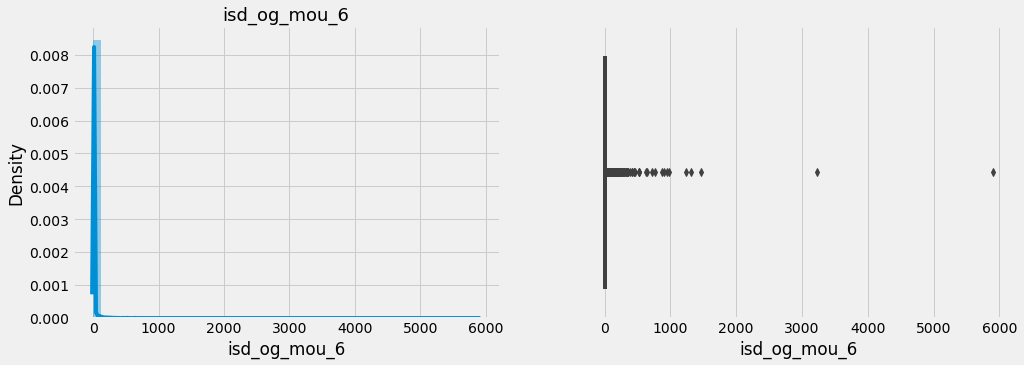

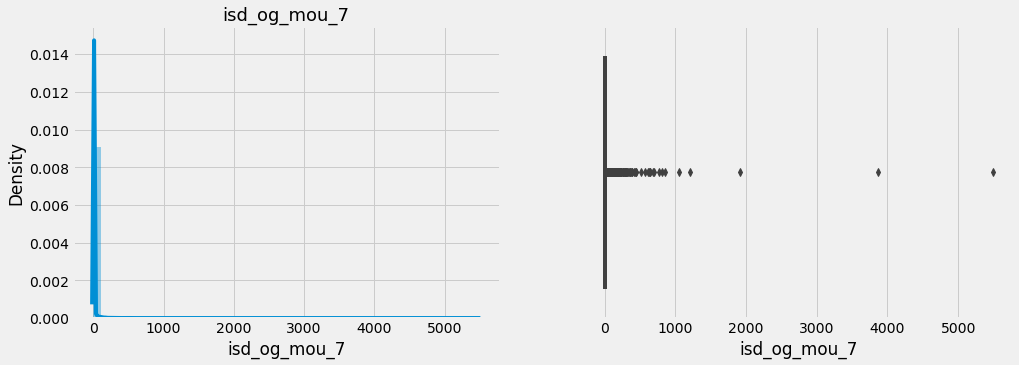

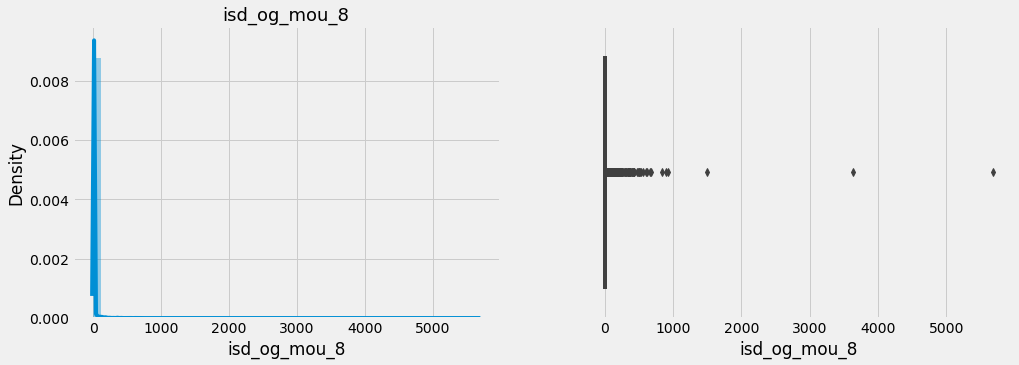

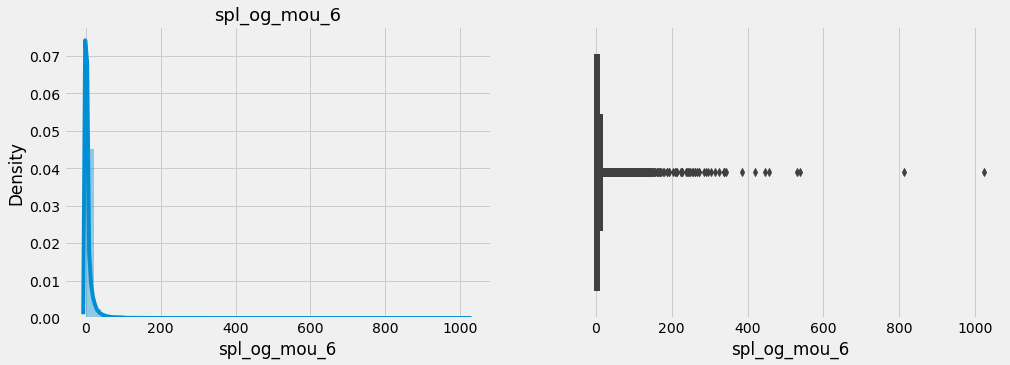

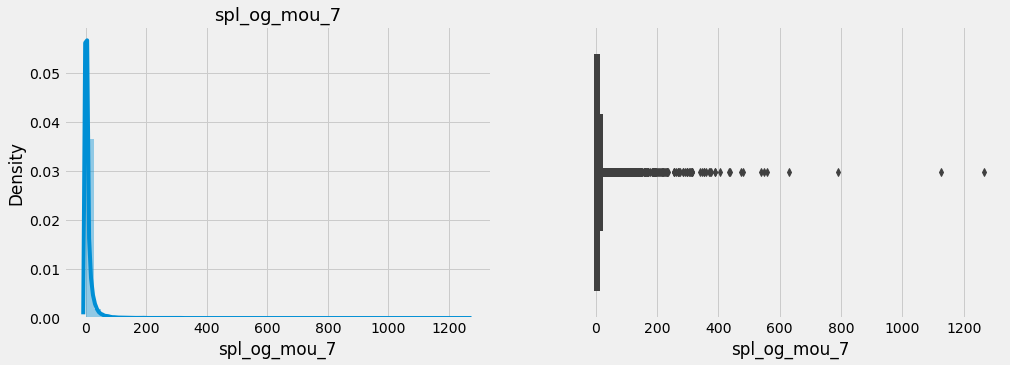

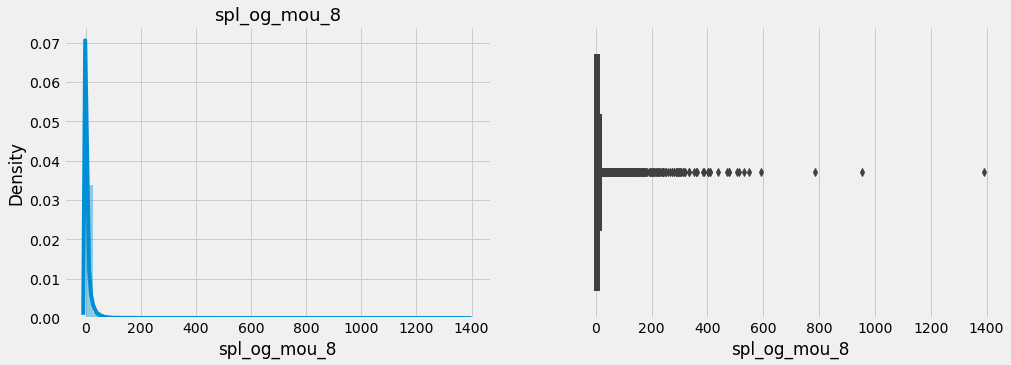

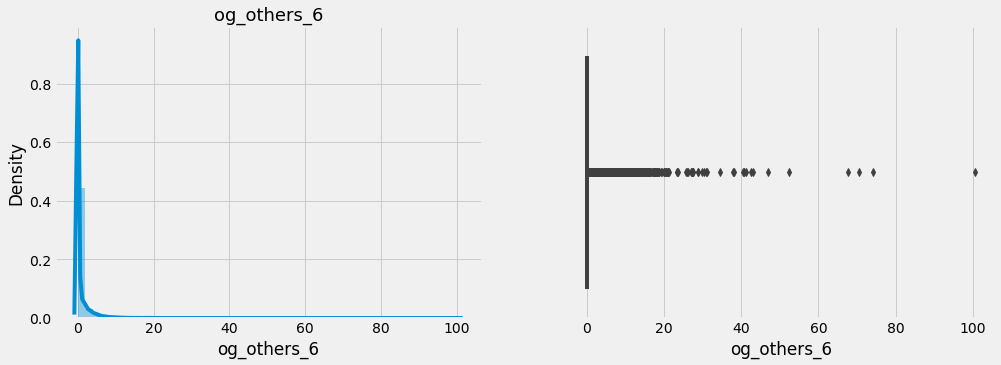

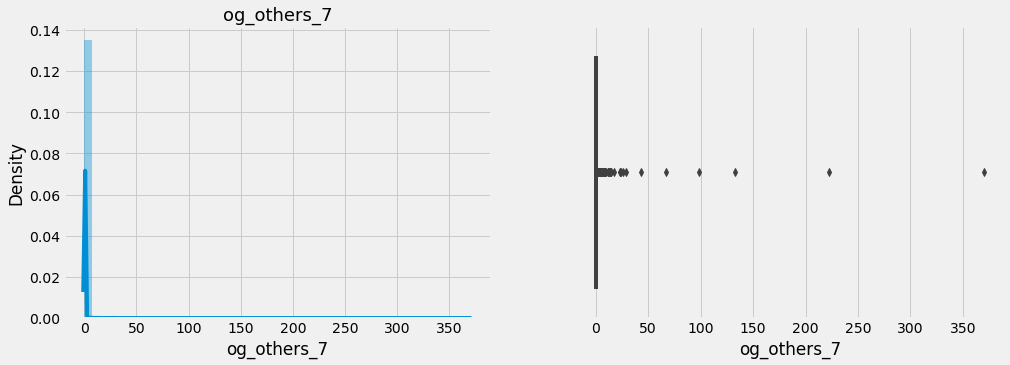

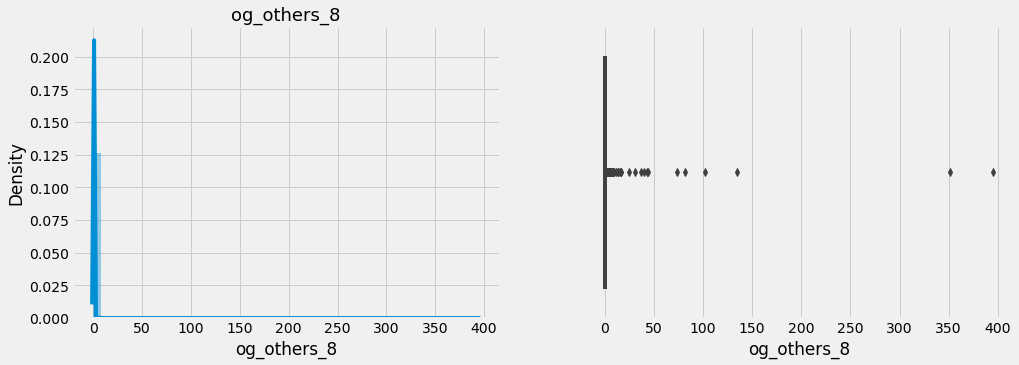

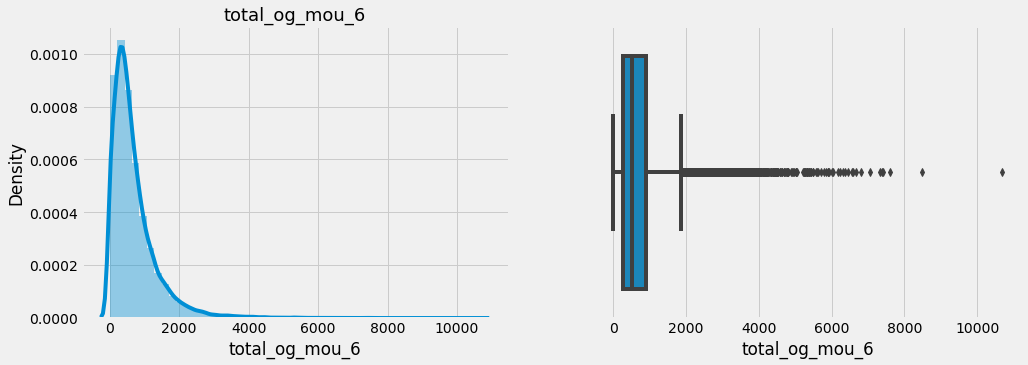

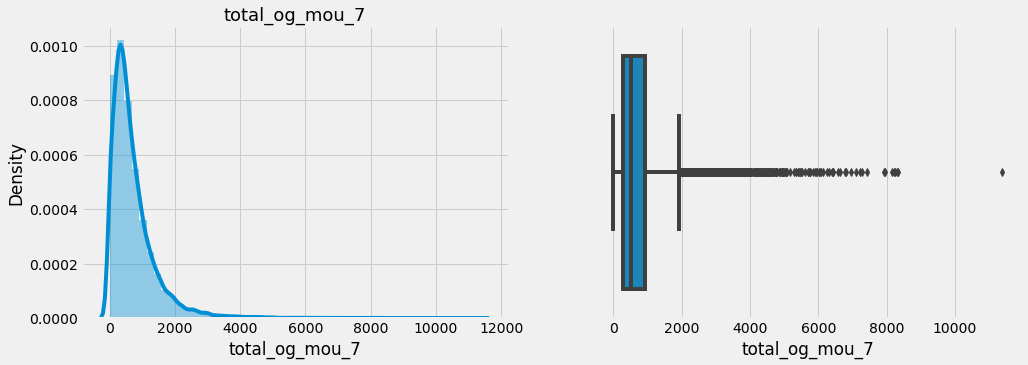

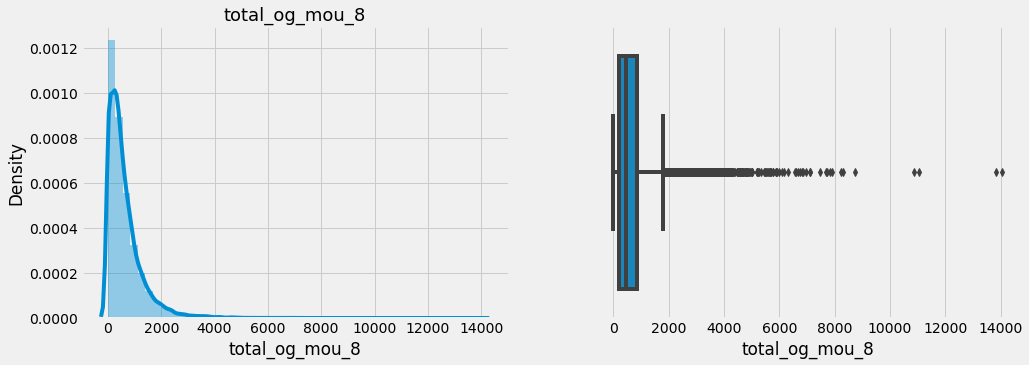

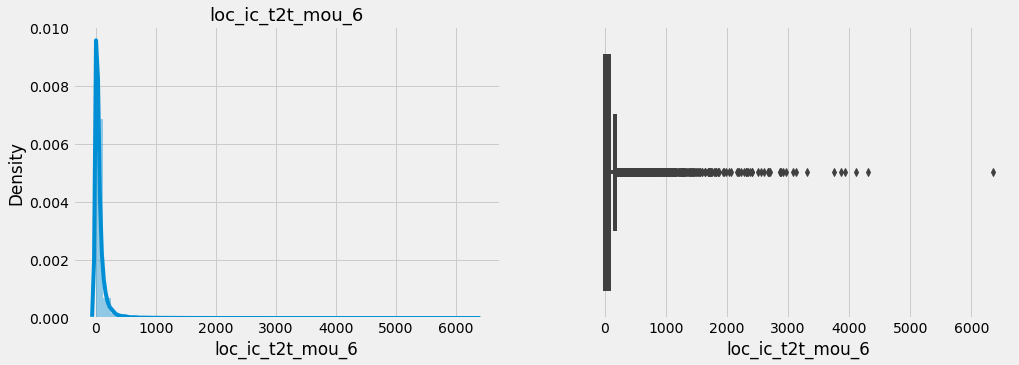

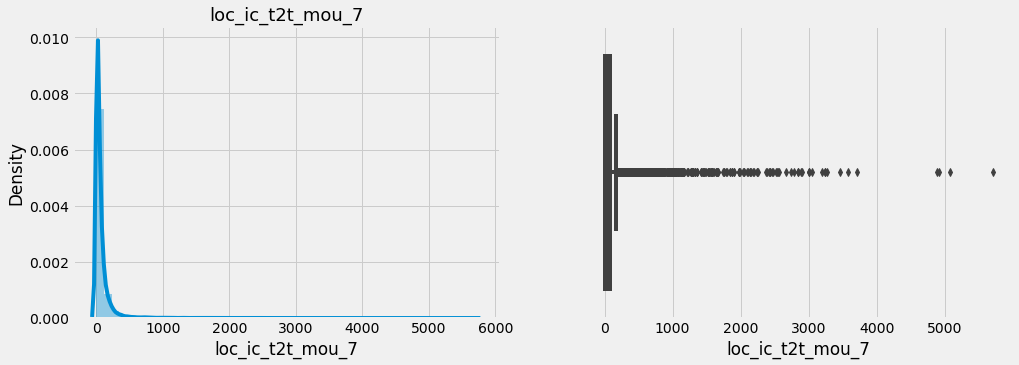

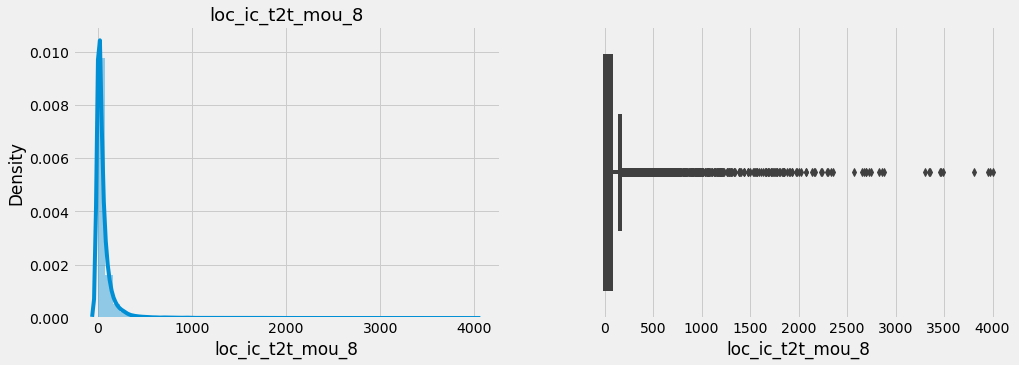

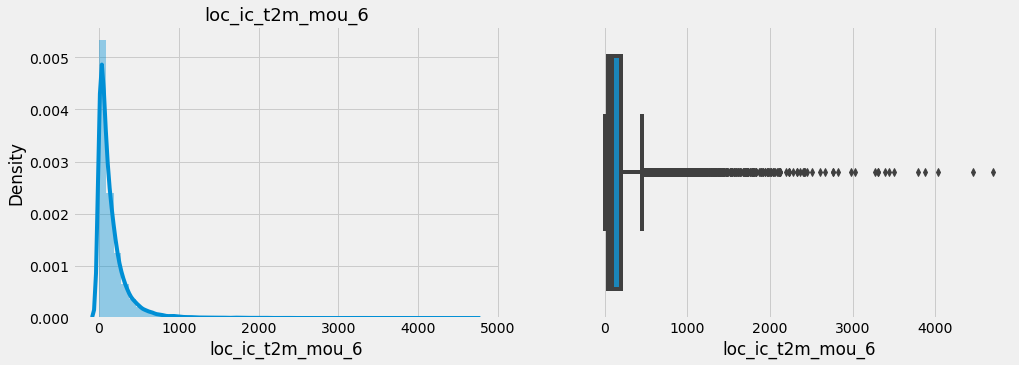

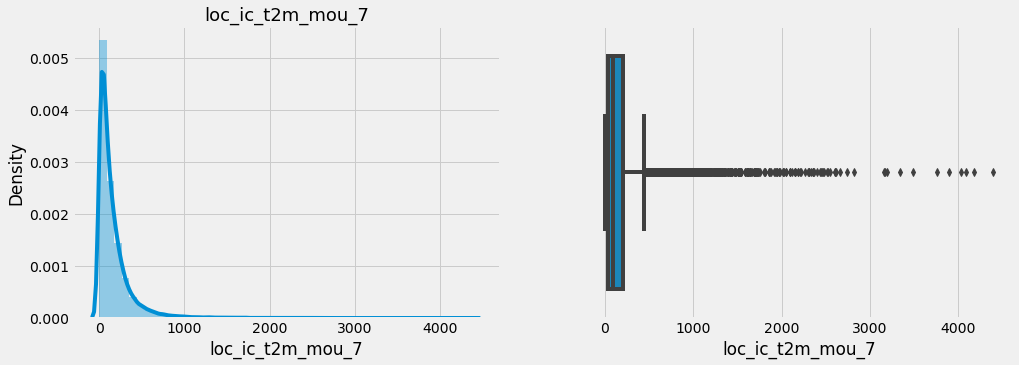

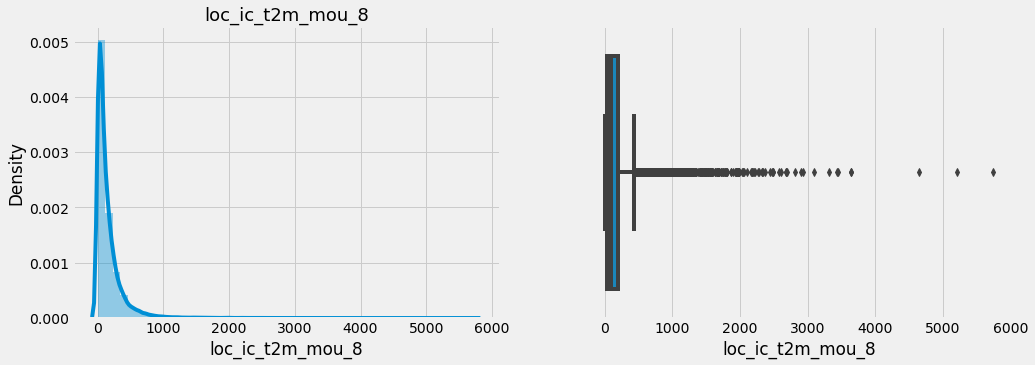

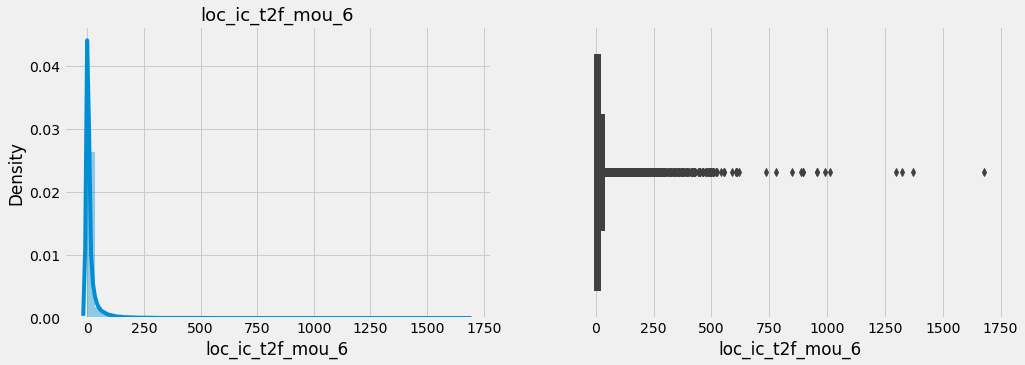

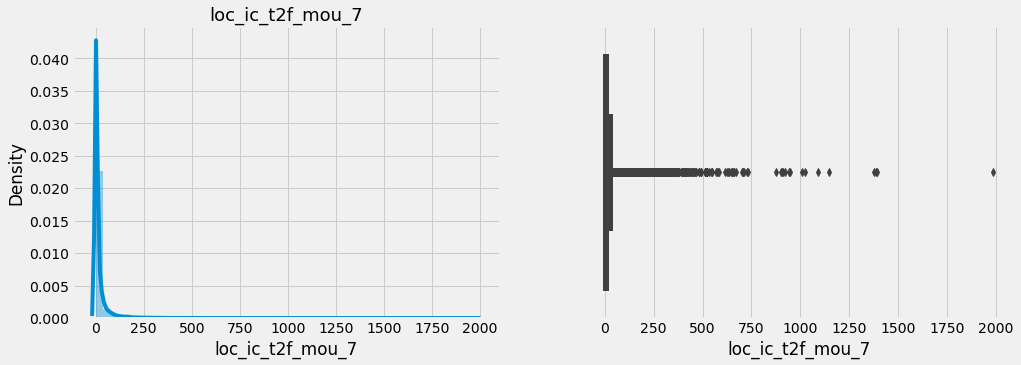

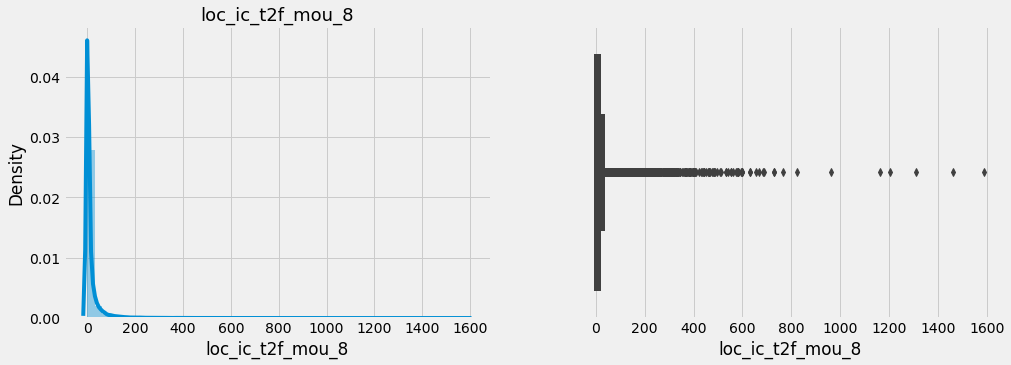

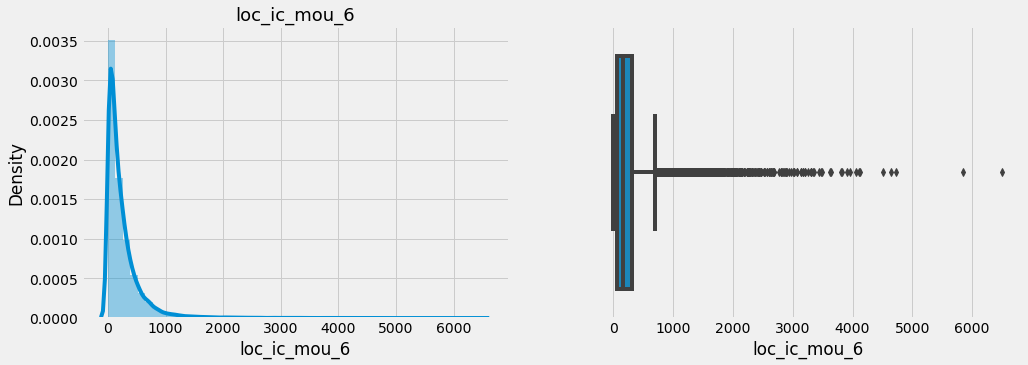

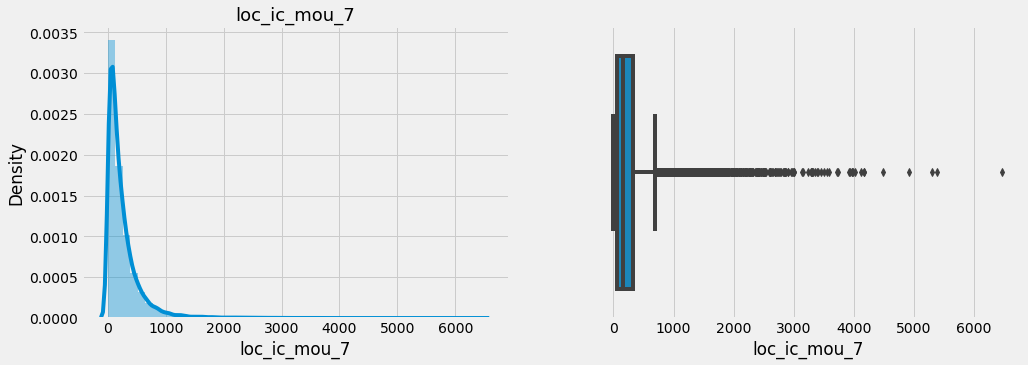

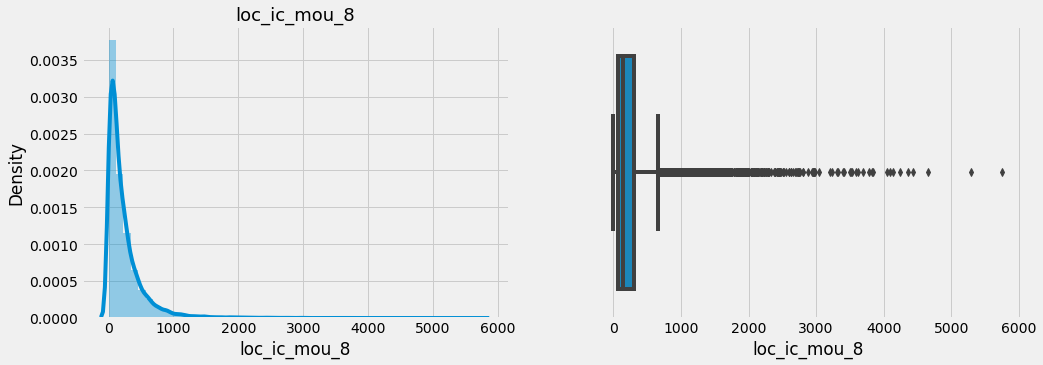

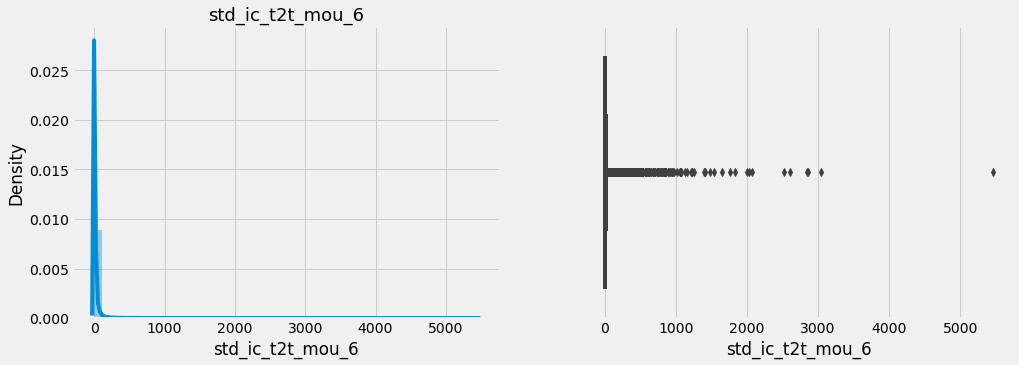

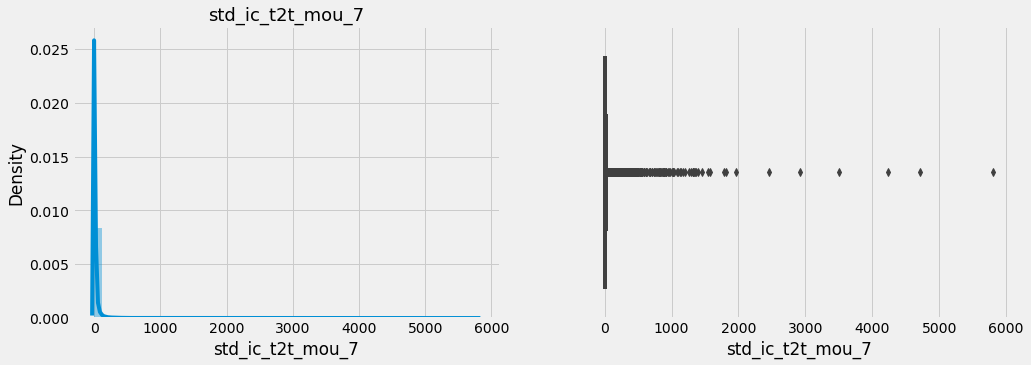

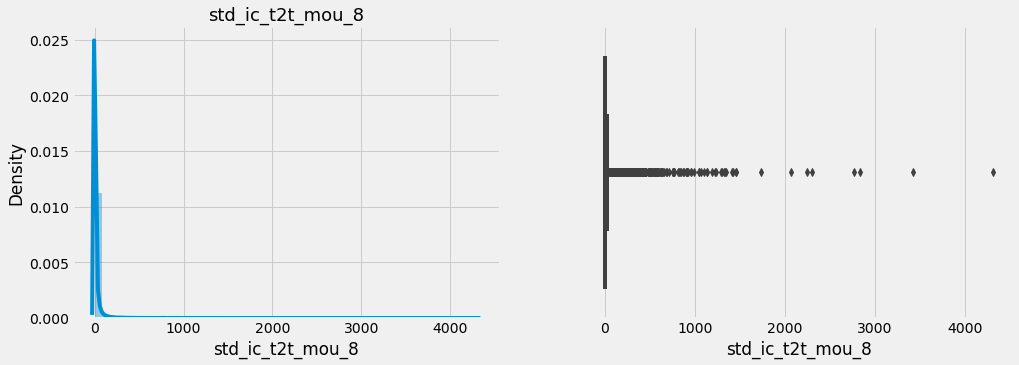

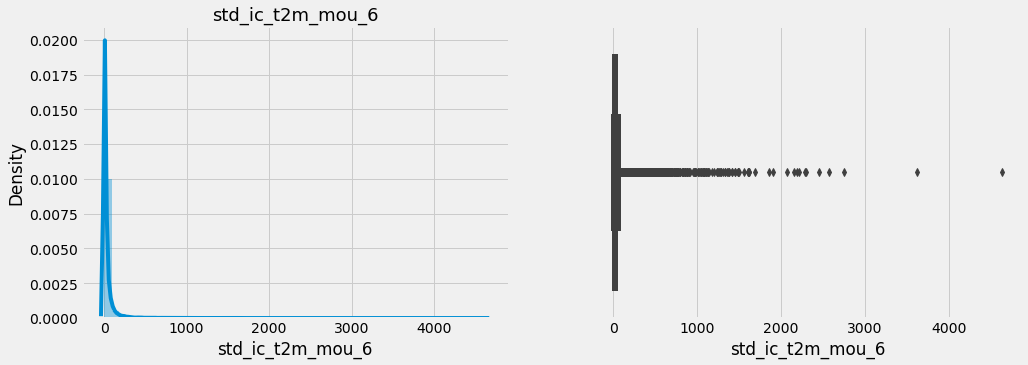

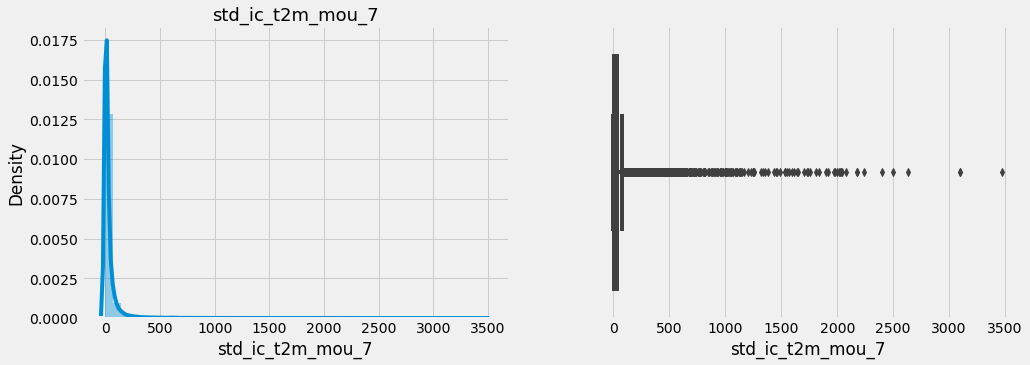

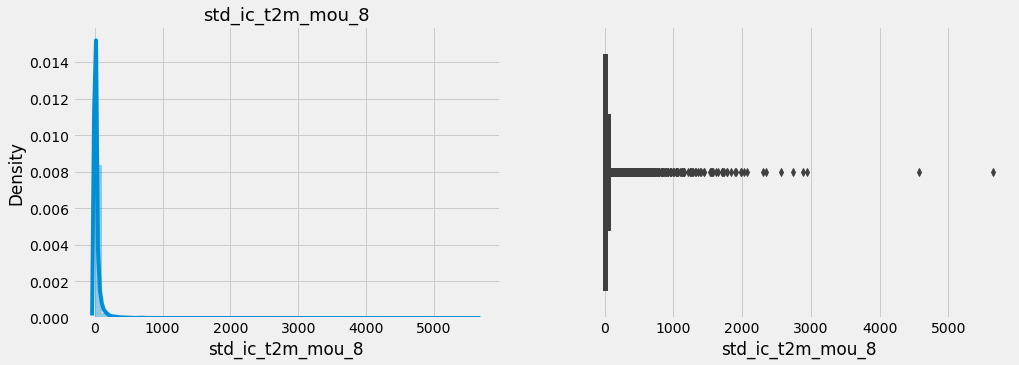

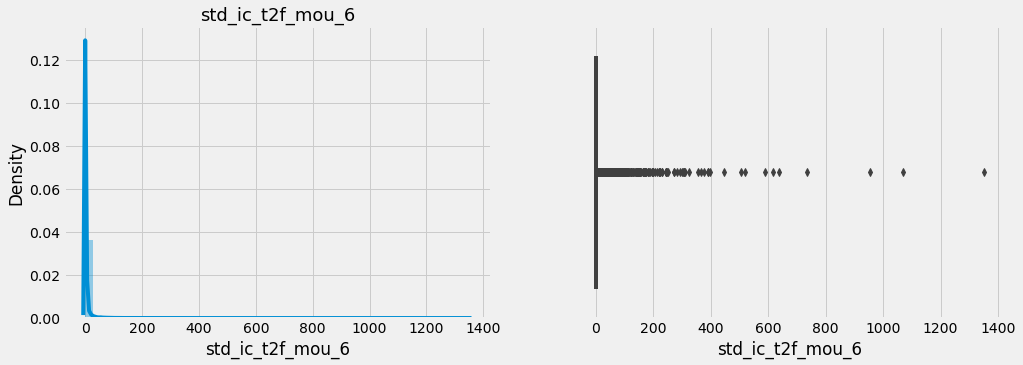

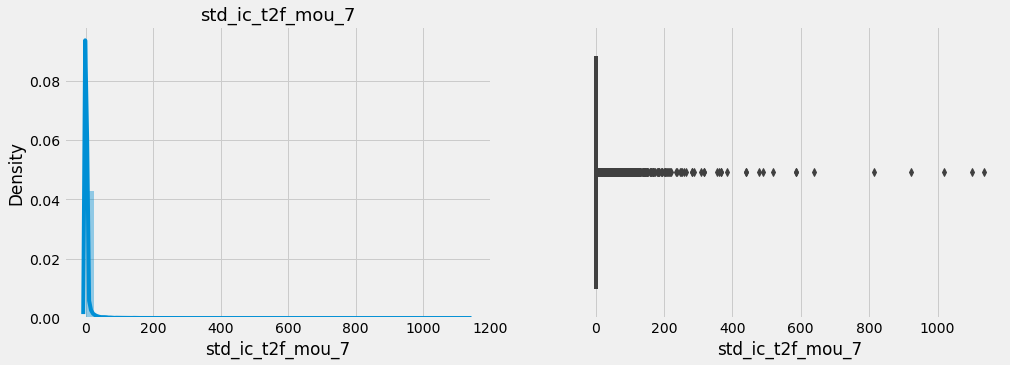

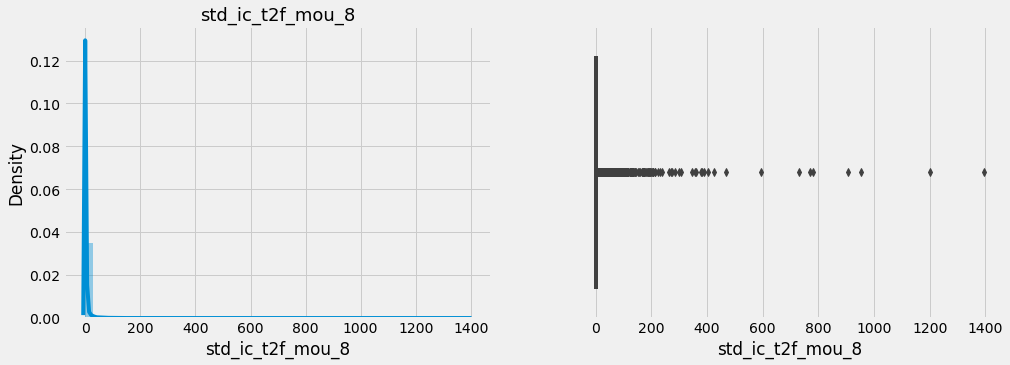

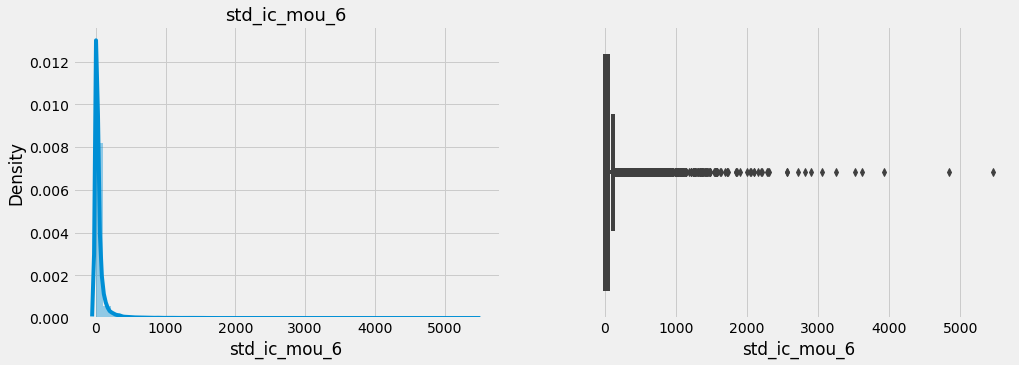

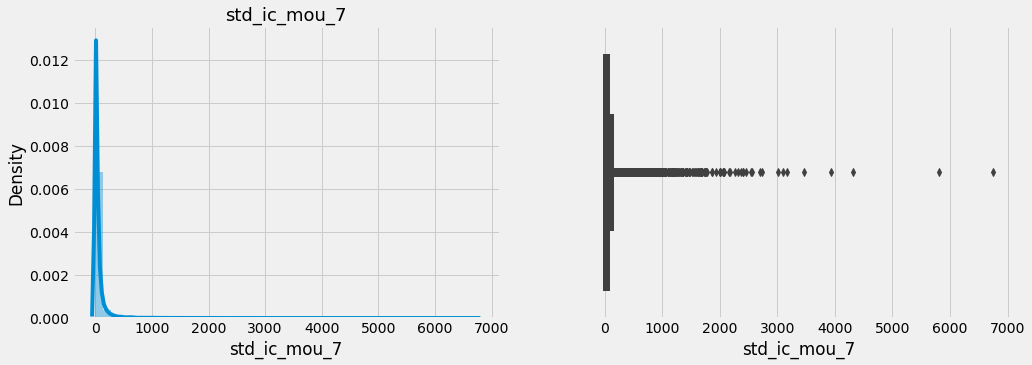

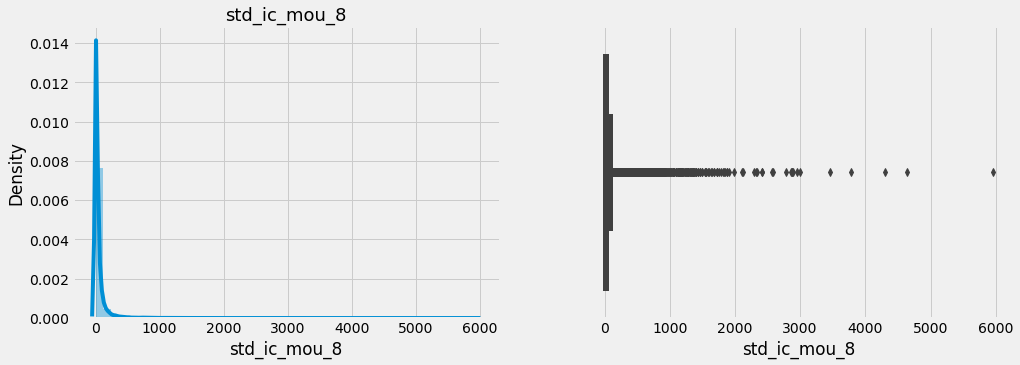

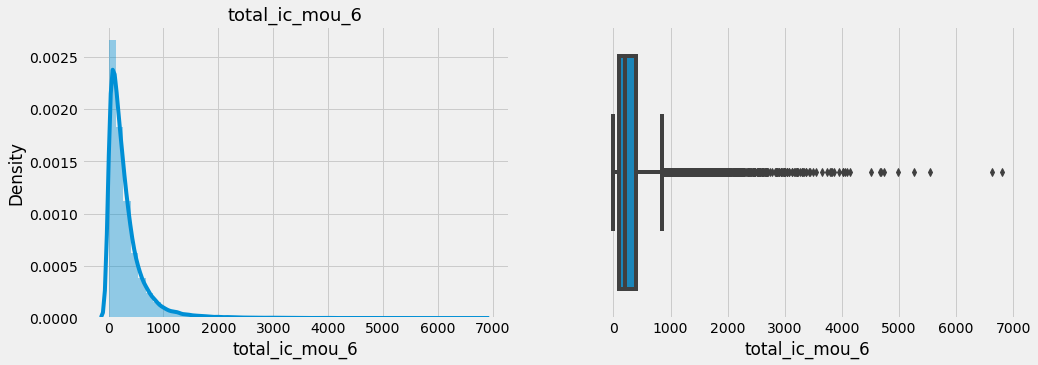

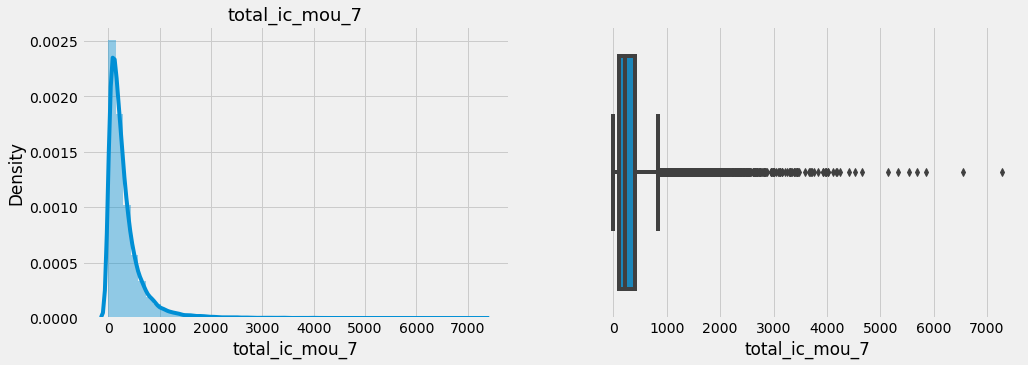

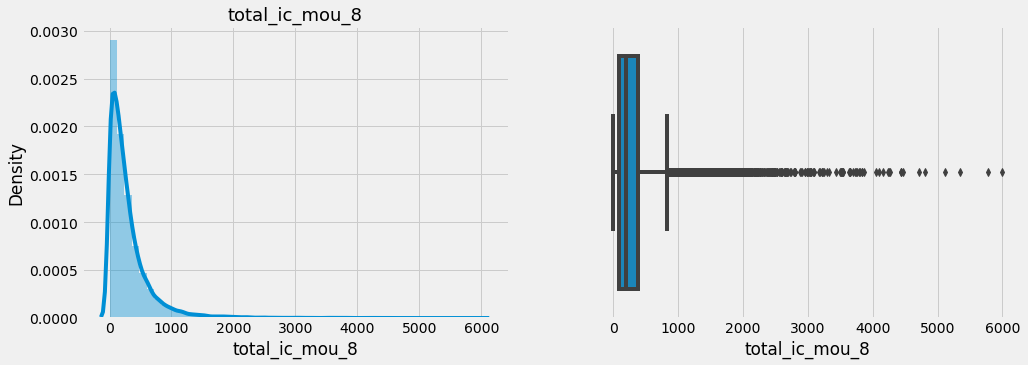

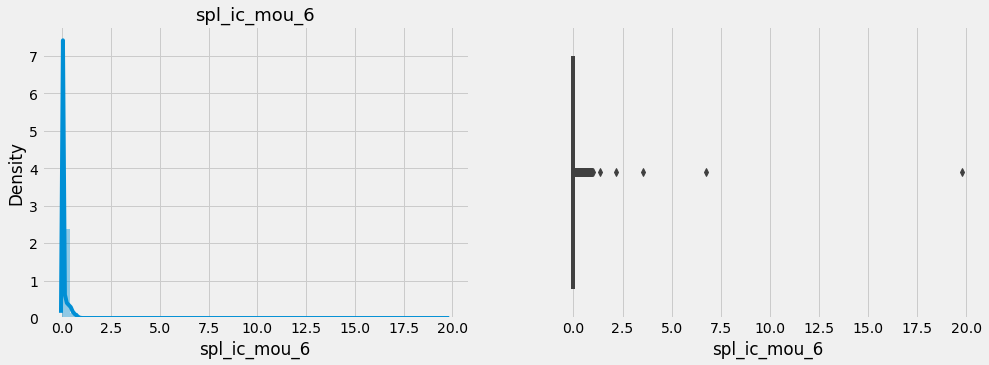

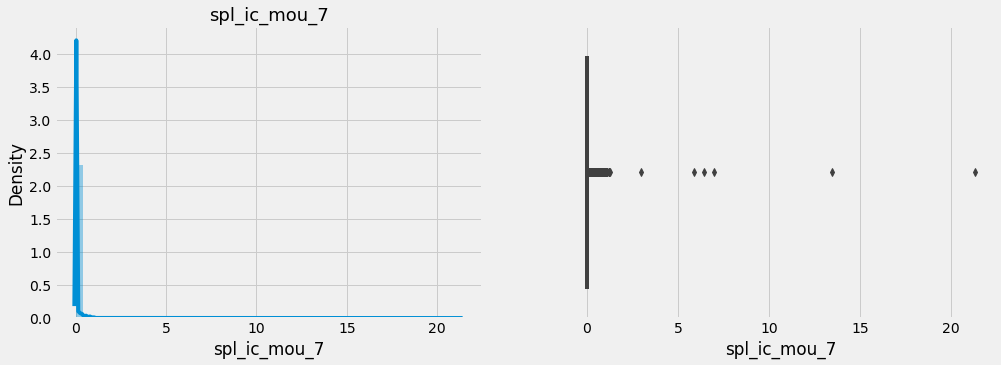

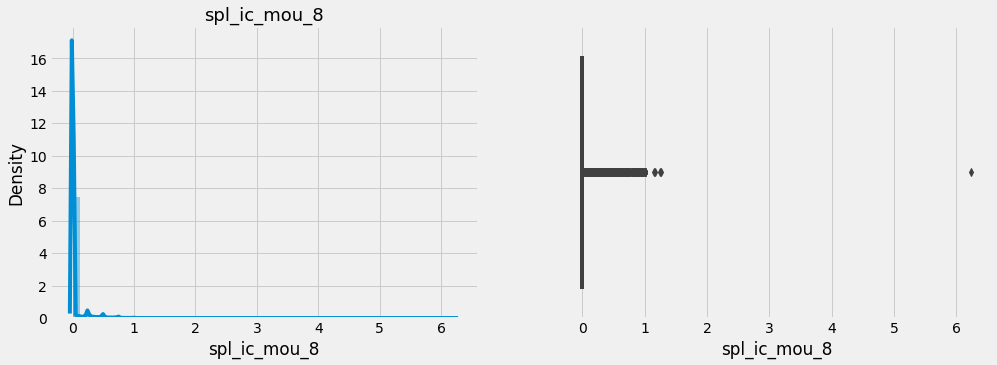

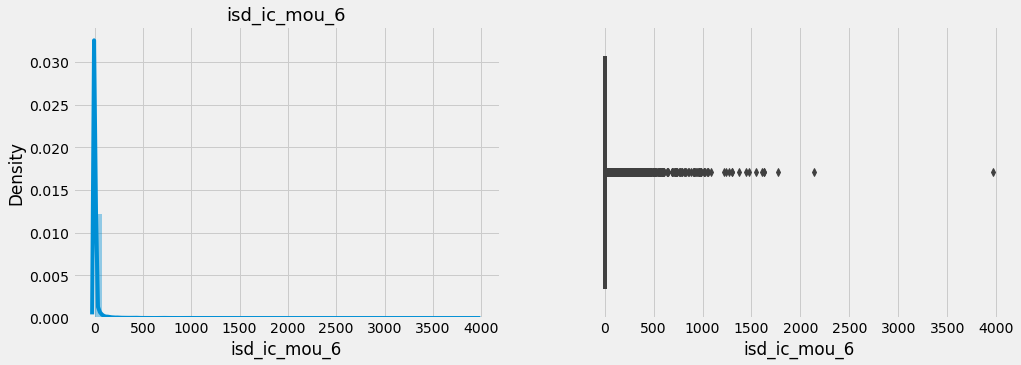

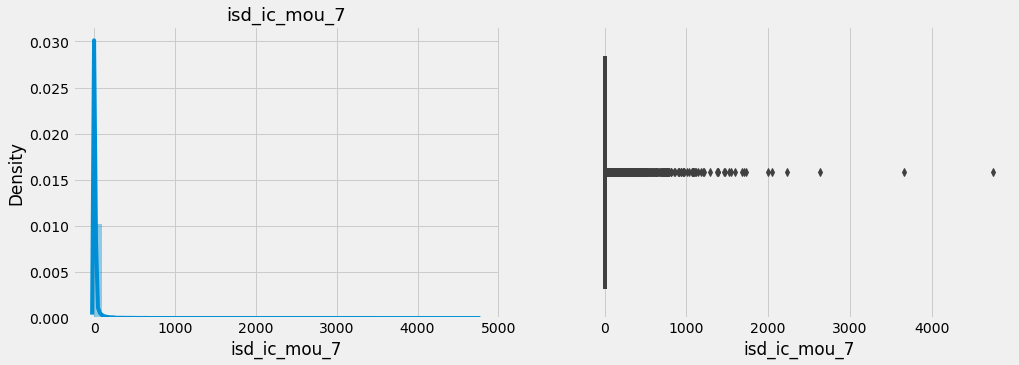

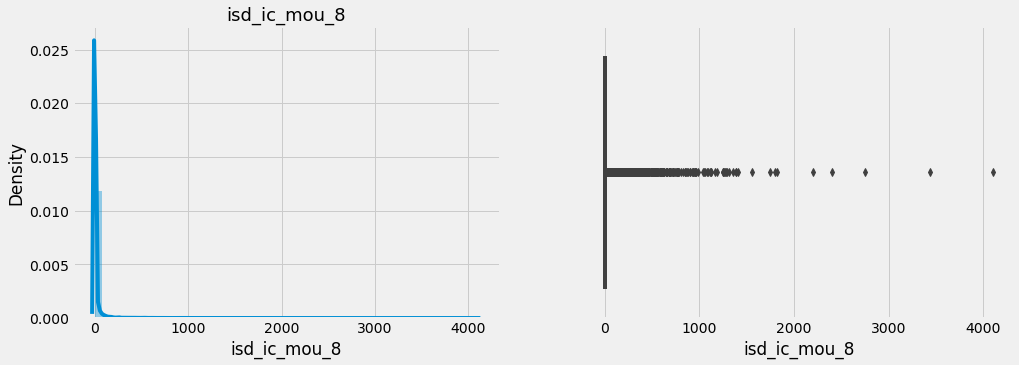

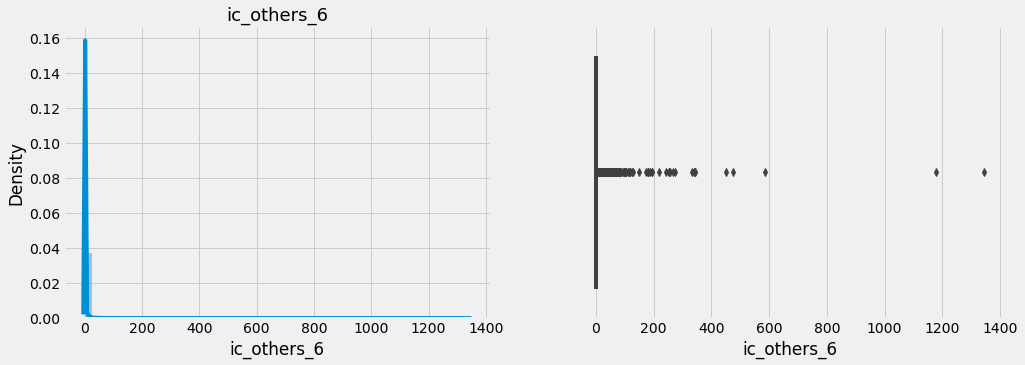

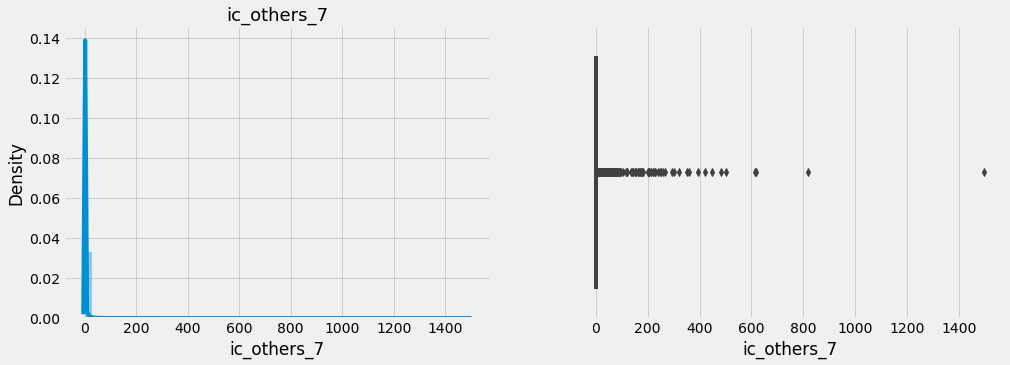

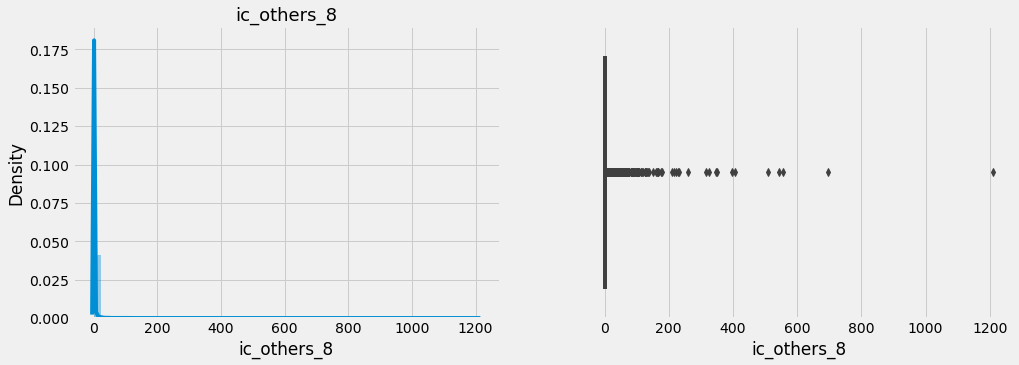

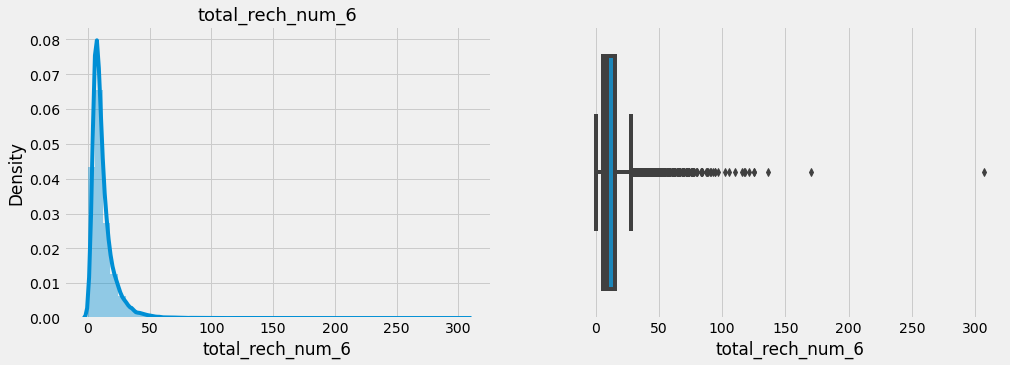

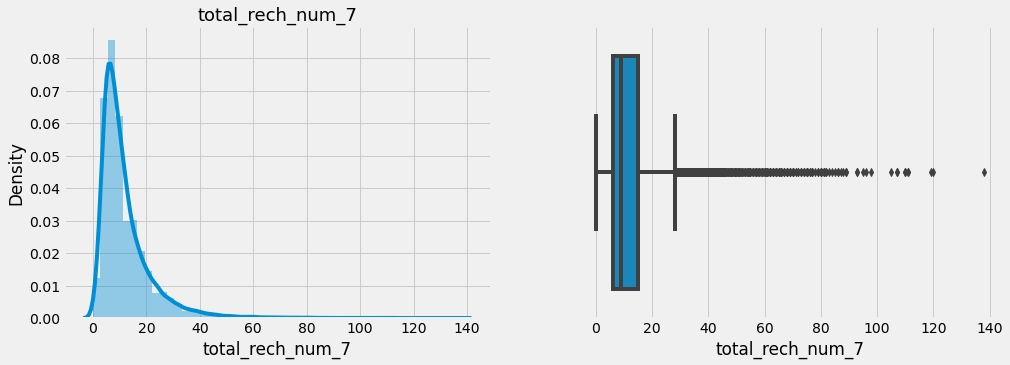

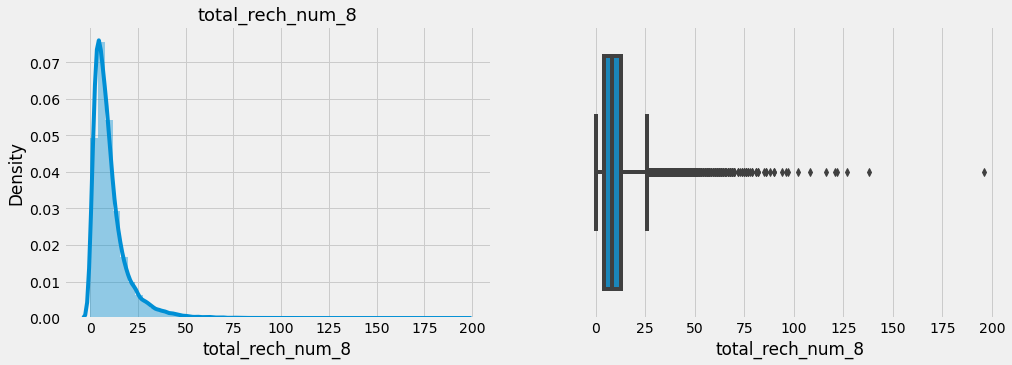

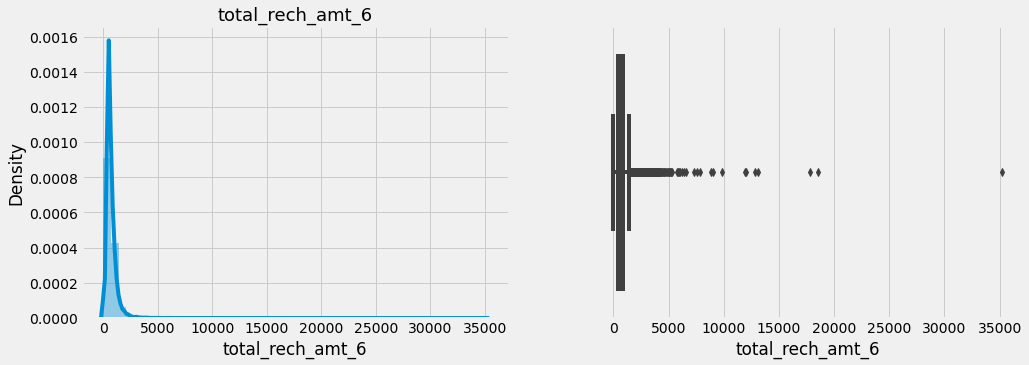

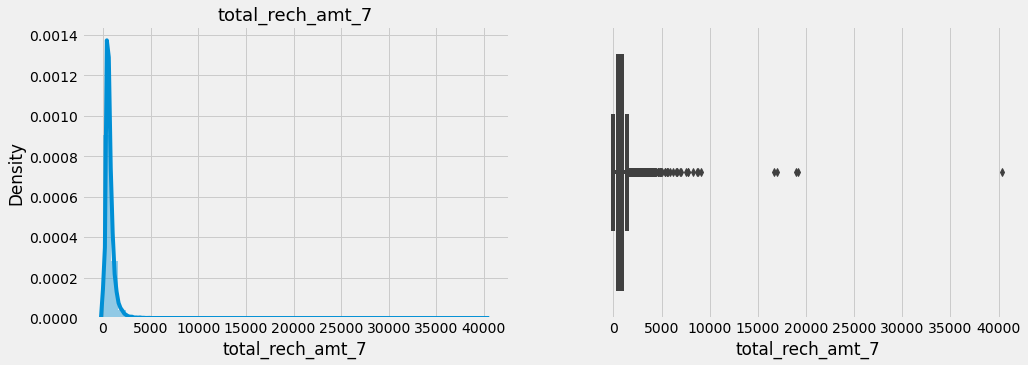

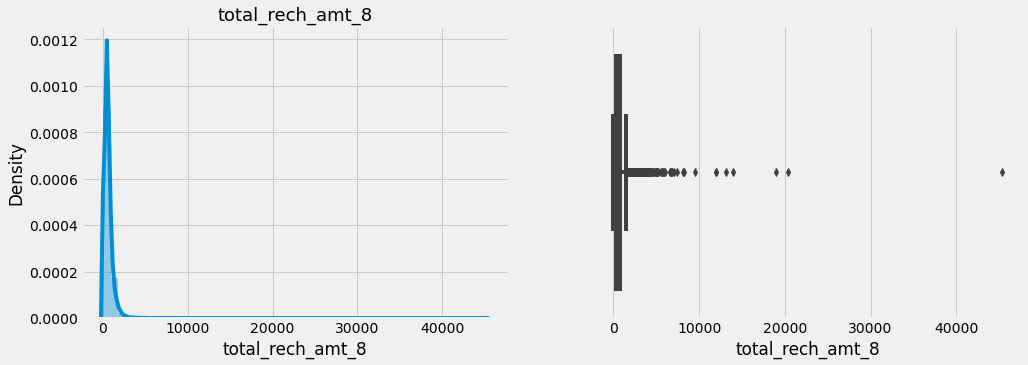

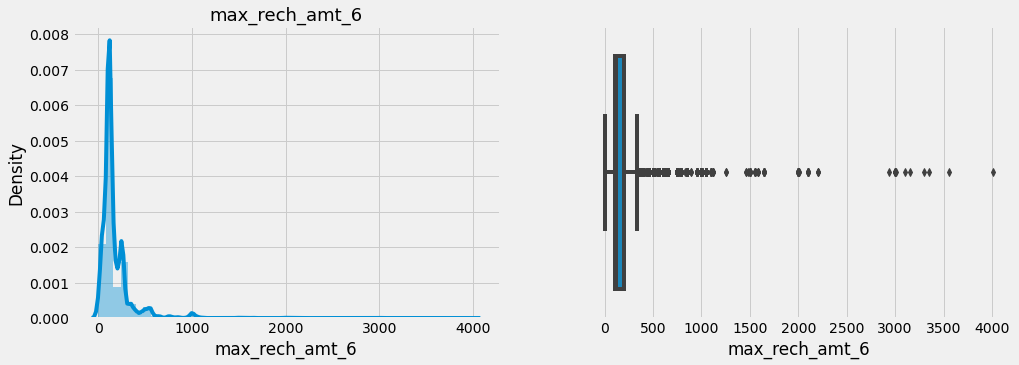

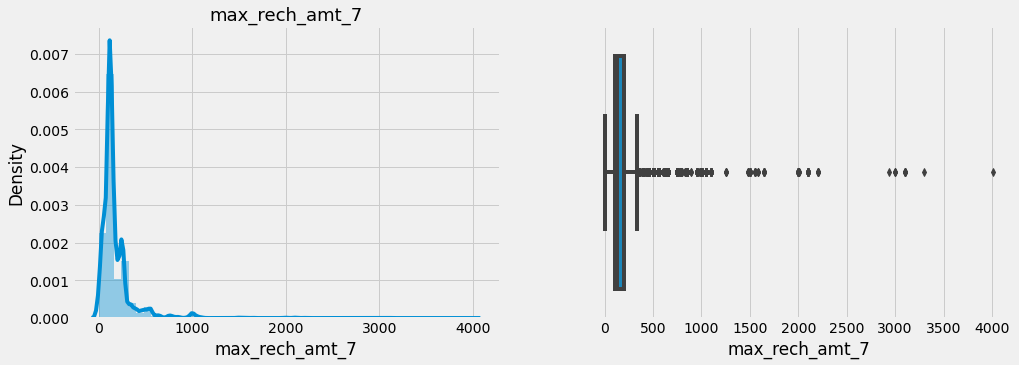

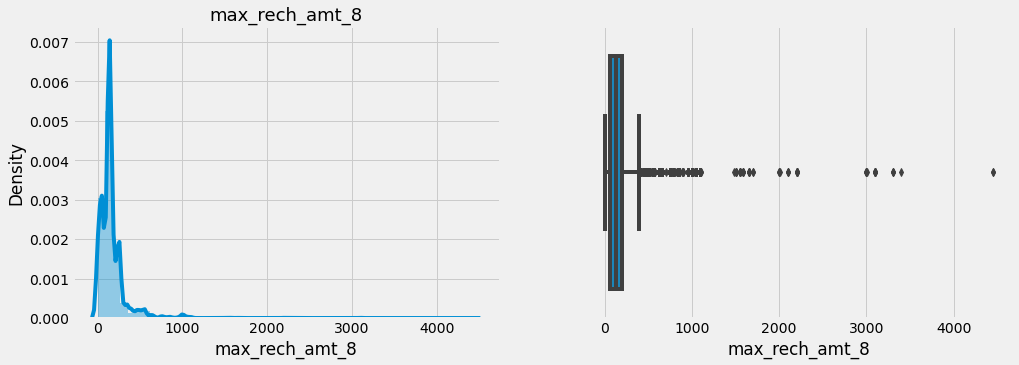

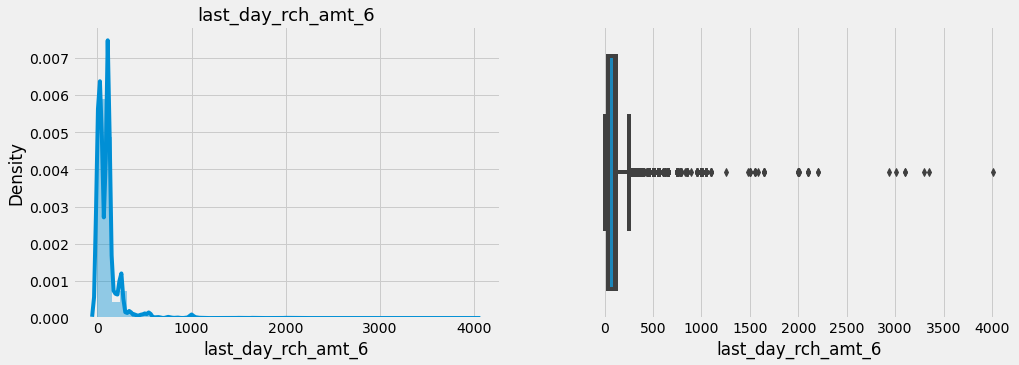

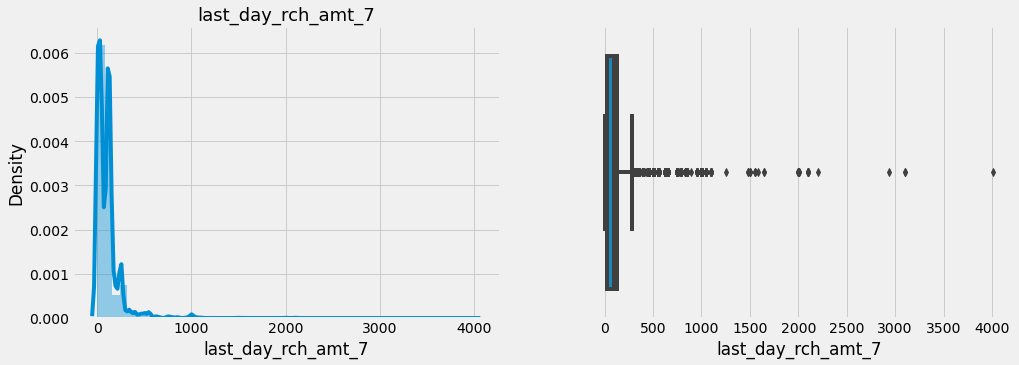

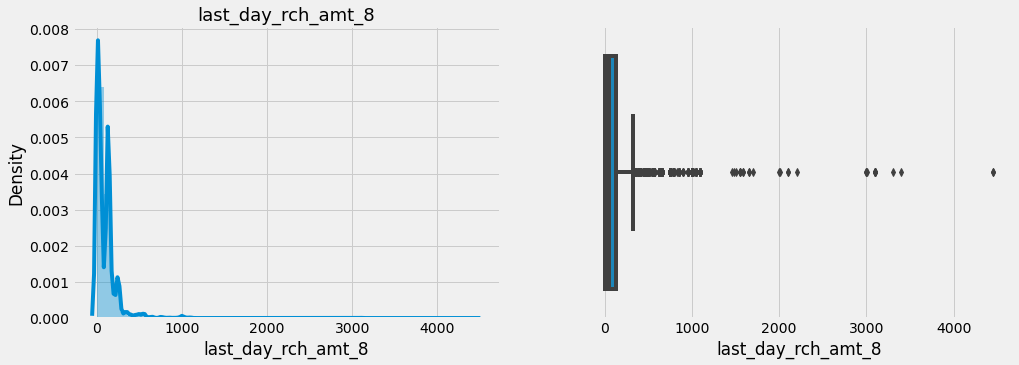

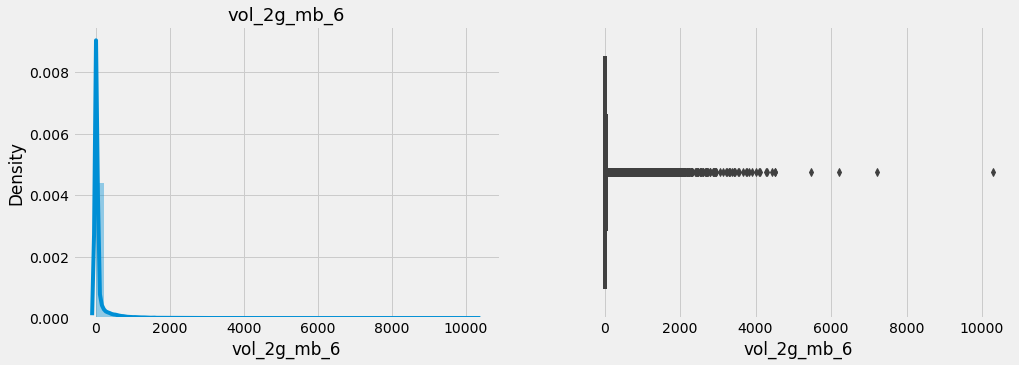

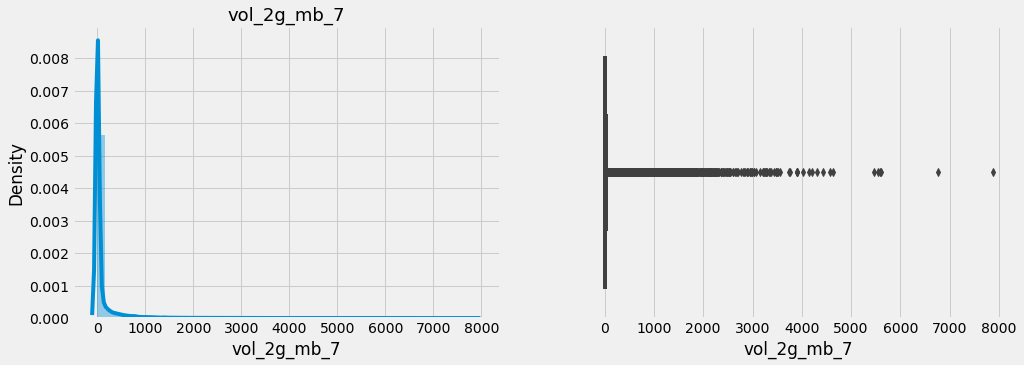

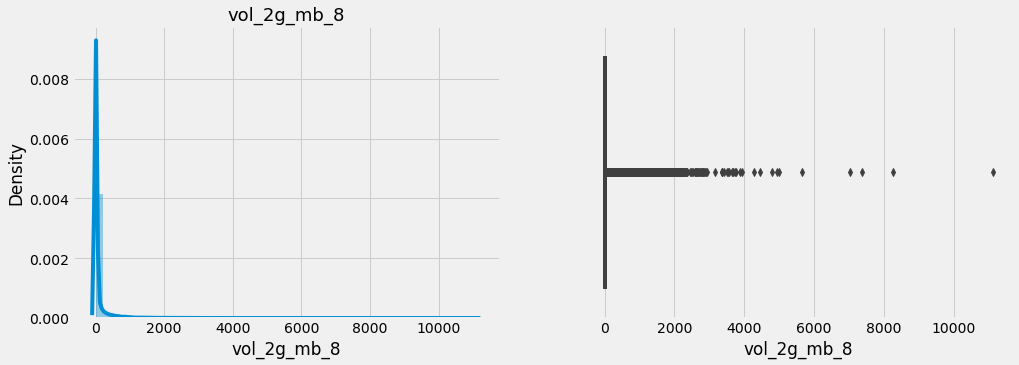

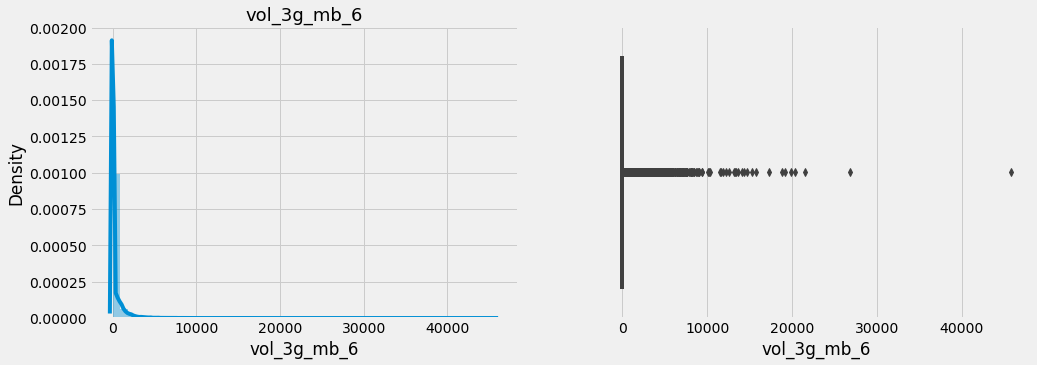

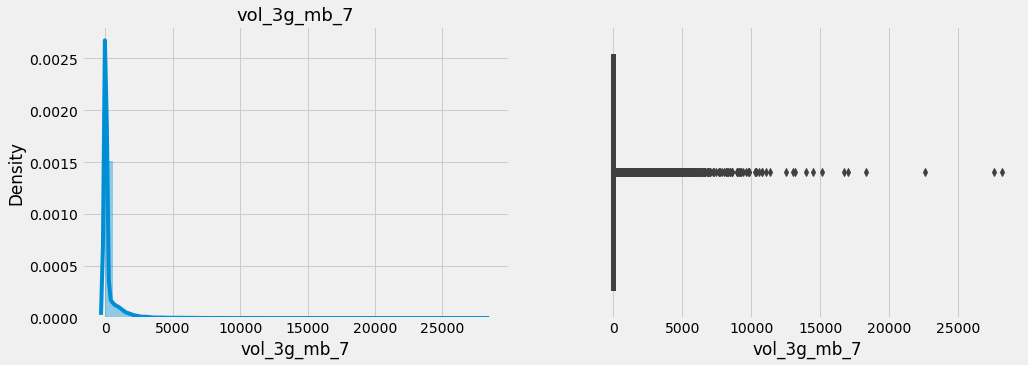

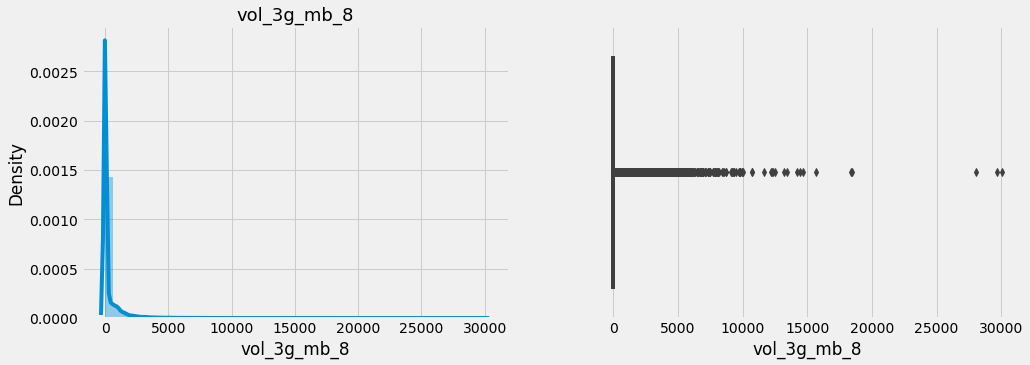

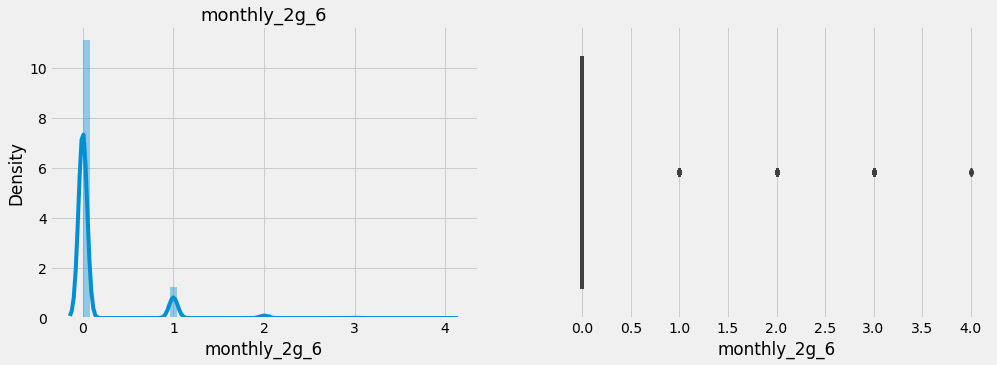

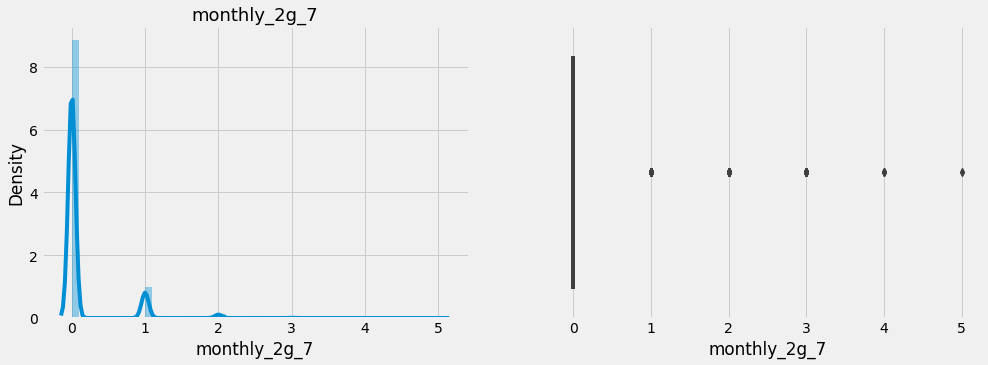

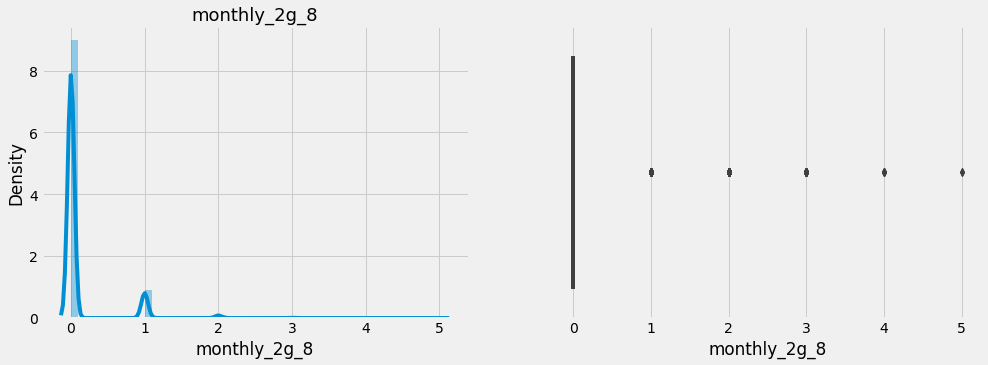

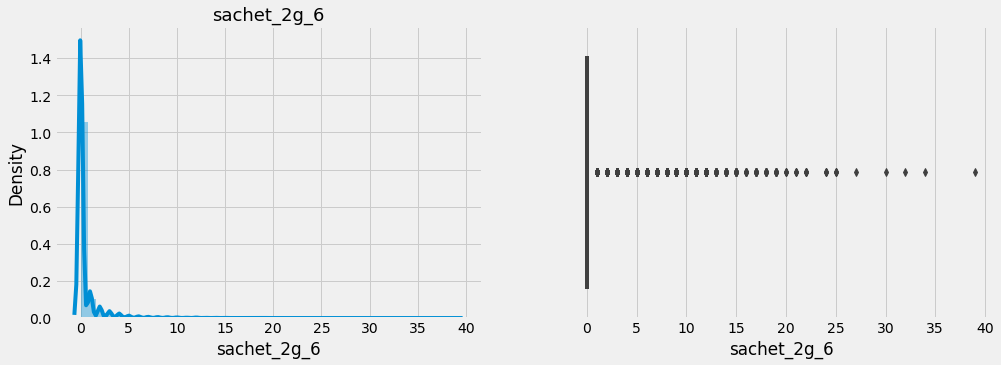

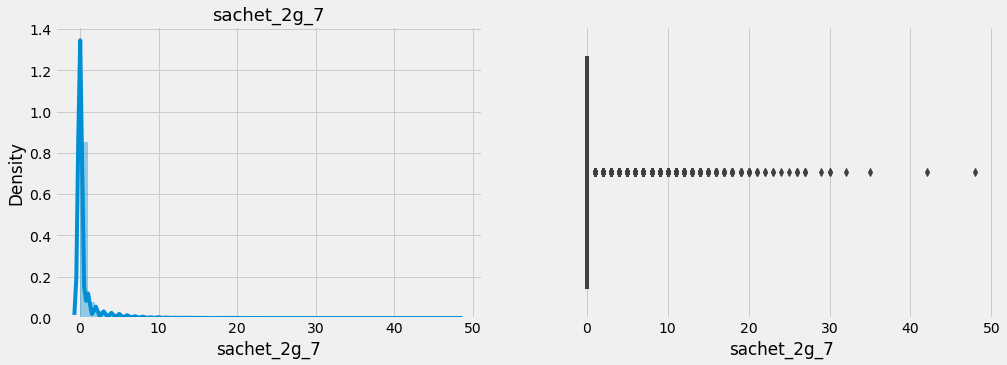

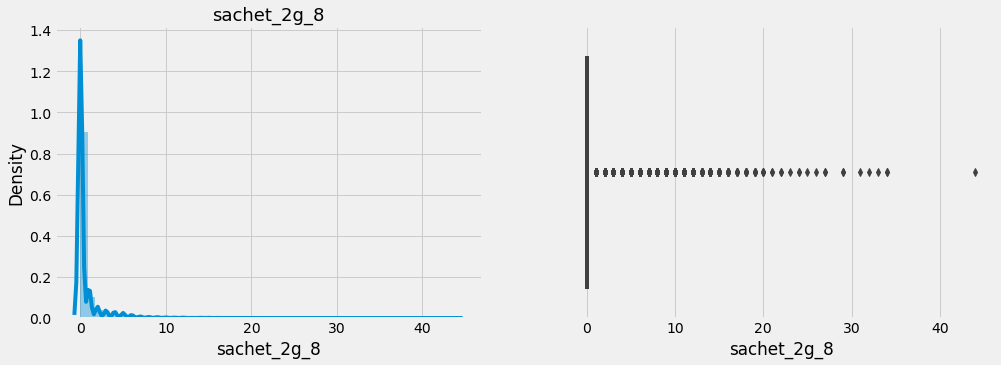

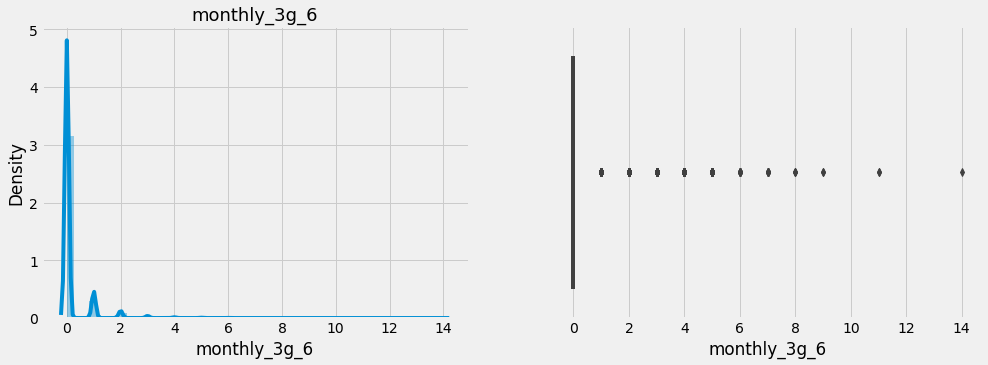

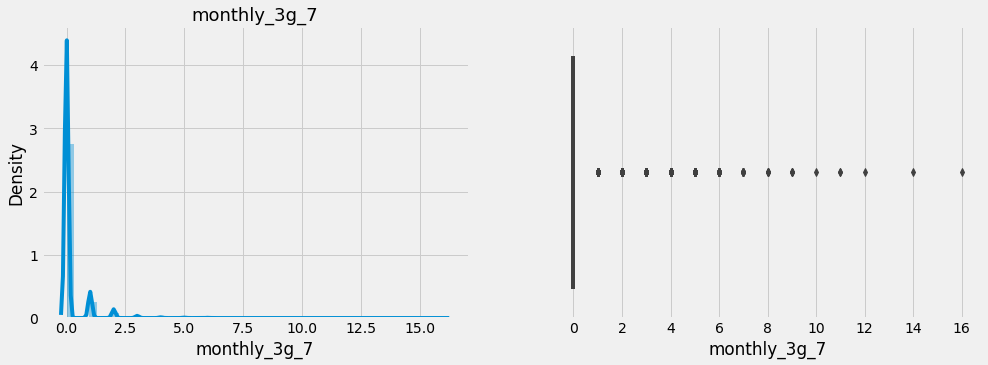

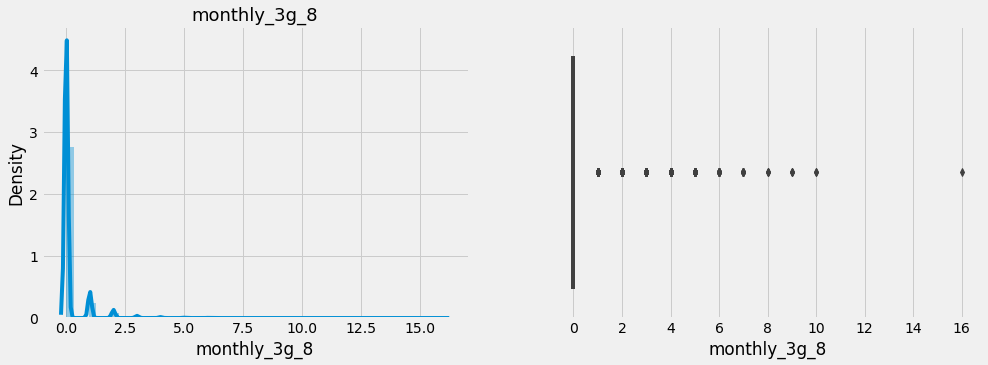

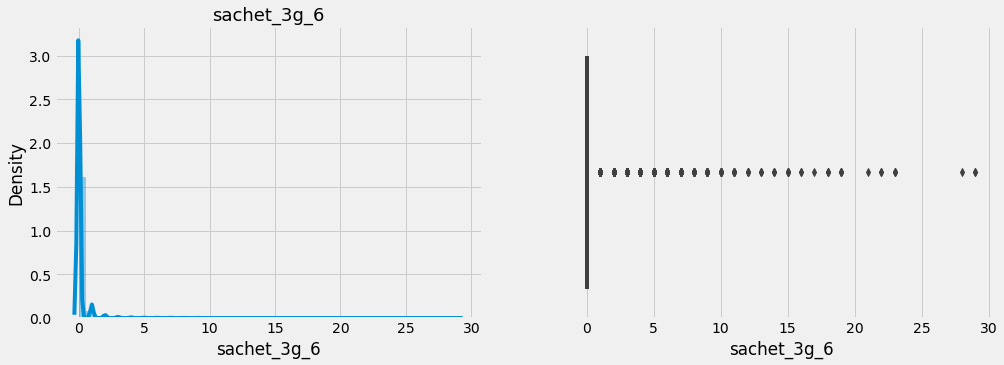

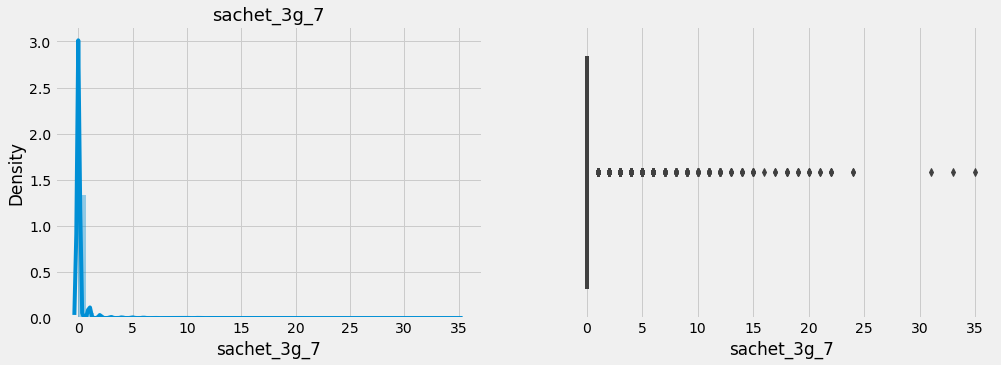

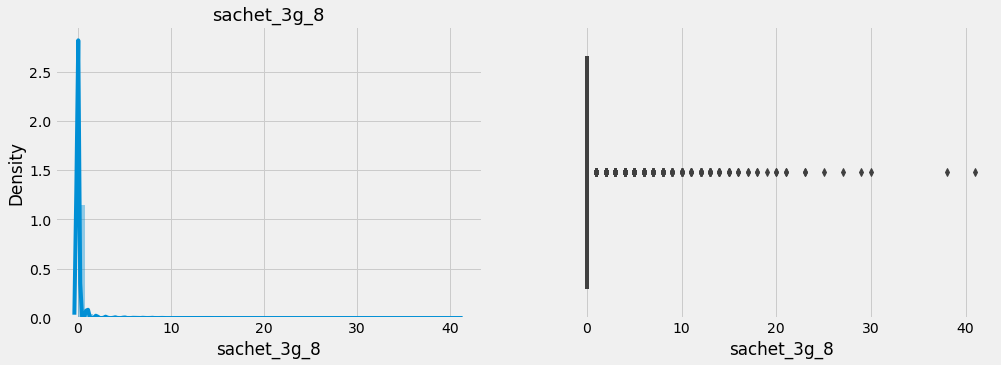

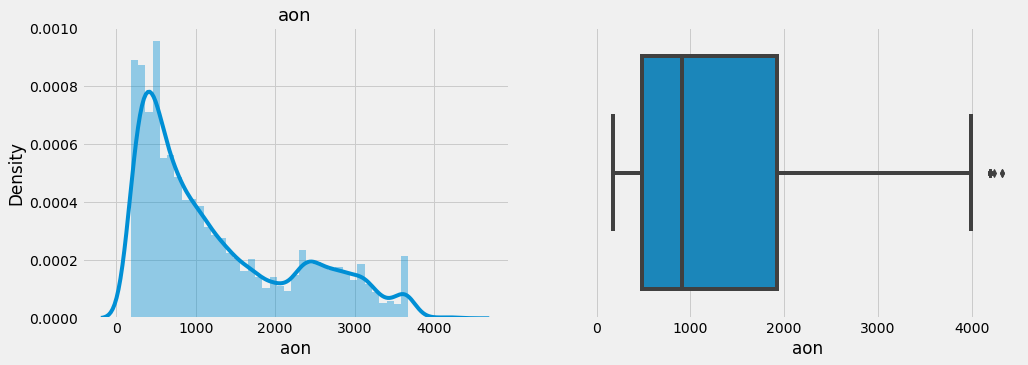

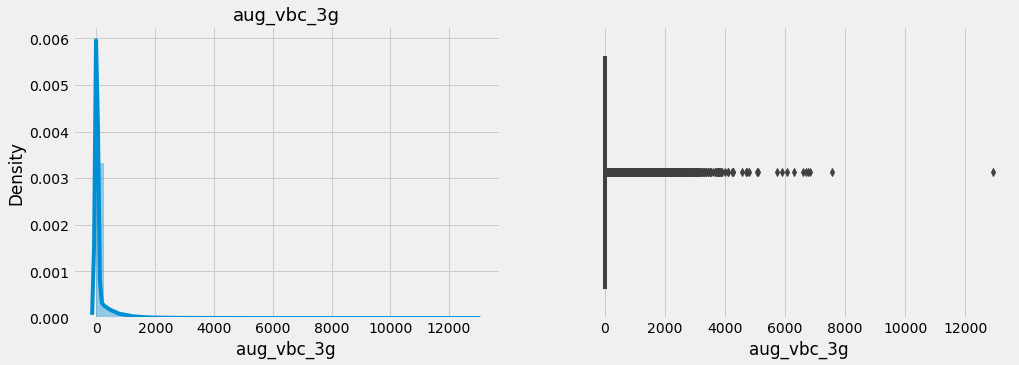

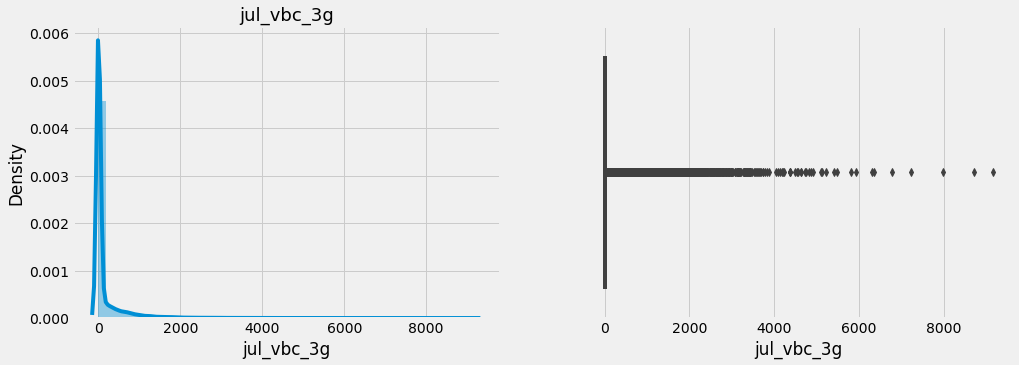

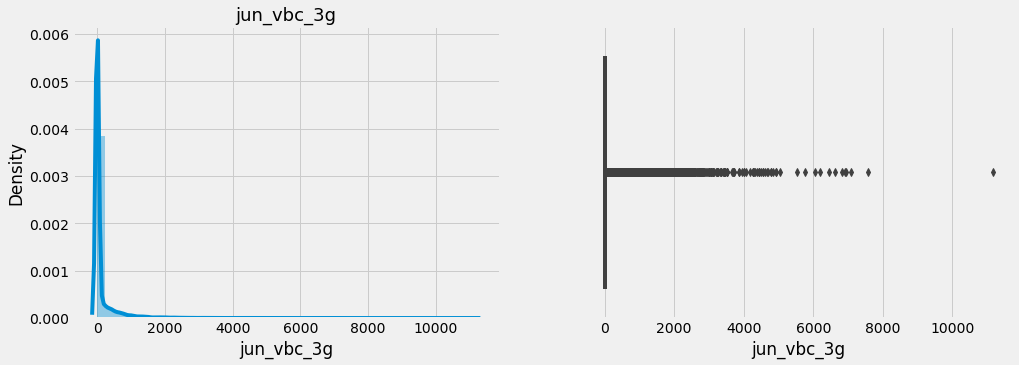

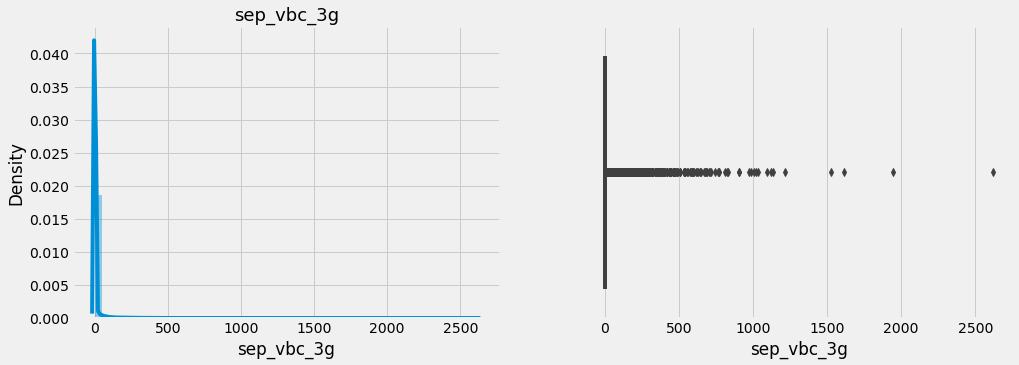

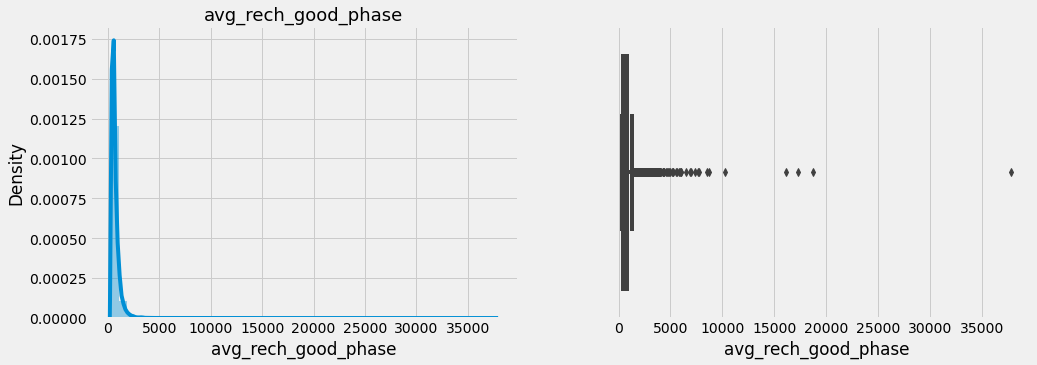

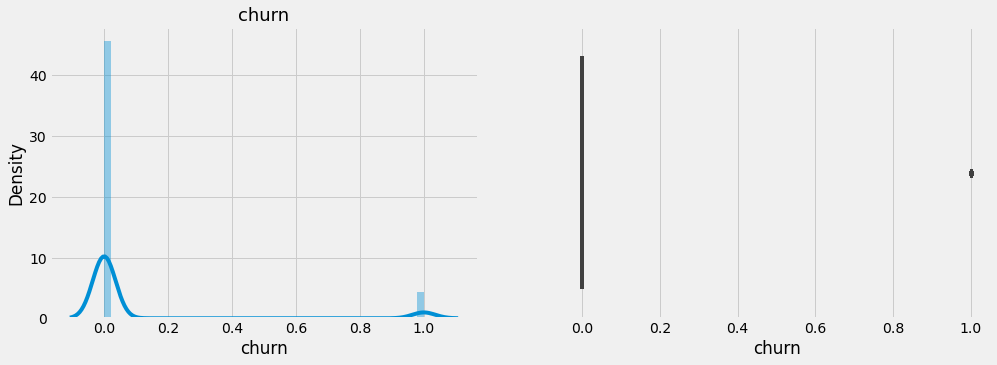

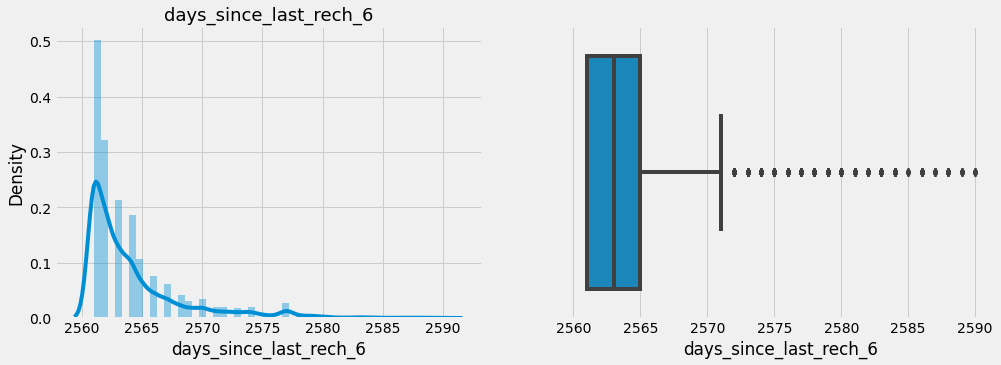

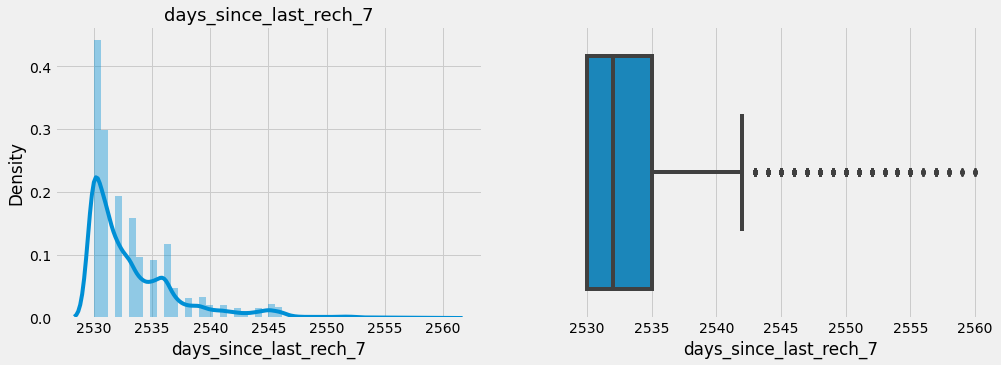

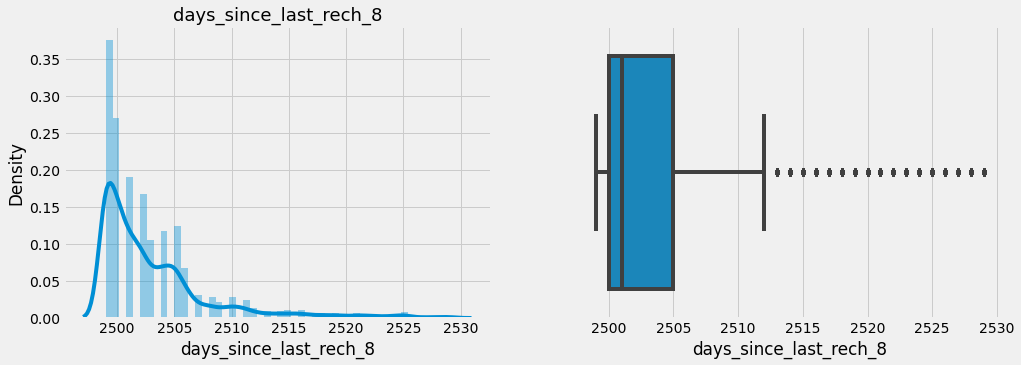

In [41]:
## View the distribution of all variables (except four datetime columns) using histograms and boxplots

for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    # Plot histogram with kde
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    # Plot boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()    

### 📌 So, we see that almost all the numeric features have outliers.So, we will have to do outlier treatment before building models.
### 📌 Some numerical features have skewed distributions.

# 🕑 Bivariate Analysis

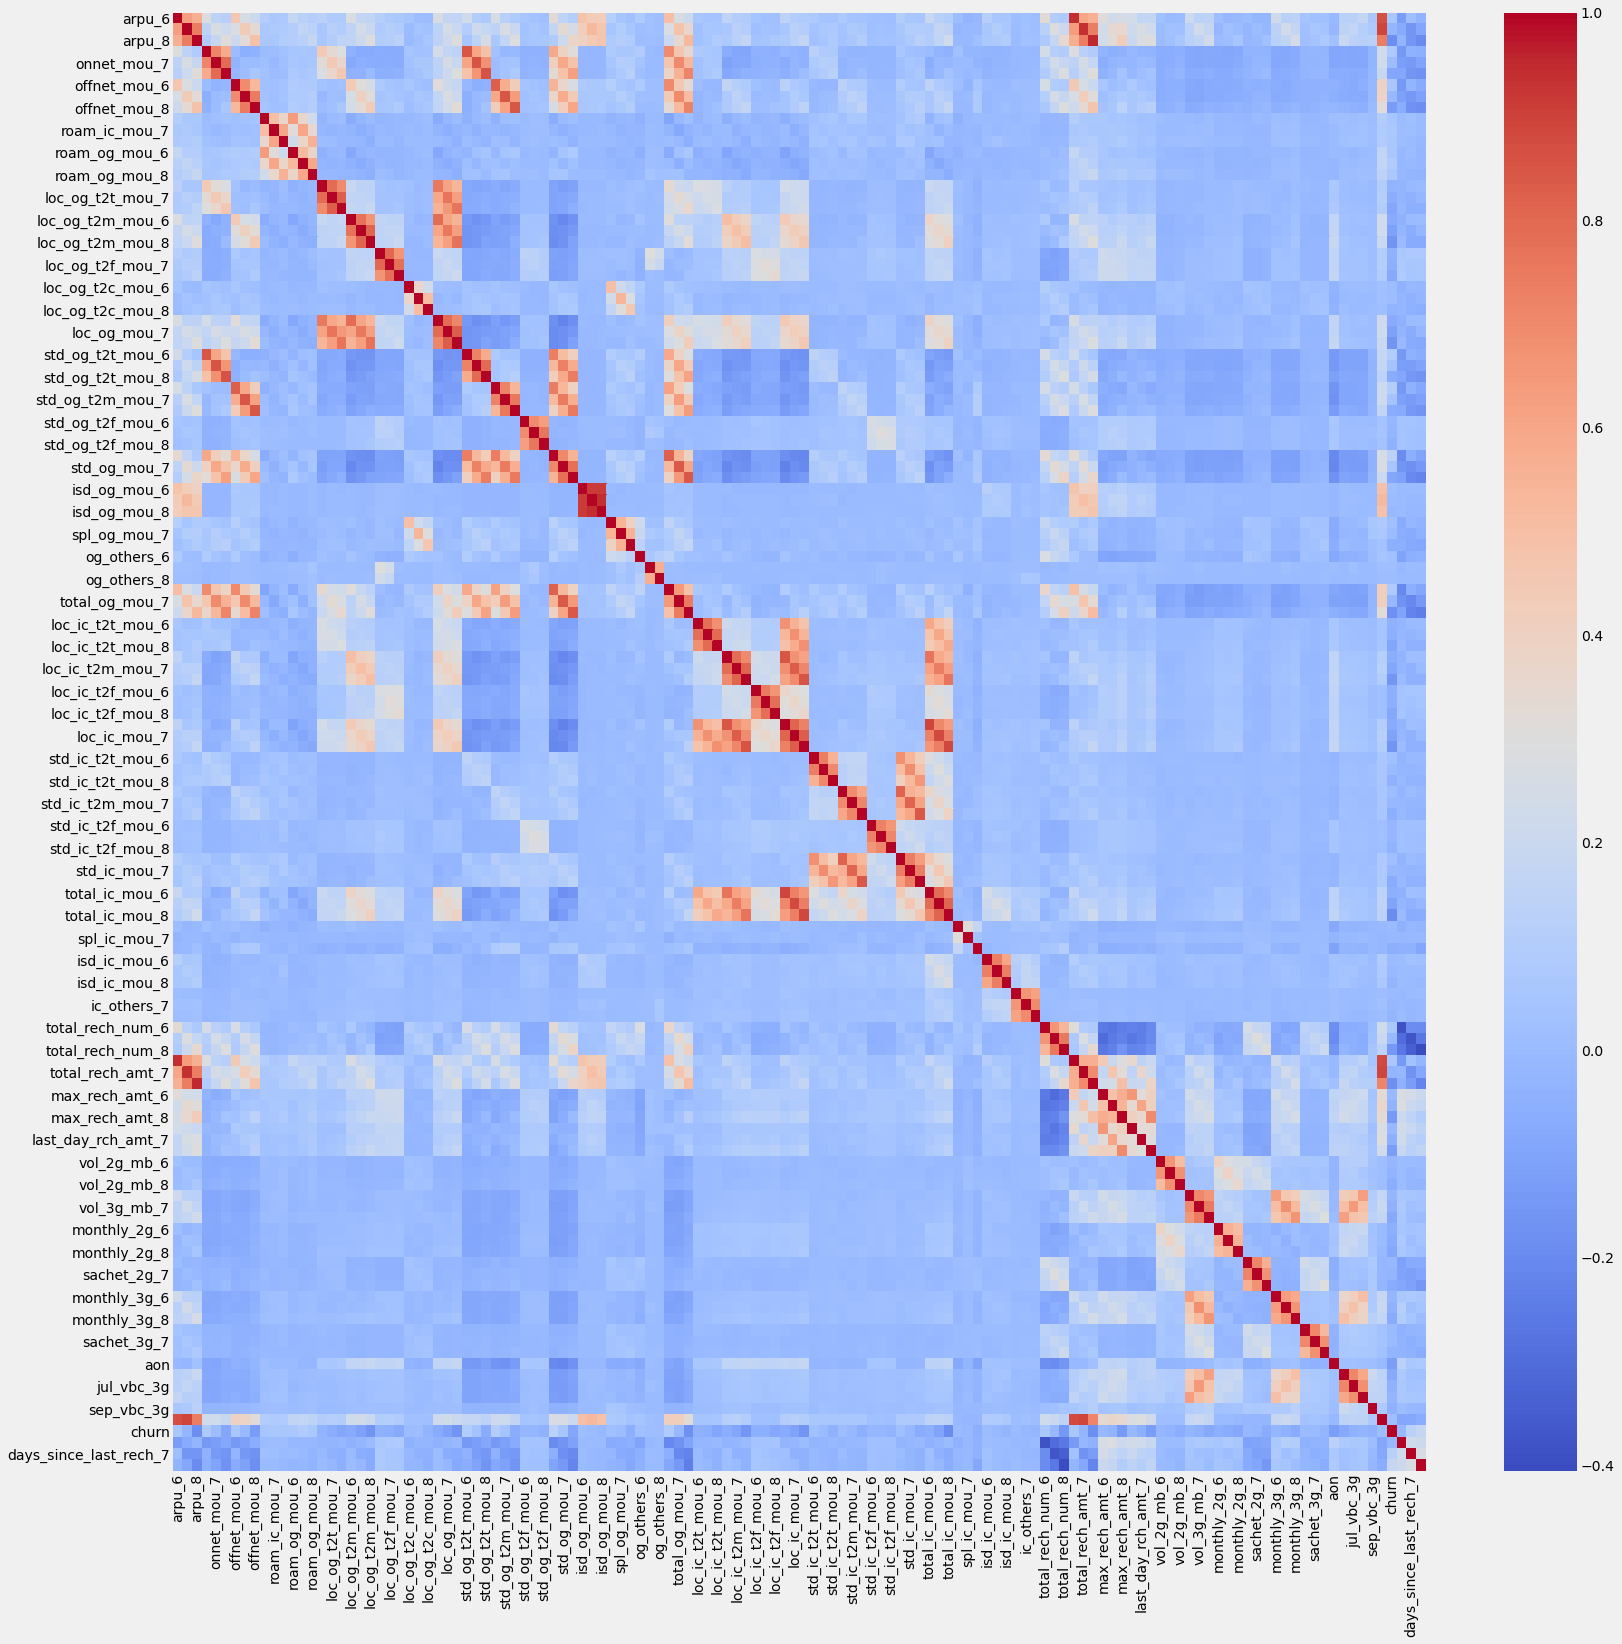

In [42]:
## View the correlations among numerical variables
plt.figure(figsize=(25,25))
sns.heatmap(df_num.corr(), cmap='coolwarm');

### 📌 We observe that there is multicollinearity among the numerical variables. We will have to deal with it while building models.

# <font color=steelblue>💹 Outlier Treatment</fonts>

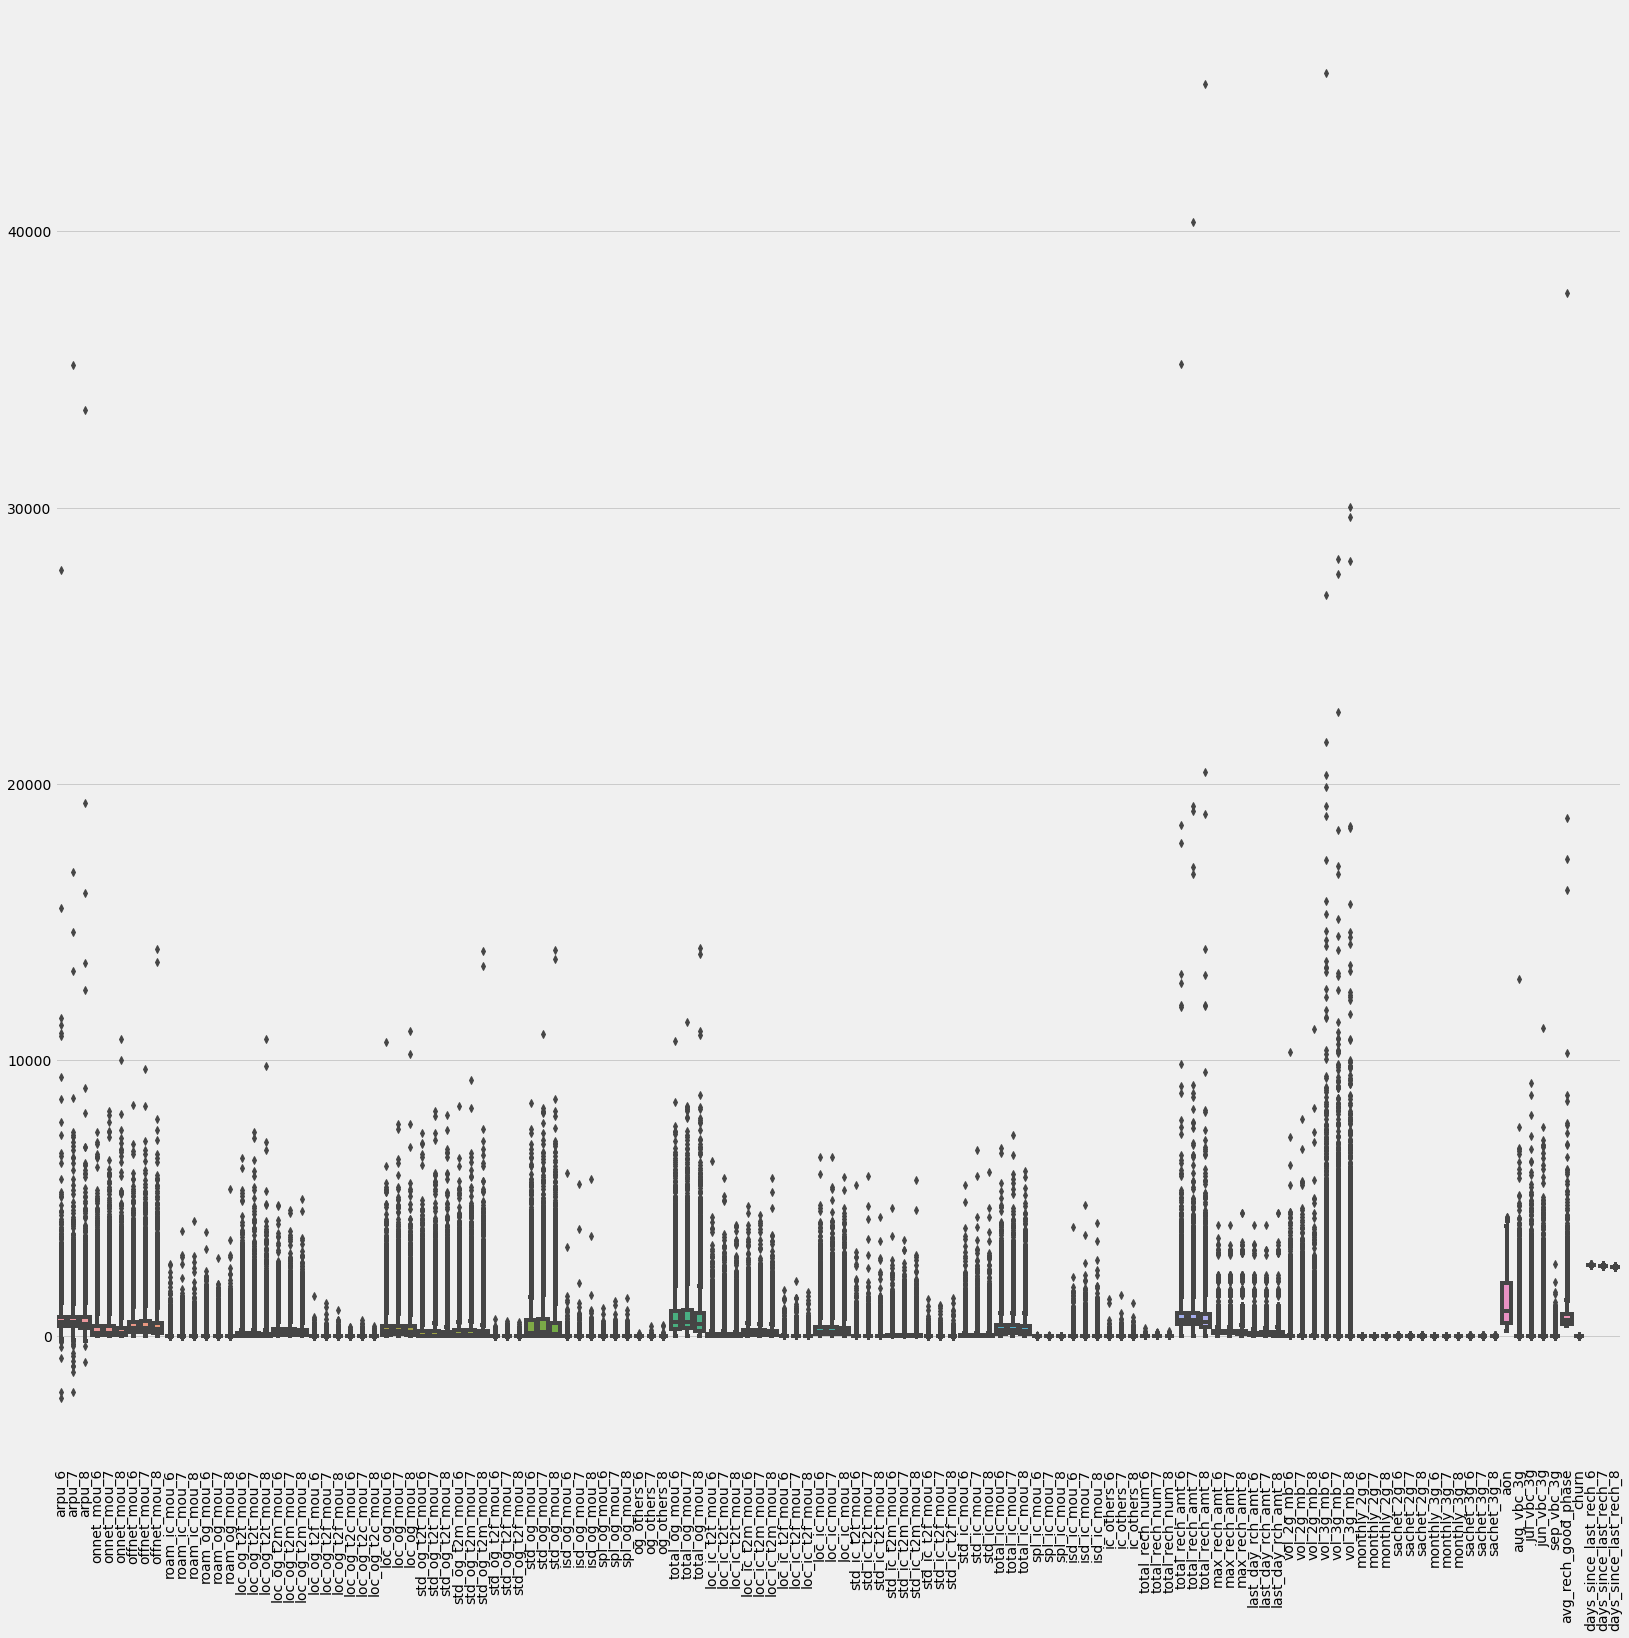

In [43]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[25,25])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [44]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    telecom[col][telecom[col] <= telecom[col].quantile(0.05)] = telecom[col].quantile(0.05)
    telecom[col][telecom[col] >= telecom[col].quantile(0.95)] = telecom[col].quantile(0.95)

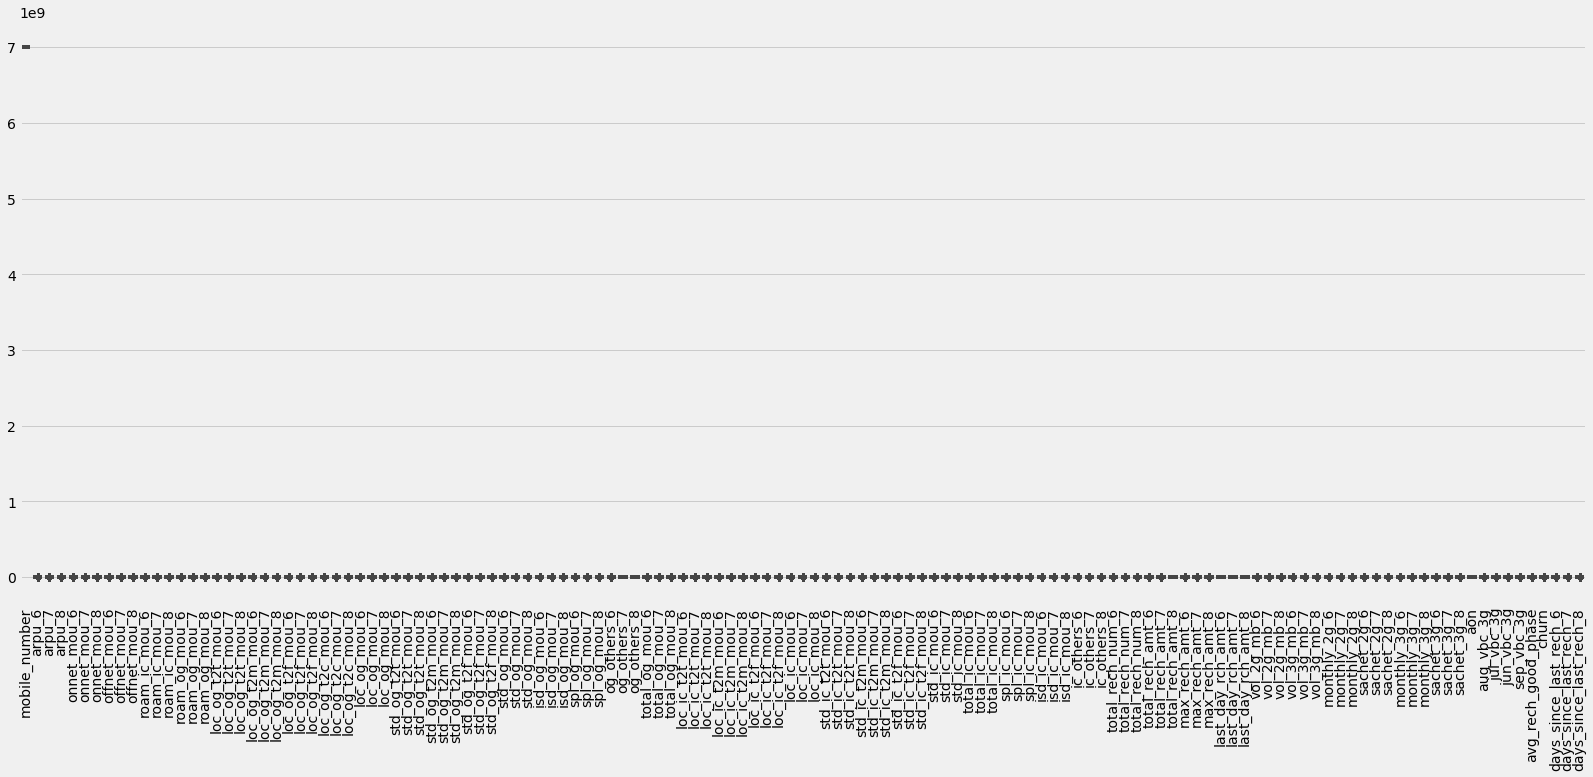

In [45]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[25,10])
plt.xticks(rotation=90)
sns.boxplot(data=telecom);

### 📌 So, we have removed outliers from all numerical columns

# <font color=midnightblue>Step-2:</font>  🏗️ <font color=mediumvioletred>Model Building and Evaluation # 1 : Interpretable Model</font>

### First, we will build a logistic regression model with the objective of identifying important predictor attributes which help the business understand indicators of churn.

# 🔠 Create feature and target variables: X and y

In [46]:
## Create the Feature Variable
X = telecom.drop(['mobile_number', 'churn'], axis=1)
X.head()

arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1261.4215  1258.5555        57.84        54.68        52.29   
8    378.721   492.2230   137.3620       413.69       351.03        35.08   
13   492.846   212.6710   593.2600       501.76       108.39       534.24   
16   430.975   299.8690   187.8940        50.51        74.01        70.61   
17   690.008   212.6710    25.4990      1153.97         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43       567.160        325.91          16.23         33.490   
8          94.66        80.630        136.48           0.00          0.000   
13        413.31       119.280        482.46          23.53         63.335   
16        296.29       229.740        162.76           0.00          2.830   
17         61.64        28.715         10.31           0.00          4.760   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7          31.640          23.74          12.59          38.06   
8           0.000           0.00           0.00           0.00   
13         62.795           7.98          35.26           1.44   
16          0.000           0.00          17.74           0.00   
17          4.810           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28            33.595            34.085   
8              70.58             50.54             0.000             0.000   
13             47.28            294.46             4.540             0.000   
16            145.99            128.28             0.000             4.480   
17              2.16              0.00             0.000             0.000   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              31.31               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79             4.300   
8         378.09        288.18         63.04           116.560   
13        205.31         53.48        353.99           446.410   
16        315.91        215.64        205.93             7.890   
17         97.54          4.82          0.00           986.245   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66              7.92              7.18   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17            

In [47]:
## Create the Target Variable 
y = telecom["churn"]
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

# ✂️Splitting Data into Training and Test Sets

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=42)

In [49]:
## Check the dimensions of train and test data
print(f"Shape of X_train = ({X_train.shape} \nShape of y_train = ({y_train.shape} \nShape of X_test = ({X_test.shape} \nShape of y_test = ({y_test.shape}")

Shape of X_train = ((21007, 129) 
Shape of y_train = ((21007,) 
Shape of X_test = ((9004, 129) 
Shape of y_test = ((9004,)


# 📏 Scaling the data

In [50]:
## Scale the feature variable
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## View snippet of scaled training data and X_test
print(f"X_train (snippet) \n{X_train[:5, :5]} \nX_test (snippet) \n {X_test[:5, :5]}")

X_train (snippet) 
[[ 2.46875565  2.50987986  0.19951993  0.39375453  0.091775  ]
 [-0.749465    1.06664401  0.60631986  1.51212488  2.3886155 ]
 [ 2.45967972 -0.16877451 -0.35194601  2.79538196  2.25681239]
 [-0.60418809 -1.27917855 -1.08142185 -0.45917923 -0.56762968]
 [-0.66350192 -0.30221795 -0.40130811 -0.76067206 -0.77926901]] 
X_test (snippet) 
 [[ 0.45440502  0.46228451  0.59896765 -0.76408957 -0.74646043]
 [-0.59307724 -0.90072089 -0.52892319 -0.77531403 -0.79823273]
 [-0.23285066 -0.81857378  0.66708609 -0.69012726 -0.57622098]
 [ 1.4894478   0.02703165  0.28571885  2.02804257  1.36340706]
 [-0.53688788 -0.19598346 -1.53474784  0.89434048  0.75372414]]


In [51]:
## View types of X_train, X_test, y_train and y_test
print(f"X_train:{type(X_train)} \nX_test:{type(X_test)}  \ny_train:{type(y_train)}  \ny_test:{type(y_test)}")

X_train:<class 'numpy.ndarray'> 
X_test:<class 'numpy.ndarray'>  
y_train:<class 'pandas.core.series.Series'>  
y_test:<class 'pandas.core.series.Series'>


In [52]:
## Convert X_train and X_test from numpy array to pandas dataframe
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [53]:
## View types of X_train and X_test again
print(f"X_train:{type(X_train)} \nX_test:{type(X_test)}")

X_train:<class 'pandas.core.frame.DataFrame'> 
X_test:<class 'pandas.core.frame.DataFrame'>


# <font color=steelblue>📉 Dimensionality Reduction (using RFE)</fonts>

In [54]:
## Instantiate a Logistic Regression Model
#######################################################################################
## Here, we set parameter class_weight to 'balanced' in order to HANDLE CLASS IMBALANCE
#######################################################################################

logreg = LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced')

In [55]:
## Run RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15, verbose=1, step=5)             
rfe = rfe.fit(X_train, y_train)

Fitting estimator with 129 features.
Fitting estimator with 124 features.
Fitting estimator with 119 features.
Fitting estimator with 114 features.
Fitting estimator with 109 features.
Fitting estimator with 104 features.
Fitting estimator with 99 features.
Fitting estimator with 94 features.
Fitting estimator with 89 features.
Fitting estimator with 84 features.
Fitting estimator with 79 features.
Fitting estimator with 74 features.
Fitting estimator with 69 features.
Fitting estimator with 64 features.
Fitting estimator with 59 features.
Fitting estimator with 54 features.
Fitting estimator with 49 features.
Fitting estimator with 44 features.
Fitting estimator with 39 features.
Fitting estimator with 34 features.
Fitting estimator with 29 features.
Fitting estimator with 24 features.
Fitting estimator with 19 features.


In [56]:
## List out the 15 features selected by RFE
temp = pd.Series(rfe.support_,index = X.columns)
selected_features_rfe = list(temp[temp==True].index)
print(selected_features_rfe)

['arpu_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'sep_vbc_3g', 'days_since_last_rech_8']


In [57]:
## Keep only these 15 features in X_train and X_test
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]

# ♊ Handling Multicollinearity

In [58]:
## Creating a helper function in which we create a dataframe that will contain names  
## of all feature variables and their respective VIFs

def show_vifs(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return

In [59]:
## Display the VIF values of all variables of X_train_rfe
show_vifs(X_train_rfe)

                  Features    VIF
3             loc_og_mou_8  31.54
9             loc_ic_mou_8  22.59
6           total_og_mou_8  19.81
5             std_og_mou_8  17.89
2         loc_og_t2m_mou_8  12.03
8         loc_ic_t2m_mou_8  11.65
1         loc_og_t2t_mou_8   6.42
10          total_ic_mou_8   6.04
7         loc_ic_t2t_mou_8   4.69
4         std_og_t2t_mou_8   2.41
0                   arpu_7   1.38
12             vol_3g_mb_8   1.21
11      last_day_rch_amt_8   1.20
14  days_since_last_rech_8   1.16
13              sep_vbc_3g   1.10


In [60]:
## Drop the variable with highest VIF : 'loc_og_mou_8'
X_train_rfe.drop('loc_og_mou_8', axis=1, inplace=True)

## View VIF values again
show_vifs(X_train_rfe)

                  Features    VIF
8             loc_ic_mou_8  22.07
5           total_og_mou_8  12.44
4             std_og_mou_8  11.90
7         loc_ic_t2m_mou_8  11.34
9           total_ic_mou_8   6.04
6         loc_ic_t2t_mou_8   4.58
2         loc_og_t2m_mou_8   3.69
1         loc_og_t2t_mou_8   3.04
3         std_og_t2t_mou_8   2.41
0                   arpu_7   1.38
11             vol_3g_mb_8   1.21
10      last_day_rch_amt_8   1.20
13  days_since_last_rech_8   1.16
12              sep_vbc_3g   1.10


In [61]:
## Drop the variable with highest VIF : 'loc_ic_mou_8'
X_train_rfe.drop('loc_ic_mou_8', axis=1, inplace=True)

## View VIF values again
show_vifs(X_train_rfe)

                  Features    VIF
5           total_og_mou_8  12.37
4             std_og_mou_8  11.74
8           total_ic_mou_8   4.65
7         loc_ic_t2m_mou_8   4.32
2         loc_og_t2m_mou_8   3.67
1         loc_og_t2t_mou_8   3.03
6         loc_ic_t2t_mou_8   2.67
3         std_og_t2t_mou_8   2.41
0                   arpu_7   1.38
10             vol_3g_mb_8   1.21
9       last_day_rch_amt_8   1.20
12  days_since_last_rech_8   1.16
11              sep_vbc_3g   1.10


In [62]:
## Drop the variable with highest VIF : 'total_og_mou_8'
X_train_rfe.drop('total_og_mou_8', axis=1, inplace=True)

## View VIF values again
show_vifs(X_train_rfe)

                  Features   VIF
7           total_ic_mou_8  4.63
6         loc_ic_t2m_mou_8  4.31
4             std_og_mou_8  2.80
5         loc_ic_t2t_mou_8  2.64
3         std_og_t2t_mou_8  2.41
2         loc_og_t2m_mou_8  2.25
1         loc_og_t2t_mou_8  1.99
0                   arpu_7  1.35
9              vol_3g_mb_8  1.21
8       last_day_rch_amt_8  1.20
11  days_since_last_rech_8  1.15
10              sep_vbc_3g  1.10


### 📌 Now, all the variables left have VIF values below 5. So, we don't need to drop any more features. 

In [63]:
## We will also drop the above variables from X_test_rfe
X_test_rfe.drop(['loc_og_mou_8', 'loc_ic_mou_8', 'total_og_mou_8'], axis=1, inplace=True)

# <font color=steelblue>🧰 Model Building</fonts>

### Choosing the evaluation metric
📌 Since in our model, it is more important to identify churners than non-churners:
   - it is important for us to correctly identify positives (churners) that are actual postives i.e. `TP should be high`. 
   - it is important that we do not identify a positive(churner) as negative(non-churner) i.e. `FN should be low`.  
   
📌 So, here we will select **Recall (or Sensitivity)** as our evluation metric which is given by 
###               $Recall = \frac{TP}{TP + FN}$

In [64]:
## Build a baseline logistic regression model with only 15 features selected by RFE
logreg_rfe_baseline = LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced')

In [65]:
## Train the Logistic Regression model on training data containing 15 selected features
logreg_rfe_baseline.fit(X_train_rfe, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42)

In [66]:
## Make predictions on the test data
y_pred = logreg_rfe_baseline.predict(X_test_rfe)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [67]:
## View predicted probabilities
preds = logreg_rfe_baseline.predict_proba(X_test_rfe)
preds

array([[0.98148676, 0.01851324],
       [0.44046784, 0.55953216],
       [0.79842262, 0.20157738],
       ...,
       [0.99282896, 0.00717104],
       [0.99086156, 0.00913844],
       [0.01827943, 0.98172057]])

[[6670 1556]
 [ 105  673]]


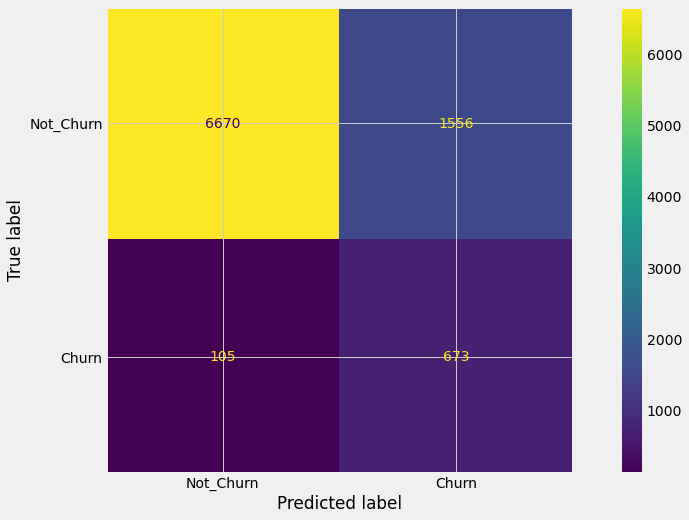

In [68]:
## View the confusion matrix
print(confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(logreg_rfe_baseline, X_test_rfe, y_test, display_labels=['Not_Churn', 'Churn'], ax=ax);

In [69]:
## View the recall score
recall_rfe_baseline = recall_score(y_test, y_pred)
recall_rfe_baseline = round(recall_rfe_baseline, 2)
recall_rfe_baseline

0.87

### 📌 The Recall score we are getting in this model is fairly high. We can try some hyperparameter tuning to improve it.

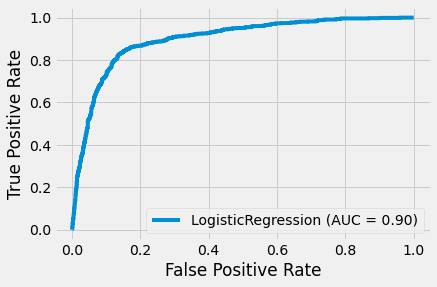

In [70]:
## Plot the ROC curve for our model
plot_roc_curve(logreg_rfe_baseline, X_test_rfe, y_test, drop_intermediate=True);

### 📌 We get a good ROC curve with Area under curve (AUC) = 0.9

# <font color=steelblue>🔧 Hyperparameter Tuning</fonts>

In [71]:
## Define a parameter dictionary
params = {
    'penalty': ['l1', 'l2','elasticnet', 'none'],
    'C': [0.001,0.01,0.1,1,10,100],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [72]:
## Search from 5 folds for the best parameters from dictionary above
grid_search = GridSearchCV(estimator=logreg_rfe_baseline,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="recall")

In [73]:
## Fit the search on training data
grid_search.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   19.8s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1,
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall', verbose=1)

In [74]:
## View the best recall score
grid_search.best_score_

0.9090909090909092

In [75]:
## View the best estimator hyperparameter values
grid_search.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

### 📌 We see that we can improve our `Recall` score from 0.87 to 0.90 by using the above values of hyperparamters. So, now we build a logistic regresion model using these values of hyperparameters.

In [76]:
## Instantiate a Logistic Regression Model using tuned hyperparameters
logreg_rfe_tuned = LogisticRegression(penalty='l1',
                                      C=0.001,
                                      class_weight='balanced',
                                      random_state=42, 
                                      solver='liblinear',
                                      n_jobs=-1,
                                      verbose=1)

In [77]:
## Train the tuned Logistic Regression model with 15 selected features
logreg_rfe_tuned.fit(X_train_rfe, y_train)

[LibLinear]

LogisticRegression(C=0.001, class_weight='balanced', n_jobs=-1, penalty='l1',
                   random_state=42, solver='liblinear', verbose=1)

# <font color=steelblue>🎯 Model Evaluation</fonts>

In [78]:
## Make predictions on the test data
y_pred = logreg_rfe_tuned.predict(X_test_rfe)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [79]:
## View predicted probabilities
preds = logreg_rfe_tuned.predict_proba(X_test_rfe)
preds

array([[0.83341341, 0.16658659],
       [0.35022166, 0.64977834],
       [0.56516493, 0.43483507],
       ...,
       [0.87443341, 0.12556659],
       [0.86410869, 0.13589131],
       [0.13931287, 0.86068713]])

[[5194 3032]
 [  69  709]]


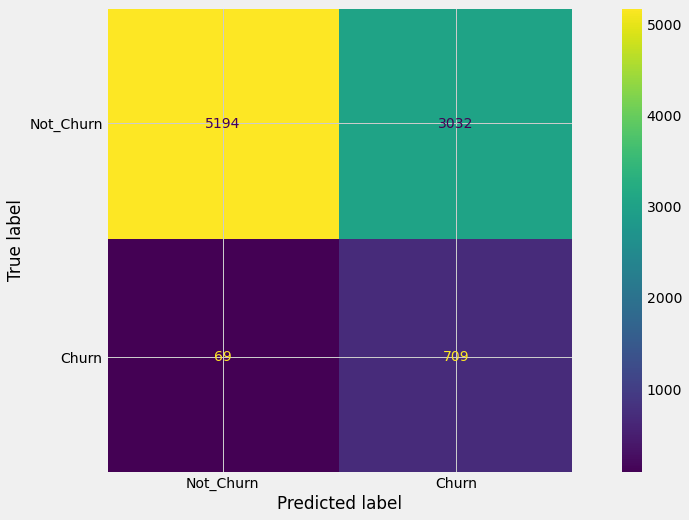

In [80]:
## View the confusion matrix
print(confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(logreg_rfe_tuned, X_test_rfe, y_test, display_labels=['Not_Churn', 'Churn'], ax=ax);

In [81]:
## View the recall score
recall_rfe_tuned = recall_score(y_test, y_pred)
recall_rfe_tuned = round(recall_rfe_tuned, 2)
recall_rfe_tuned

0.91

### 📌 The Recall score of our logistic regression model has improved from `0.87` to `0.91` by using the tuned hyperparameters

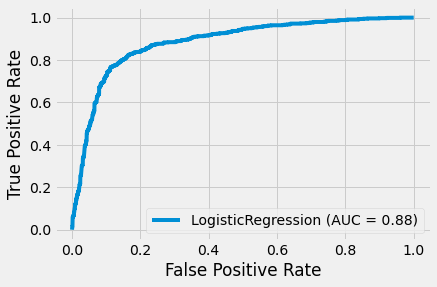

In [82]:
## Plot the ROC curve for our model
plot_roc_curve(logreg_rfe_tuned, X_test_rfe, y_test, drop_intermediate=True);

# <font color=steelblue>🔍 Identifying Important Churn Predictors</fonts>

In [83]:
## Create a dataframe of important features in their descending order of absolute importance in prediction
feature_importance=pd.DataFrame({'feature':list(X_train_rfe.columns), 'feature_importance':[i for i in logreg_rfe_tuned.coef_[0]]  ,'feature_importance_absolute':[abs(i) for i in logreg_rfe_tuned.coef_[0]]})
feature_importance.sort_values('feature_importance_absolute',ascending=False, inplace=True)
feature_importance

feature  feature_importance  feature_importance_absolute
7           total_ic_mou_8           -0.539226                     0.539226
8       last_day_rch_amt_8           -0.396538                     0.396538
11  days_since_last_rech_8            0.334963                     0.334963
2         loc_og_t2m_mou_8           -0.158901                     0.158901
9              vol_3g_mb_8           -0.051740                     0.051740
1         loc_og_t2t_mou_8           -0.031717                     0.031717
4             std_og_mou_8           -0.028425                     0.028425
0                   arpu_7            0.000000                     0.000000
3         std_og_t2t_mou_8            0.000000                     0.000000
5         loc_ic_t2t_mou_8            0.000000                     0.000000
6         loc_ic_t2m_mou_8            0.000000                     0.000000
10              sep_vbc_3g            0.000000                     0.000000

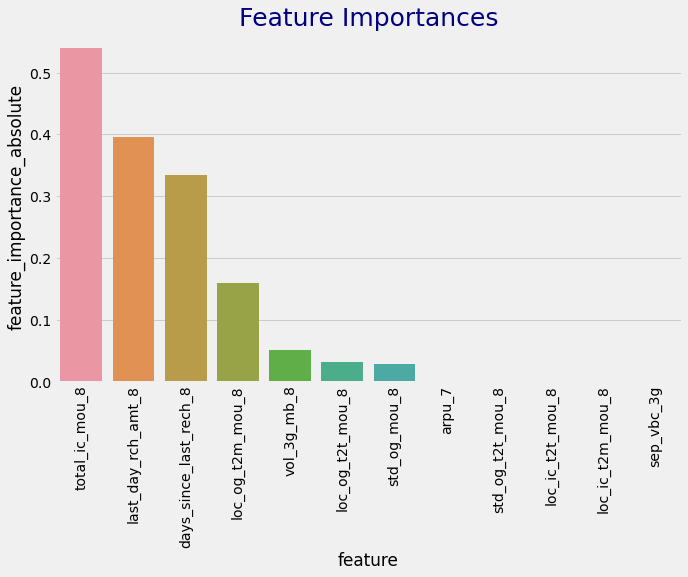

In [84]:
## Visualize the features and their importance
plt.figure(figsize=(10,6))
plt.title("Feature Importances", fontdict={'fontsize':25, 'color':'navy'})
sns.barplot(x='feature', y='feature_importance_absolute', data=feature_importance)
plt.xticks(rotation=90);

# <font color=steelblue>📊 Business Recommendations</fonts>

### 📌 The important predictor attributes which help the business understand indicators of churn are:-

1. **`total_ic_mou_8`**: If a customer's total incoming voice call usage drops in the month of August, then the customer is highly likely to churn.


2. **`last_day_rch_amt_8`**: If a customer's last recharge amount reduces in August, then the probability of that customer getting churned increases.


3. **`days_since_last_rech_8`**: The more the number of days past since last recharge in August, the more the chances of that customer being churned.


4. **`loc_og_t2m_mou_8`**: If a customer's local outgoing calls (minutes of usage) in August within same telecom circle as well as to other mobile operator decrease, then chances of churn increase.


5. **`vol_3g_mb_8`**: If a customer's 3G internet usage for the month of August decreases, then he or she is likely to churn.


6. **`loc_og_t2t_mou_8`**: If a customer's local outgoing calls (minutes of usage) in August within same operator decrease, then chances of churn increase.


7. **`std_og_mou_8`**: If a customer's std outgoing calls (minutes of usage) in August decrease, then the chances of churn increase.


###  📌 To prevent the churner from leaving their company, the telecom company may adopt one or more of the following strategies:-


- **`Network Connectivity`** - Checking the network connectivity of the geography and improving if necessary may resolve the issue of less number of incoming voice calls and usage of 3G internet resulting in less churn. Improving call drop issues.

 

- **`Offers on Recharge`** - Giving extra talktime and/or additional internet data on same recharge amount.

 

- **`Discounts on Recharge amount`** - If the number of days past since last recharge in August are high, those customers will be attracted and might go for recharge from other telecom company. They could be given attractive discounts on recharge to prevent them from churning.

 

- **`Doubling the 3G usage limit`** per day for free may reduce the churn and attract new customers.

 

- **`Local & STD Outgoing calls`** within the same operator should be made free to reduce churn and increase more business.

### 📌 Now we create a summary table for comparing this model and all the models we will build from now onwards

In [85]:
## Creating a dataframe to keep track of all models built and their Recall scores
summary = pd.DataFrame([{'Model': 'Logistic Regression (with RFE)','Recall Score (Baseline)': recall_rfe_baseline, 'Recall Score (Tuned)': recall_rfe_tuned}])
summary

Model  Recall Score (Baseline)  \
0  Logistic Regression (with RFE)                     0.87   

   Recall Score (Tuned)  
0                  0.91

# <font color=midnightblue>Step-3:</font>  🚀 <font color=mediumvioletred>Model Building and Evaluation # 2 : High Performance Model</font>

# <font color=steelblue>💠 Dimensionality Reduction (using PCA)</fonts>

In [86]:
## Create a PCA object (for retaining components that explain 95% of the variance)
pca95 = PCA(n_components=0.95, random_state=42)

## Fit the data
pca95.fit(X_train)

## Get PCA coordinates for scaled_data
X_train_pca = pca95.transform(X_train) 

## Also transform test data
X_test_pca = pca95.transform(X_test)

In [87]:
## View the features before and after transformation
print(f"Original number of features: {X_train.shape[1]} \nReduced number of features: {X_train_pca.shape[1]}")

Original number of features: 129 
Reduced number of features: 72


### 📌 So, we have reduced our features from 129 to 72. These 72 Principal Components explain 95% of variance in our data.

In [88]:
## View the explained variance ratio of all 72 components

per_var = np.round(pca95.explained_variance_ratio_* 100, 1)

## Create labels for ease of understanding the Principal Components
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

per_var

array([13.3,  9.9,  6.2,  4.8,  4.2,  3.7,  3.1,  2.8,  2.6,  2.3,  2.1,
        1.9,  1.9,  1.7,  1.5,  1.5,  1.4,  1.3,  1.2,  1.1,  1.1,  1. ,
        0.9,  0.8,  0.8,  0.8,  0.8,  0.8,  0.7,  0.7,  0.7,  0.7,  0.7,
        0.7,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,
        0.4,  0.4,  0.4,  0.4,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.2,  0.2,  0.2,  0.2])

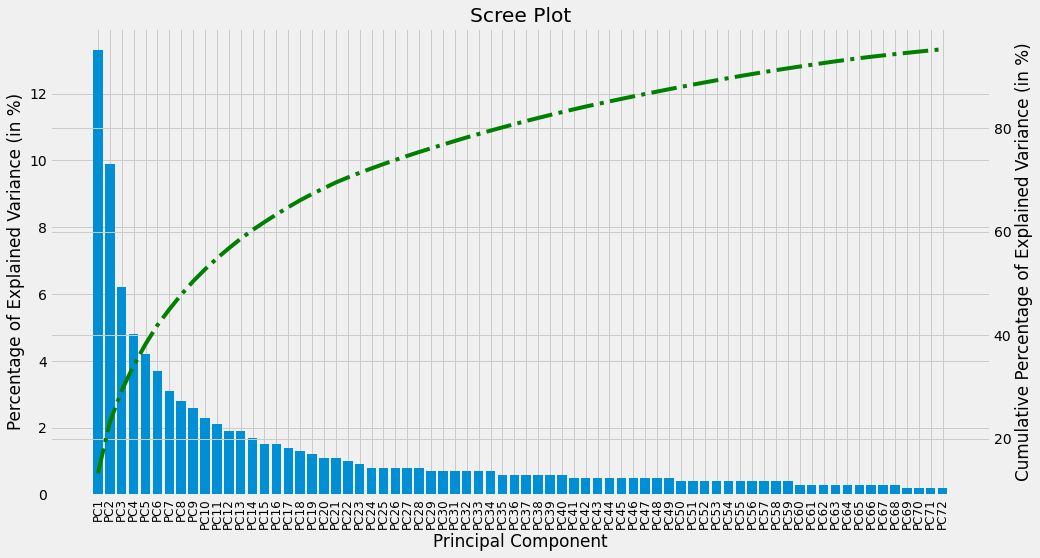

In [89]:
## Plot the Percentage of Explained Variance and Cumulative Percentage of Explained variance using scree plots

fig,ax = plt.subplots(figsize=(15,8))
ax.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance (in %)')
plt.xlabel('Principal Component')
plt.xticks(rotation=90, fontsize=12)
plt.title('Scree Plot')

ax2=ax.twinx()
ax2.set_ylabel("Cumulative Percentage of Explained Variance (in %)")
var_cumu = np.cumsum(pca95.explained_variance_ratio_*100)
ax2.plot(range(1,len(var_cumu)+1), var_cumu, 'g-.' )

plt.show()

In [90]:
## Summary table of variance explained
pca_summary = pd.DataFrame({'Principal Components':labels,
                        'Variable Explained (in %)':per_var,
                        'Cumulative Variance Explained (in %)':np.round((var_cumu),1)})
pca_summary

Principal Components  Variable Explained (in %)  \
0                   PC1                       13.3   
1                   PC2                        9.9   
2                   PC3                        6.2   
3                   PC4                        4.8   
4                   PC5                        4.2   
5                   PC6                        3.7   
6                   PC7                        3.1   
7                   PC8                        2.8   
8                   PC9                        2.6   
9                  PC10                        2.3   
10                 PC11                        2.1   
11                 PC12                        1.9   
12                 PC13                        1.9   
13                 PC14                        1.7   
14                 PC15                        1.5   
15                 PC16                        1.5   
16                 PC17                        1.4   
17                 PC18                        1.3   
18                 PC19                        1.2   
19                 PC20                        1.1   
20                 PC21                        1.1   
21                 PC22                        1.0   
22                 PC23                        0.9   
23                 PC24                        0.8   
24                 PC25                        0.8   
25                 PC26                        0.8   
26                 PC27                        0.8   
27                 PC28                        0.8   
28                 PC29                        0.7   
29                 PC30                        0.7   
30                 PC31                        0.7   
31                 PC32                        0.7   
32                 PC33                        0.7   
33                 PC34                        0.7   
34                 PC35                        0.6   
35                 PC36                        0.6   
36                 PC37                        0.6   
37                 PC38                        0.6   
38                 PC39                        0.6   
39                 PC40                        0.6   
40                 PC41                        0.5   
41                 PC42                        0.5   
42                 PC43                        0.5   
43                 PC44                        0.5   
44                 PC45                        0.5   
45                 PC46                        0.5   
46                 PC47                        0.5   
47                 PC48                        0.5   
48                 PC49                        0.5   
49                 PC50                        0.4   
50                 PC51                        0.4   
51                 PC52                        0.4   
52                 PC53                        0.4   
53                 PC54                        0.4   
54                 PC55                        0.4   
55                 PC56                        0.4   
56                 PC57                        0.4   
57                 PC58                        0.4   
58                 PC59                        0.4   
59                 PC60                        0.3   
60                 PC61                        0.3   
61                 PC62                        0.3   
62                 PC63                        0.3   
63                 PC64                        0.3   
64                 PC65                        0.3   
65                 PC66                        0.3   
66                 PC67                        0.3   
67                 PC68                        0.3   
68                 PC69                        0.2   
69                 PC70                        0.2   
70                 PC71                        0.2   
71                 PC72                        0.2   

    Cumulative Variance Explained (in %)  
0                

### 📌 From the above plots and summary table, we observe that about 95% of the variance is explained by the first 72 components.

In [91]:
## Converting X_train_pca to a dataframe with suitable column names
X_train_pca = pd.DataFrame(X_train_pca, columns=[f"PC{i}" for i in range(1,73)])
X_train_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.203730  8.529664  0.723542  0.474074 -0.863251 -4.574047  3.067876   
1 -1.701611  8.115136  0.887076 -0.220264 -1.346822  1.362249 -3.095733   
2 -4.034802  6.098722  2.159835 -2.869682 -0.571160  5.614122  2.791863   
3  0.997765 -3.064896 -1.072088 -3.998433 -0.434944  0.574608 -0.031812   
4  1.764432 -3.995371  1.502417 -2.026659 -3.058943 -1.347450 -2.256739   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -2.466898 -1.144040  1.956294 -0.259349  1.147201  1.503608 -1.935302   
1 -2.128297 -1.673382 -0.599574  0.709707 -0.016294  3.316194 -1.209170   
2 -1.388400 -1.434787  0.056210  0.514704 -0.876018 -2.480705  2.488696   
3 -1.229742 -0.826256  2.377948 -1.452853  0.228496 -1.391454 -1.788007   
4 -4.329428  5.727539  0.407499 -1.197164 -0.355444  1.444108  0.327782   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  0.423351  0.451645 -0.284650 -0.307938 -1.516744  0.707888  1.726832   
1 -1.098776 -2.815781  2.430240 -0.937800 -1.126235 -0.827309  1.232431   
2 -0.588889 -0.626975 -1.133224 -0.096354 -0.064661  1.018641  0.367040   
3  0.569892  0.966550 -1.354858 -0.734432 -0.658140 -0.173749 -0.073270   
4 -1.671752  1.471547 -1.453045 -0.121513 -0.398321 -1.054682  0.020531   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  1.074174 -0.570892  0.744007  0.848483 -1.216849 -1.546391 -0.502286   
1  1.657409  0.949645 -0.425831  1.608463 -1.346372 -0.687564 -1.426102   
2 -0.368669 -0.133516 -0.842525 -0.113226  0.187496  0.594464  0.272590   
3 -0.291235 -0.042575  0.692760 -0.896233  0.030571  0.470755 -0.113891   
4  1.046679  0.158341  0.833678 -0.088107 -1.095176  1.241739 -1.786565   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0  1.790496  1.059633 -1.547808 -1.776244  0.275394  0.496516 -0.511485   
1  1.826550  1.033405 -0.638663 -1.651695  0.340671  0.333653 -1.961544   
2 -0.281404 -0.133285 -0.188619  0.784341  0.699515  0.048780 -0.093625   
3  0.881751  0.401198  0.831326 -0.266057 -1.744702  2.292806  0.171167   
4 -2.832181 -0.986753 -0.899101  2.625525  0.963505 -0.285239  0.144327   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -0.236089  0.454331  0.957519 -1.201707  0.164751  0.825681 -1.023147   
1  0.174314  1.155365  0.373714 -0.399858 -0.071405 -1.016093  0.727447   
2  1.018003 -1.364106 -0.051925 -0.515525 -0.618681 -0.300890 -0.574721   
3 -1.133306  0.374749  0.039813 -0.115321  0.334355 -1.121862 -0.591569   
4  0.293529  3.323490  0.036392 -1.713267  1.318845 -0.403816  0.994056   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -0.032834  0.493543 -0.240490 -0.465296 -0.245859 -0.428734 -0.946190   
1  0.174106 -0.037028 -0.022964 -0.573845 -0.652050 -1.328446 -0.090447   
2  0.639323  0.018855 -0.111363  0.372784 -0.259861  0.111033  0.484423   
3 -0.059628  0.480473  0.839097  1.289597 -0.297889 -0.653684  0.083594   
4 -2.473567  0.376634 -0.092068  0.355049 -1.132471  0.327816 -1.807129   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0  0.371039  0.927592 -0.287527  0.055775 -2.123799 -0.690512 -0.468870   
1  0.807072 -0.019179 -2.087593 -0.690644  0.462059  0.526737 -0.594807   
2 -0.263928 -0.058778 -1.074458  0.215646  0.558148 -0.502585 -0.228435   
3 -0.121566  0.257103 -0.237073 -0.138035 -0.360285 -0.132214 -2.077113   
4 -0.301420  1.358572 -0.554145  0.467105  0.533167 -1.568830 -0.730060   

       PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
0  0.565539  0.410886 -0.516773 -0.193037 -0.710524 -1.533749 -0.082048   
1  0.415462  0.233199 -0.421287  0.537283 -0.457193  0.757111  1.258890   
2  0.362579 -0.024241  0.110511 -0.366131 -0.195923 -0.059221 -0.242687   
3  0.255643  0.130962 -0.567402  1.570053  1.479735 -1.276015 -0.358405   
4  0.792900  0.174599 -1.

In [92]:
## Rebuilding our dataset by concatenating target column (it will be useful in some visualizations below)
telecom_pca = pd.concat([X_train_pca, y], axis=1)
telecom_pca.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.203730  8.529664  0.723542  0.474074 -0.863251 -4.574047  3.067876   
1 -1.701611  8.115136  0.887076 -0.220264 -1.346822  1.362249 -3.095733   
2 -4.034802  6.098722  2.159835 -2.869682 -0.571160  5.614122  2.791863   
3  0.997765 -3.064896 -1.072088 -3.998433 -0.434944  0.574608 -0.031812   
4  1.764432 -3.995371  1.502417 -2.026659 -3.058943 -1.347450 -2.256739   
5 -5.227721  3.389539 -2.972938  0.909472  0.986113  2.440887  4.344990   
6 -1.079623 -2.820071  7.547999 -0.153503  2.689033  2.204649  1.653599   
7 -3.832141  1.738765 -1.355196  0.005922 -0.933096 -3.440211  1.789211   
8 -2.607979 -2.736592 -2.101649  0.194327 -1.175311  0.922310 -1.002108   
9  2.326055 -3.912965  2.293954 -2.887873  1.360017  0.339654 -1.992757   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -2.466898 -1.144040  1.956294 -0.259349  1.147201  1.503608 -1.935302   
1 -2.128297 -1.673382 -0.599574  0.709707 -0.016294  3.316194 -1.209170   
2 -1.388400 -1.434787  0.056210  0.514704 -0.876018 -2.480705  2.488696   
3 -1.229742 -0.826256  2.377948 -1.452853  0.228496 -1.391454 -1.788007   
4 -4.329428  5.727539  0.407499 -1.197164 -0.355444  1.444108  0.327782   
5 -3.257893  0.118690  1.137300 -1.148019 -0.799971  2.730220 -0.098404   
6  5.485114  0.024865 -0.622612 -1.449816 -0.579389 -1.494820 -0.739716   
7 -0.725226 -1.444896 -0.004757  0.720914 -0.907246 -0.028458 -1.497139   
8  0.504834 -0.339610 -1.030733 -0.251720  1.064894  0.176547 -0.359007   
9 -1.728611 -0.666470 -1.208523 -0.385794 -1.498601 -0.417446 -0.678821   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  0.423351  0.451645 -0.284650 -0.307938 -1.516744  0.707888  1.726832   
1 -1.098776 -2.815781  2.430240 -0.937800 -1.126235 -0.827309  1.232431   
2 -0.588889 -0.626975 -1.133224 -0.096354 -0.064661  1.018641  0.367040   
3  0.569892  0.966550 -1.354858 -0.734432 -0.658140 -0.173749 -0.073270   
4 -1.671752  1.471547 -1.453045 -0.121513 -0.398321 -1.054682  0.020531   
5  1.100441  0.077636  2.595831 -1.307989 -0.493583  0.173634  0.184448   
6 -2.626312 -0.840938  0.463809 -0.971867 -0.554275 -1.205762 -4.770059   
7  0.215815  1.359209  0.901515  0.218044  0.650841 -0.366476 -0.564090   
8  0.222858  0.627321 -0.361867 -0.529377 -0.710997 -0.282172  0.635521   
9 -0.018915 -0.717351 -1.008429  0.071408 -0.848126 -1.093298 -1.550344   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  1.074174 -0.570892  0.744007  0.848483 -1.216849 -1.546391 -0.502286   
1  1.657409  0.949645 -0.425831  1.608463 -1.346372 -0.687564 -1.426102   
2 -0.368669 -0.133516 -0.842525 -0.113226  0.187496  0.594464  0.272590   
3 -0.291235 -0.042575  0.692760 -0.896233  0.030571  0.470755 -0.113891   
4  1.046679  0.158341  0.833678 -0.088107 -1.095176  1.241739 -1.786565   
5  0.752311  0.141881  1.452140  0.176045 -0.271278 -1.060185  0.223940   
6  2.256104 -0.498468 -2.618790  1.054610 -0.107418  0.378360 -0.577599   
7  0.163195 -0.645376 -0.601320 -0.132076  0.226814  0.573785 -0.220384   
8  0.243893 -0.222744 -0.238320 -0.549253  0.180467 -0.487899 -0.350381   
9 -2.188972  0.096925  2.125954  0.444992  0.693200 -2.585520 -0.146041   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0  1.790496  1.059633 -1.547808 -1.776244  0.275394  0.496516 -0.511485   
1  1.826550  1.033405 -0.638663 -1.651695  0.340671  0.333653 -1.961544   
2 -0.281404 -0.133285 -0.188619  0.784341  0.699515  0.048780 -0.093625   
3  0.881751  0.401198  0.831326 -0.266057 -1.744702  2.292806  0.171167   
4 -2.832181 -0.986753 -0.899101  2.625525  0.963505 -0.285239  0.144327   
5 -2.499793 -0.000860 -1.813306 -0.281884 -0.318842  0.022256  1.160098   
6 -0.819984 -0.693445 -0.026129 -1.050636  0.002683 -0.547499  0.773013   
7 -0.766957 -0.196965 -0.351725  1.082146  0.485933  0.348426  0.443144   
8  0.815859  0.233600  0.1854

# 📊 Plotting the data in terms of first two Principal Components

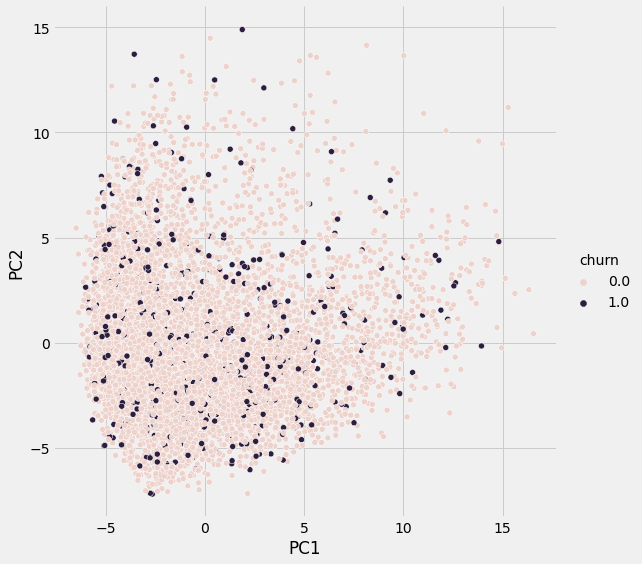

In [93]:
## View the data points in a scatterplot of PC1 v/s PC2
sns.pairplot(data=telecom_pca, x_vars=["PC1"], y_vars=["PC2"], hue = "churn", size=8);

### 📌 We can see here that PC1 and PC2 capture much variance of data

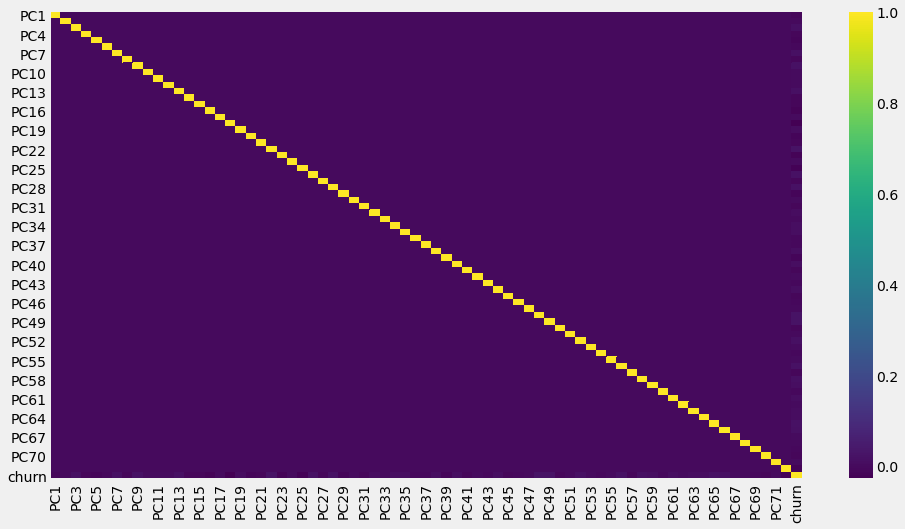

In [94]:
## Check the multicollinearity
plt.figure(figsize=(15,8))
sns.heatmap(telecom_pca.corr(), cmap='viridis');

### 📌 So, the selected principal components have zero correlations among them and with target variable `churn`. We see that PCA handles multicollinearity very efficiently.

## Now, we will build three different models here using the 72 Principal Components
### 1. Logistic Regression
### 2. Random Forest
### 3. XGBoost Classifier

In [95]:
## Create helper function to evaluate the model on test data
def evaluate_model(dt_classifier):
    ''' This functions takes input as a classifier, prints the Recall score and plots the Confusion Matrix
        This function also returns the Recall Score of classifier on test data, rounded by two decimal points'''
    recall = round(recall_score(y_test, dt_classifier.predict(X_test_pca)), 2)
    print("Recall :", recall_score(y_test, dt_classifier.predict(X_test_pca)))
    print("Test Confusion Matrix:")
    fig, ax = plt.subplots(figsize=(15,8))
    print(plot_confusion_matrix(dt_classifier, X_test_pca, y_test, display_labels=['Not_Churn', 'Churn'], ax=ax))
    plt.show()
    return recall

# <font color=steelblue>(1) Logistic Regression  0️⃣📈1️⃣</font>
## <font color=steelblue> (Model Building, Hyperparameter Tuning and Model Evaluation)</font>

In [96]:
## Build a baseline logistic regression model with only features selected by PCA
###################################################################################
## To HANDLE CLASS IMBALANCE in data, we set 'class_weight' parameter to 'balanced'
###################################################################################
logreg_pca_baseline = LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced')

In [97]:
## Train the baseline Logistic Regression model with 72 features selected by PCA
logreg_pca_baseline.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42)

Recall : 0.8457583547557841
Test Confusion Matrix:


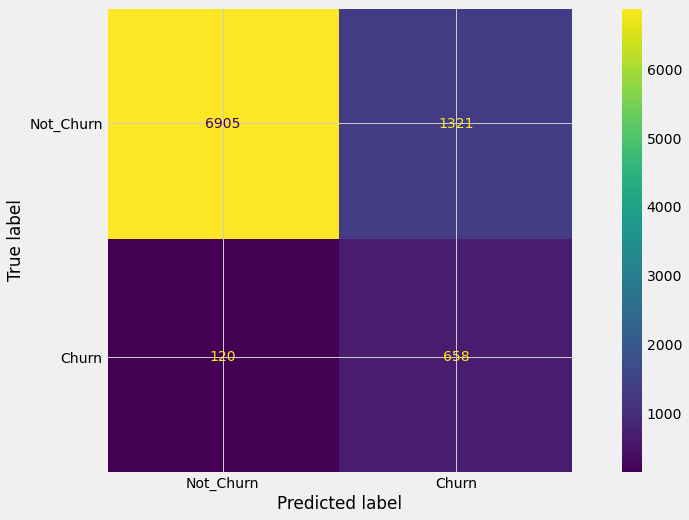

In [98]:
## Evaluate the baseline logistic regression model on test data
recall_pca_baseline = evaluate_model(logreg_pca_baseline)

In [99]:
## View the recall score
recall_pca_baseline

0.85

### 📌 The Recall score we are getting in this baseline model is fairly high. 

### 📌 Now, let's try to see if we can improve the recall score using hyperparameter tuning

In [100]:
## Define a parameter dictionary
params = {
    'penalty': ['l1', 'l2','elasticnet', 'none'],
    'C': [0.001,0.01,0.1,1,10,100],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [101]:
## Search from 5 folds for the best parameters from dictionary above
grid_search = GridSearchCV(estimator=logreg_pca_baseline,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="recall")

In [102]:
## Fit the gridsearch on training data (PCA)
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 574 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 593 out of 600 | elapsed:  1.5min remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.5min finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1,
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall', verbose=1)

In [103]:
## View the best recall score 
grid_search.best_score_

0.8765840220385674

In [104]:
## View the best hyperparameter values
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

### 📌 So, we can improve our `Recall` score from 0.85 to 0.88 by using the above values of hyperparamters. 
### 📌 Now we build a logistic regresion model using these values of hyperparameters.

In [105]:
## Instantiate a Logistic Regression Model using tuned hyperparameters
logreg_pca_tuned = LogisticRegression(C=0.001,
                                      penalty='l2',
                                      class_weight='balanced',
                                      random_state=42, 
                                      solver='liblinear',
                                      n_jobs=-1,
                                      verbose=1)

In [106]:
## Train the Logistic Regression model with features selected by PCA
logreg_pca_tuned.fit(X_train_pca, y_train)

[LibLinear]

LogisticRegression(C=0.001, class_weight='balanced', n_jobs=-1, random_state=42,
                   solver='liblinear', verbose=1)

Recall : 0.8663239074550129
Test Confusion Matrix:


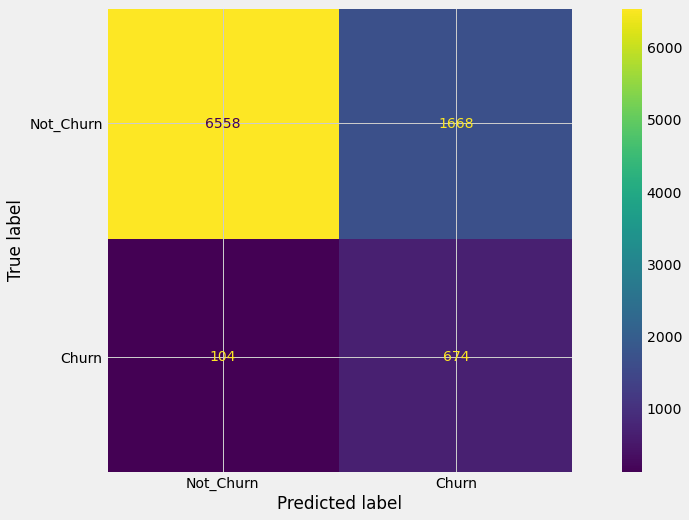

In [107]:
## Evaluate the tuned model on test data
recall_pca_tuned = evaluate_model(logreg_pca_tuned)

In [108]:
## View the recall score
recall_pca_tuned

0.87

### 📌 The Recall score of our logistic regression model has slightly improved from `0.85` to `0.87` by using the tuned hyperparameters

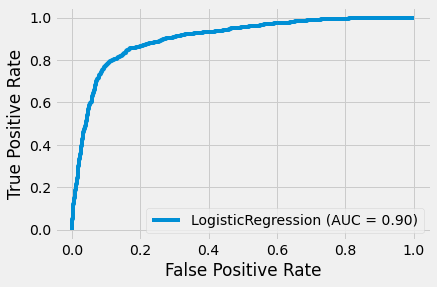

In [109]:
## Plot the ROC curve for our model
plot_roc_curve(logreg_pca_tuned, X_test_pca, y_test, drop_intermediate=True);

In [110]:
## Adding this model to our summary table
summary.loc[len(summary.index)] = ['Logistic Regression (with PCA)', recall_pca_baseline, recall_pca_tuned]
summary

Model  Recall Score (Baseline)  \
0  Logistic Regression (with RFE)                     0.87   
1  Logistic Regression (with PCA)                     0.85   

   Recall Score (Tuned)  
0                  0.91  
1                  0.87

# <font color=steelblue>(2) Random Forest 🌳🌲</font>
## <font color=steelblue> (Model Building, Hyperparameter Tuning and Model Evaluation)</font>

In [111]:
## Build a baseline Random Forest with only features selected by PCA
##################################################################################
## To HANDLE CLASS IMBALANCE in data, we set 'class_weight' parameter to 'balanced'
##################################################################################
rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

In [112]:
## Train the Random Forest model with 72 selected features
rf_baseline.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

Recall : 0.18894601542416453
Test Confusion Matrix:


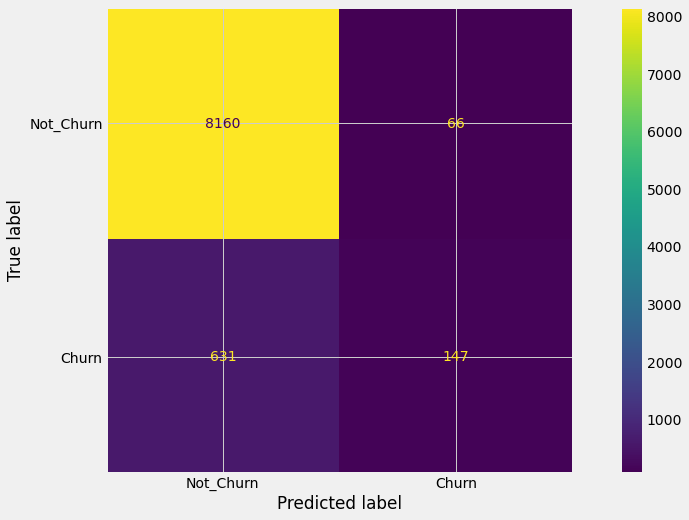

In [113]:
## Evaluate the baseline Random Forest model on test data
recall_rf_baseline = evaluate_model(rf_baseline)

In [114]:
## View the recall score
recall_rf_baseline

0.19

### 📌 The Recall score we are getting in baseline Random Forest model is very low. 

### 📌 Now, let's try to see if we can improve the recall score using hyperparameter tuning

In [115]:
# Create the parameter grid based on the results of random search 

params =  {'max_depth': [1, 2, 5, 10, 20],
            'min_samples_leaf': [50, 100, 200, 300],
            'max_features': [4,5, 6, 7],
            'n_estimators': [500, 600, 700, 800],
            'criterion':['gini','entropy']
          }

In [116]:
## Instantiate the grid search model
## Here, we have used RandomizedSearchCV to speed up the search process without affecting the performance too much
grid_search = RandomizedSearchCV(estimator=rf_baseline, 
                                 param_distributions=params, 
                                 cv=5, 
                                 n_jobs=-1, 
                                 verbose=1, 
                                 scoring = "recall")

In [117]:
## Fit the randomized search on training data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.9min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 20],
                                        'max_features': [4, 5, 6, 7],
                                        'min_samples_leaf': [50, 100, 200, 300],
                                        'n_estimators': [500, 600, 700, 800]},
                   scoring='recall', verbose=1)

In [118]:
## View the best recall score 
grid_search.best_score_

0.7741046831955922

In [119]:
## View the best hyperparameter values
grid_search.best_params_

{'n_estimators': 800,
 'min_samples_leaf': 200,
 'max_features': 6,
 'max_depth': 5,
 'criterion': 'gini'}

### 📌 So, we can improve our `Recall` score from 0.19 to 0.77 by using the above values of hyperparamters. 
### 📌 Now we build a Random Forest model using these values of hyperparameters.

In [120]:
## Instantiate a Random Forest Model using tuned hyperparameters
rf_tuned = RandomForestClassifier(n_estimators=800,
                                  min_samples_leaf=200,
                                  max_features=6,
                                  max_depth=5,
                                  criterion='gini',
                                  class_weight='balanced',
                                  random_state=42, 
                                  n_jobs=-1,
                                  verbose=1)

In [121]:
## Train the tuned Random Forest model with features by PCA
rf_tuned.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   17.4s finished


RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=6,
                       min_samples_leaf=200, n_estimators=800, n_jobs=-1,
                       random_state=42, verbose=1)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    0.3s finished


Recall : 0.781491002570694
Test Confusion Matrix:


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    0.4s finished


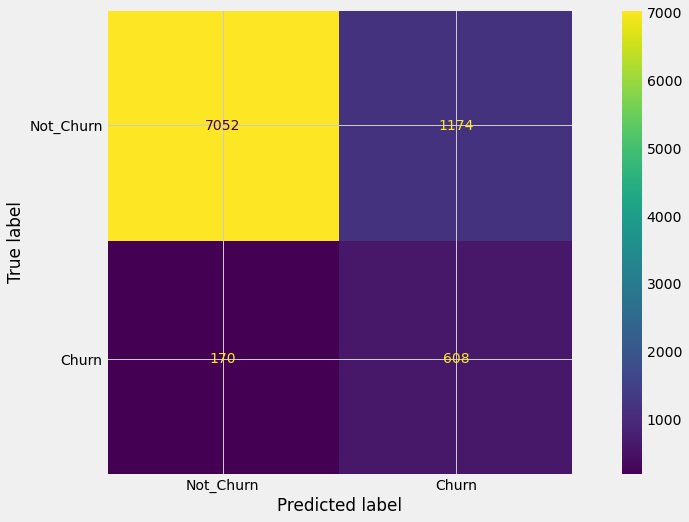

In [122]:
## Evaluate the tuned model on test data
recall_rf_tuned = evaluate_model(rf_tuned)

In [123]:
## View the recall score
recall_rf_tuned

0.78

### 📌 The Recall score of our Random Forest model has improved from `0.19` to `0.78` by using the tuned hyperparameters

In [124]:
## Adding this model to our summary table
summary.loc[len(summary.index)] = ['Random Forest (with PCA)', recall_rf_baseline, recall_rf_tuned]
summary

Model  Recall Score (Baseline)  \
0  Logistic Regression (with RFE)                     0.87   
1  Logistic Regression (with PCA)                     0.85   
2        Random Forest (with PCA)                     0.19   

   Recall Score (Tuned)  
0                  0.91  
1                  0.87  
2                  0.78

# <font color=steelblue>(3) XG Boost 🚗💨</font>
## <font color=steelblue> (Model Building, Hyperparameter Tuning and Model Evaluation)</font>

### 📌 As XGBoost algorithm is robust to multicollinearity, we will take our orginal `X_train` and `y_train` to train the model (instead of X_train_pca and y_train_pca)

In [125]:
## Build a baseline XGBoost Classifier
xgb_baseline = xgb.XGBClassifier()

## Train the XGBoost model on the training data
xgb_baseline.fit(X_train, y_train)

[09:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
## Make predictions of baseline XGBoost model on test data
y_pred = xgb_baseline.predict(X_test)

## Round preicted values
predictions = [round(value) for value in y_pred]
predictions[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

[[8084  142]
 [ 347  431]]


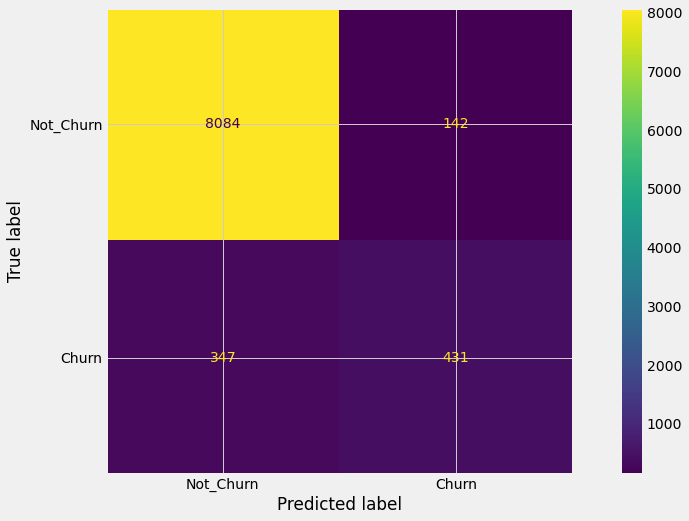

In [127]:
## Evaluate the baseline XGBoost model on test data
## View the confusion matrix
print(confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(xgb_baseline, X_test, y_test, display_labels=['Not_Churn', 'Churn'], ax=ax);

In [128]:
## View the recall score 
recall_xgb_baseline = round(recall_score(y_test, predictions), 2)
recall_xgb_baseline

0.55

### 📌 The Recall score we are getting in baseline Random Forest model is low. 

### 📌 Now, let's try to see if we can improve the recall score using hyperparameter tuning

In [129]:
### First we select a suitable value of 'scale_pos_weight' parameter in order to HANDLE CLASS IMBALANCE
y_train.value_counts()

0    19192
1     1815
Name: churn, dtype: int64

In [130]:
## `scale_pos_weight` is the ratio of number of negative class to the positive class
scale_pos_weight = y_train.value_counts().loc[0]/y_train.value_counts().loc[1]
scale_pos_weight

10.574104683195593

In [131]:
# Create the parameter grid based on the results of random search 
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [3, 7, 11, 19, 25],
              'scale_pos_weight': [10.57],
              'n_estimators': [50, 100, 150, 200, 300, 500]}

In [132]:
## Instantiate the grid search model
## Here, we have used RandomizedSearchCV to speed up the search process without affecting the performance too much
grid_search = RandomizedSearchCV(estimator=xgb_baseline,
                                 param_distributions=parameters,
                                 n_jobs=-1,
                                 cv=5,
                                 scoring='recall',
                                 verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 15.9min finished


[09:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...ndom_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_

In [133]:
## View the recall score
print(grid_search.best_score_)

0.8385674931129478


### 📌 The Recall score of our XGBoost model has slightly improved from 0.55 to 0.84 by using the tuned hyperparameters. Now, we build a XGBoost model using these best hyperparameters

In [134]:
## View the best estimator hyperparameters
grid_search.best_params_

{'scale_pos_weight': 10.57,
 'n_estimators': 100,
 'min_child_weight': 19,
 'max_depth': 2,
 'learning_rate': 0.3}

In [135]:
## Instantiate a XGBoost Model using tuned hyperparameters
xgb_tuned = xgb.XGBClassifier(scale_pos_weight=10.57,
                              n_estimators=100,
                              min_child_weight=19,
                              max_depth=2,
                              learning_rate=0.3,
                              random_state=42, 
                              n_jobs=-1,
                              verbose=1)

In [136]:
## Train the XCBoost classifier model with training data
xgb_tuned.fit(X_train, y_train)

[09:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=19, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10.57, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

In [137]:
## Make predictions of tuned XGBoost model on test data
y_pred = xgb_tuned.predict(X_test)

## Round preicted values
predictions = [round(value) for value in y_pred]
predictions[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

[[7416  810]
 [ 114  664]]


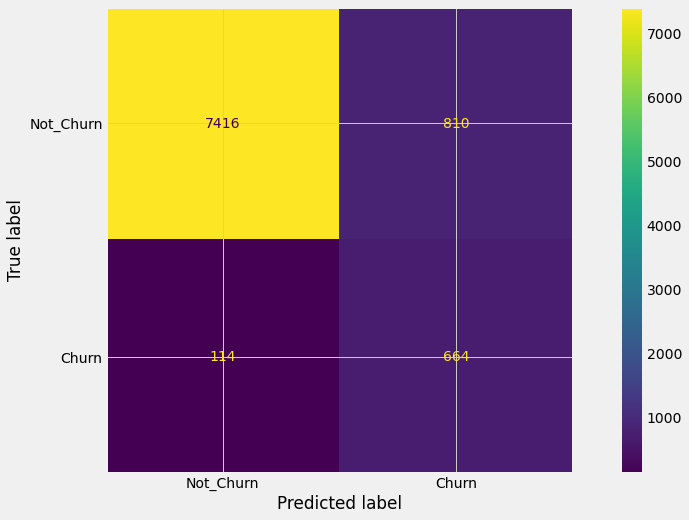

In [138]:
## Evaluate the tuned XGBoost model on test data
## View the confusion matrix
print(confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(xgb_tuned, X_test, y_test, display_labels=['Not_Churn', 'Churn'], ax=ax);

In [139]:
## View the recall score 
recall_xgb_tuned= round(recall_score(y_test, predictions), 2)
recall_xgb_tuned

0.85

### 📌 The Recall score of our Random Forest model has improved from `0.55` to `0.85` by using the tuned hyperparameters

In [140]:
## Adding this model to our summary table
summary.loc[len(summary.index)] = ['XGBoost', recall_xgb_baseline, recall_xgb_tuned]
summary

Model  Recall Score (Baseline)  \
0  Logistic Regression (with RFE)                     0.87   
1  Logistic Regression (with PCA)                     0.85   
2        Random Forest (with PCA)                     0.19   
3                         XGBoost                     0.55   

   Recall Score (Tuned)  
0                  0.91  
1                  0.87  
2                  0.78  
3                  0.85

# <font color=limegreen> 📝 Summarizing all the models created and selecting the best one</font>

In [141]:
## Summary table
summary.set_index('Model', inplace=True)
summary

Recall Score (Baseline)  Recall Score (Tuned)
Model                                                                        
Logistic Regression (with RFE)                     0.87                  0.91
Logistic Regression (with PCA)                     0.85                  0.87
Random Forest (with PCA)                           0.19                  0.78
XGBoost                                            0.55                  0.85

### 📌 Above table shows that if we use a simple Logistic Regression model with features selected by RFE technique, we get a decent recall score of 0.91.


### 📌 The other three models: Logistic Regression (with PCA), Random Forest (with PCA) and XGBoost also give good recall scores, but they take up a lot of processing power. Also, there is a scope of doing more intense hyperparameter tuning which may improve the recall score.


### 📌 If the telecom company wants to improve `churn` prediction and can afford high processing power, then we should go ahead with any of the latter three models and do some more hyperparameter tuning to improve the recall score even further.


## ✔️ However, if the telecom company wants to pinpoint the features to focus on in order to prevent `churn`, then the first model: <font color='brown'>Logistic Regression (with RFE)</font> is the one that should be implemented.